# Plots

This notebook is for producing plots for the paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "dejavuserif",
    "font.size": 10,
    "axes.labelsize": 8,
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "font.sans-serif": "Computer Modern Roman",
    "figure.dpi": 300,
    "savefig.bbox": "tight"})

# Load data
old_df = pd.read_csv("../BEst_lite/data/full_smica_constraints_adapted.txt", delimiter="\t")

new_df = pd.read_csv("../data_dir/full_trio_constraints_p_30_Nk_200.csv")

'''
# p_max = 29 results
df_29 = pd.read_csv("BEst_lite/data/BEst_constraints_adapted_p29.txt", delimiter="\t") 

# k_max / k_min = 2000 (instead of 1000), p_max = 10 results
df_2000 = pd.read_csv("BEst_lite/data/BEst_constraints_p10_k_ratio_2000.txt", delimiter="\t")

# Tetrapyd decomposition coefficients
df_tetra = pd.read_csv("BEst_lite/data/BEst_constraints_tetrapyd_decomp_full.txt", delimiter="\t") 

# Usual cube decomposition, but region outside tetrapyd is set to zero.
# Only works well for equilateral type shapes!
df_test_tetra = pd.read_csv("BEst_lite/data/BEst_constraints_adapted_test_tetrapyd.txt", delimiter="\t") 

# Monomials, with lmax = 2000
df_mono_2000 = pd.read_csv("BEst_lite/data/monomial_constraints_lmax_2000.txt", delimiter="\t")
'''

'\n# p_max = 29 results\ndf_29 = pd.read_csv("BEst_lite/data/BEst_constraints_adapted_p29.txt", delimiter="\t") \n\n# k_max / k_min = 2000 (instead of 1000), p_max = 10 results\ndf_2000 = pd.read_csv("BEst_lite/data/BEst_constraints_p10_k_ratio_2000.txt", delimiter="\t")\n\n# Tetrapyd decomposition coefficients\ndf_tetra = pd.read_csv("BEst_lite/data/BEst_constraints_tetrapyd_decomp_full.txt", delimiter="\t") \n\n# Usual cube decomposition, but region outside tetrapyd is set to zero.\n# Only works well for equilateral type shapes!\ndf_test_tetra = pd.read_csv("BEst_lite/data/BEst_constraints_adapted_test_tetrapyd.txt", delimiter="\t") \n\n# Monomials, with lmax = 2000\ndf_mono_2000 = pd.read_csv("BEst_lite/data/monomial_constraints_lmax_2000.txt", delimiter="\t")\n'

In [2]:
import cmbbest as best

# Data settings
p_max = 30
Nk = 200

# Prepare basis
basis_T = best.Basis("Legendre2015", mode_p_max=p_max, polarisation_on=False)
basis_TP = best.Basis("Legendre2015", mode_p_max=p_max, polarisation_on=True)
n_s, A_s, k_pivot = basis_TP.parameter_n_scalar, basis_TP.parameter_A_scalar, basis_TP.parameter_k_pivot
prefactor = 6 * (A_s ** 2) * pow(k_pivot, 2 * (1 - n_s))

# Prepare models
models = []

# Standard shapes
shapes = ["local", "equilateral", "orthogonal"]
shape_names = ["Local", "Equil", "Ortho"]
shape_labels = [r"f_\mathrm{NL}^\mathrm{local}", r"f_\mathrm{NL}^\mathrm{equil}", r"f_\mathrm{NL}^\mathrm{ortho}"]
models = models + [best.Model(shape, parameter_n_scalar=n_s, parameter_A_scalar=A_s) for shape in shapes]

# Basis expansion
coeff, shape_cov, conv_corr, conv_MSE = basis_TP.modal_decomposition(models, check_convergence=True)
shape_corr = shape_cov / (np.sqrt(np.diag(shape_cov))[:,np.newaxis] * np.sqrt(np.diag(shape_cov))[np.newaxis,:])

# Get constraints
df_T, fisher_T = basis_T.constrain_models(models, coeff, conv_corr, conv_MSE, full_result=True, return_fisher=True)
df_TP, fisher_TP = basis_TP.constrain_models(models, coeff, conv_corr, conv_MSE, full_result=True, return_fisher=True)

Using mode orthogonalisation coefficients
Using mode normalisation
Gamma and beta data loaded
1D mode functions evaluated
Legendre2015 Basis is now ready
Using mode orthogonalisation coefficients
Using mode normalisation
Gamma and beta data loaded
1D mode functions evaluated
Legendre2015 Basis is now ready
S has shape (3, 681750)
QS Function start!
QS start!
4960 30 200 681750 3
done!
Shape #1/3 decomposed using CG with exit code 10000
Shape #2/3 decomposed using CG with exit code 10000
Shape #3/3 decomposed using CG with exit code 10000
Decomposition complete.


In [3]:
# New, Wuhyun's constraints using Planck 2018 TTTEEE+lensing best fits 
basis_new_T = best.Basis("Legendre", mode_p_max=10, polarisation_on=False)
basis_new_TP = best.Basis("Legendre", mode_p_max=10, polarisation_on=True)

#basis_KSW_T = best.Basis("Monomial", mode_p_max=4, polarisation_on=False, use_tetraquad=True, use_precomputed_QQ=False)
#basis_KSW_TP = best.Basis("Monomial", mode_p_max=4, polarisation_on=True, use_tetraquad=True, use_precomputed_QQ=False)
basis_KSW_T = best.Basis("Monomial", mode_p_max=4, polarisation_on=False, use_precomputed_QQ=False)
basis_KSW_TP = best.Basis("Monomial", mode_p_max=4, polarisation_on=True, use_precomputed_QQ=False)

new_n_s, new_A_s, k_pivot = basis_TP.parameter_n_scalar, basis_new_TP.parameter_A_scalar, basis_new_TP.parameter_k_pivot

# Prepare models
new_models = [best.Model(shape, parameter_n_scalar=new_n_s, parameter_A_scalar=new_A_s) for shape in shapes]

# Standard shapes
shapes = ["local", "equilateral", "orthogonal"]

df_new_T, fisher_new_T = basis_new_T.constrain_models(new_models, full_result=True, return_fisher=True)
df_new_TP, fisher_new_TP = basis_new_TP.constrain_models(new_models, full_result=True, return_fisher=True)
df_KSW_T, fisher_KSW_T = basis_KSW_T.constrain_models(new_models, full_result=True, return_fisher=True)
df_KSW_TP, fisher_KSW_TP = basis_KSW_TP.constrain_models(new_models, full_result=True, return_fisher=True)

Gamma and beta data loaded
1D mode functions evaluated
Legendre Basis is now ready
Gamma and beta data loaded
1D mode functions evaluated
Legendre Basis is now ready
Gamma and beta data loaded
Number of threads: 8
Tetrapyd weights computed
1D mode functions evaluated
start!
20 4 50 11375
Monomial Basis is now ready
Gamma and beta data loaded
Number of threads: 8
Tetrapyd weights computed
1D mode functions evaluated
start!
20 4 50 11375
Monomial Basis is now ready
S has shape (3, 681750)
QS Function start!
QS start!
220 10 200 681750 3
done!
Shape #1/3 decomposed using CG with exit code 2200
Shape #2/3 decomposed using CG with exit code 2200
Shape #3/3 decomposed using CG with exit code 2200
Decomposition complete.
S has shape (3, 681750)
QS Function start!
QS start!
220 10 200 681750 3
done!
Shape #1/3 decomposed using CG with exit code 2200
Shape #2/3 decomposed using CG with exit code 2200
Shape #3/3 decomposed using CG with exit code 2200
Decomposition complete.
S has shape (3, 1137

In [4]:
df_KSW_TP[df_KSW_TP["map_number"] == 0]

index   shape_name  convergence_correlation  convergence_epsilon  \
0        0        local                      1.0             0.000086   
161      1  equilateral                      1.0             0.000027   
322      2   orthogonal                      1.0             0.000059   

     convergence_MSE  map_number  single_f_NL  single_fisher_sigma  \
0       7.463762e-09           0    -1.133860             4.687815   
161     7.326211e-10           0   -22.375752            45.352058   
322     3.489543e-09           0   -31.064314            21.648703   

     single_sample_sigma  single_LISW_bias  marginal_f_NL  \
0               5.069813          5.454685      -5.405772   
161            49.310378          0.418340     -15.761113   
322            23.650881        -10.003111     -44.083126   

     marginal_fisher_sigma  marginal_sample_sigma  marginal_LISW_bias  
0                 5.610558               5.931928            6.326222  
161              47.332559              50.670282          -16.024466  
322              24.968304              27.003110            3.802209

In [5]:
# Combine everything into one dataframe
all_df = old_df.copy()

#print(old_df.template.unique())
#print(new_df.shape_name.unique())

N_SIMS = 161

for template in ["Local", "Equilateral", "Orthogonal"]:
    df_KSW_T_slice = df_KSW_T[df_KSW_T["shape_name"] == template.lower()]
    df_KSW_TP_slice = df_KSW_TP[df_KSW_TP["shape_name"] == template.lower()]
    tmp_df = pd.DataFrame(
        data = {"template": [template] * N_SIMS, 
                "map_number": np.arange(N_SIMS),
                "fNL_T": df_KSW_T_slice["single_f_NL"].values,
                "fNL_T+E": df_KSW_TP_slice["single_f_NL"].values,
                "stdev_T": df_KSW_T_slice["single_sample_sigma"].values,
                "stdev_T+E": df_KSW_TP_slice["single_sample_sigma"].values,
                "sigma_T": df_KSW_T_slice["single_fisher_sigma"].values,
                "sigma_T+E": df_KSW_TP_slice["single_fisher_sigma"].values,
                "pipeline": ["KSW2018"] * N_SIMS,
                "ISW_bias_T": df_KSW_T_slice["single_LISW_bias"]
        })
    all_df = pd.concat([all_df, tmp_df])

N_SIMS = 161

for template in ["Local", "Equilateral", "Orthogonal"]:
    df_new_T_slice = df_new_T[df_new_T["shape_name"] == template.lower()]
    df_new_TP_slice = df_new_TP[df_new_TP["shape_name"] == template.lower()]
    tmp_df = pd.DataFrame(
        data = {"template": [template] * N_SIMS, 
                "map_number": np.arange(N_SIMS),
                "fNL_T": df_new_T_slice["single_f_NL"].values,
                "fNL_T+E": df_new_TP_slice["single_f_NL"].values,
                "stdev_T": df_new_T_slice["single_sample_sigma"].values,
                "stdev_T+E": df_new_TP_slice["single_sample_sigma"].values,
                "sigma_T": df_new_T_slice["single_fisher_sigma"].values,
                "sigma_T+E": df_new_TP_slice["single_fisher_sigma"].values,
                "pipeline": ["Legendre2018"] * N_SIMS,
                "ISW_bias_T": df_new_T_slice["single_LISW_bias"]
        })
    all_df = pd.concat([all_df, tmp_df])

N_SIMS = 141

for template in ["Local", "Equilateral", "Orthogonal"]:
    df_T_slice = df_T[df_T["shape_name"] == template.lower()]
    df_TP_slice = df_TP[df_TP["shape_name"] == template.lower()]
    tmp_df = pd.DataFrame(
        data = {"template": [template] * N_SIMS, 
                "map_number": np.arange(N_SIMS),
                "fNL_T": df_T_slice["single_f_NL"].values[:N_SIMS],
                "fNL_T+E": df_TP_slice["single_f_NL"].values[:N_SIMS],
                "stdev_T": df_T_slice["single_sample_sigma"].values[:N_SIMS],
                "stdev_T+E": df_TP_slice["single_sample_sigma"].values[:N_SIMS],
                "sigma_T": df_T_slice["single_fisher_sigma"].values[:N_SIMS],
                "sigma_T+E": df_TP_slice["single_fisher_sigma"].values[:N_SIMS],
                "pipeline": ["Legendre2015"] * N_SIMS,
                "ISW_bias_T": df_T_slice["single_LISW_bias"].values[:N_SIMS]
        })
    all_df = pd.concat([all_df, tmp_df])

    df = all_df

In [3]:
# Constraints for the standard templates
trio = df.loc[df["template"].isin(["Local", "Equilateral", "Orthogonal"])]
trio = trio[trio["pipeline"].isin(["KSW2018", "Legendre2018", "Modal"])]
trio = trio.loc[trio["map_number"] == 0]
def category(row):
    if row["pipeline"] in ["KSW2018", "Legendre2018"]:
        return "CMB-BEST"
    else:
        return "Planck 2018"
trio["analysis"] = trio.apply(category, axis=1)
def constraint(row, pol=True):
    if pol:
        return "${:.1f} \pm {:.1f}$".format(row["fNL_T+E"], row["stdev_T+E"])
    else:
        return "${:.1f} \pm {:.1f}$".format(row["fNL_T"], row["stdev_T"])
trio["constraint_T"] = trio.apply(lambda row: constraint(row, False), axis=1)
trio["constraint_T+E"] = trio.apply(lambda row: constraint(row, True), axis=1)

trio = trio.sort_values(["template", "analysis", "pipeline"])
df_temp = trio.set_index(["template", "analysis", "pipeline"]).fillna("")
#display(df_temp)
#cols = ["fNL_T", "stdev_T", "sigma_T", "fNL_T+E", "stdev_T+E", "sigma_T+E"]
#cols = ["fNL_T", "stdev_T", "fNL_T+E", "stdev_T+E"]
cols = ["constraint_T", "constraint_T+E"]
with pd.option_context('display.precision', 2):
    display(df_temp[cols])
print(df_temp.to_latex(columns=cols, float_format="%.1f", escape=False))

NameError: name 'df' is not defined

In [7]:
# Plot settings for direct inclusion in the LaTeX file

fig_width_pt = 437     #437.46112
fig_width_in = fig_width_pt / 72.27
gr = (5**.5 + 1) / 2
fig_height_in = fig_width_in / gr
fig_dim = (fig_width_in, fig_height_in)

print(fig_dim)

(6.046769060467691, 3.737108801490301)


In [8]:
# Function for creating proper correlation plots for trio templates, given two sets of dataframes.
import matplotlib
from scipy.stats import linregress
tmpl_names = {0: "Local", 1: "Equilateral", 2: "Orthogonal"}
tmpl_nos = {val: key for key,val in tmpl_names.items()}
N = 3

def map_by_map_plot(df1, df2, name1=None, name2=None, nmaps=140, ignore_first_map=False, polarisation_on=False):
    
    if name1 != None:
        #label1 = name1 + r" $f_{\mathrm{NL}}$"
        label1 = r" $f_{\mathrm{NL}}$"
    else:
        label1 = r"$f_{\mathrm{NL}}$"
        
    if name2 != None:
        label2 = name2 + r" $f_{\mathrm{NL}}$"
    else:
        label2 = r"$f_{\mathrm{NL}}$"

    if polarisation_on:
        fNL_col = "fNL_T+E"
    else:
        fNL_col = "fNL_T"
        
    #fig, axs = plt.subplots(N, 2, figsize=[6.4*2,4.8*N], dpi=150)
    fig, axs = plt.subplots(N, 2, figsize=(fig_width_in,fig_height_in*0.5*N), dpi=300)
    
    for n in range(N):
        shape = tmpl_names[n]
        fNLs1 = df1[df1["template"] == shape].sort_values(["map_number"])[fNL_col]
        fNLs2 = df2[df2["template"] == shape].sort_values(["map_number"])[fNL_col]
        fNLs1 = fNLs1.to_numpy()[:nmaps]
        fNLs2 = fNLs2.to_numpy()[:nmaps]
        map_nos = np.arange(nmaps)
        
        if ignore_first_map:
            fNLs1 = fNLs1[1:]
            fNLs2 = fNLs2[1:]
            map_nos = map_nos[1:]
        
        result = linregress(x=fNLs1, y=fNLs2)
        text = r"$y = (%.2f) x + (%.2f),\; R^2 = %.4f $" % (result.slope, result.intercept, result.rvalue)
        
        fmax1 = np.max(np.abs(fNLs1))
        fmax2 = np.max(np.abs(fNLs2))
        fmax = max(fmax1, fmax2)
        
        xvec = np.linspace(-fmax1, fmax1, 1000)
        yvec = result.slope * xvec + result.intercept
        in_range = np.logical_and(yvec < fmax2, yvec > -fmax2)
        xvec = xvec[in_range]
        yvec = yvec[in_range]
        
        
        axs[n,0].scatter(fNLs1, fNLs2, s=5, c="k")
        axs[n,0].set_xlabel(label1, fontsize=15)
        axs[n,0].set_ylabel(label2, fontsize=15)
        axs[n,0].set_xlim([-fmax1, fmax1])
        axs[n,0].set_ylim([-fmax2, fmax2])
        axs[n,0].annotate(shape, xy=(0.05,0.90), xycoords="axes fraction", fontsize=20,
                          horizontalalignment='left', verticalalignment='top')
        axs[n,0].annotate(text, xy=(0.95,0.10), xycoords="axes fraction", fontsize=13,
                          horizontalalignment='right', verticalalignment='bottom')
        axs[n,0].plot(xvec, yvec, '--r')
        
        if (name1 != None) and (name2 != None):
            axs[n,1].plot(map_nos, fNLs1, c='k', ls="-", label=label1)
            axs[n,1].plot(map_nos, fNLs2, c='orange', ls="--", label=label2)
        else:
            axs[n,1].plot(map_nos, fNLs1, c='k', ls="-")
            axs[n,1].plot(map_nos, fNLs2, c='orange', ls="--")
        axs[n,1].set_ylim([-1.1*fmax, 1.1*fmax])
        axs[n,1].set_xlabel("Map Number", fontsize=15)
        axs[n,1].set_ylabel(r"$f_{\mathrm{NL}}$ " + shape, fontsize=15)
        axs[n,1].legend(loc="upper right")
    
    fig.tight_layout()
    return fig

In [9]:
# Function for creating proper correlation plots for trio templates, given two sets of dataframes.
# MODIFIED reflecting Will's comments from the viva
import matplotlib
from scipy.stats import linregress
tmpl_names = {0: "Local", 1: "Equilateral", 2: "Orthogonal"}
tmpl_nos = {val: key for key,val in tmpl_names.items()}
N = 3

def map_by_map_plot_residual(df1, df2, name1=None, name2=None, nmaps=140, ignore_first_map=False, polarisation_on=False):
    
    if name1 != None:
        label1 = name1 + r" $f_{\mathrm{NL}}$"
    else:
        label1 = r"$f_{\mathrm{NL}}$"
        
    if name2 != None:
        label2 = name2 + r" $f_{\mathrm{NL}}$"
    else:
        label2 = r"$f_{\mathrm{NL}}$"
    
    if polarisation_on:
        fNL_col = "fNL_T+E"
    else:
        fNL_col = "fNL_T"
        
    #fig, axs = plt.subplots(N, 2, figsize=[6.4*2,4.8*N], dpi=150)
    fig, axs = plt.subplots(N, 2, figsize=(fig_width_in,fig_width_in*0.75*0.5*N), dpi=300)
    
    for n in range(N):
        shape = tmpl_names[n]
        fNLs1 = df1[df1["template"] == shape].sort_values(["map_number"])[fNL_col]
        fNLs2 = df2[df2["template"] == shape].sort_values(["map_number"])[fNL_col]
        fNLs1 = fNLs1.to_numpy()[:nmaps]
        fNLs2 = fNLs2.to_numpy()[:nmaps]
        map_nos = np.arange(nmaps)
        
        if ignore_first_map:
            fNLs1 = fNLs1[1:]
            fNLs2 = fNLs2[1:]
            map_nos = map_nos[1:]
        
        result = linregress(x=fNLs1, y=fNLs2)
        text = r"$y = (%.2f) x + (%.2f),\; R^2 = %.4f $" % (result.slope, result.intercept, result.rvalue)
        
        fmax1 = np.max(np.abs(fNLs1))
        fmax2 = np.max(np.abs(fNLs2))
        fmax = max(fmax1, fmax2)
        
        xvec = np.linspace(-fmax1, fmax1, 1000)
        yvec = result.slope * xvec + result.intercept
        in_range = np.logical_and(yvec < fmax2, yvec > -fmax2)
        xvec = xvec[in_range]
        yvec = yvec[in_range]
        
        
        axs[n,0].scatter(fNLs1, fNLs2, s=2, c="k")
        axs[n,0].set_xlabel(label1)
        axs[n,0].set_ylabel(label2)
        axs[n,0].set_xlim([-fmax1, fmax1])
        axs[n,0].set_ylim([-fmax2, fmax2])
        axs[n,0].annotate(shape, xy=(0.07,0.90), xycoords="axes fraction", fontsize=8,
                          horizontalalignment='left', verticalalignment='top')
        axs[n,0].annotate(text, xy=(0.95,0.10), xycoords="axes fraction", fontsize=6,
                          horizontalalignment='right', verticalalignment='bottom')
        axs[n,0].plot(xvec, yvec, '-r', lw=0.7, zorder=3)
        
        
        residual = fNLs1 - fNLs2
        sigma = np.std(fNLs1)
        one_sigma = sigma * np.ones_like(fNLs1)
        label = "({}) - ({})".format(label1, label2)
        
        #axs[n,1].fill_between(map_nos, -one_sigma, one_sigma, alpha=0.7, lw=0, color='lightblue', label=r"$1\sigma\;(f_{\mathrm{NL}})$")
        #axs[n,1].fill_between(map_nos, -2*one_sigma, 2*one_sigma, alpha=0.3, lw=0, color='lightblue', label=r"$2\sigma\;(f_{\mathrm{NL}})$")
        axs[n,1].fill_between(map_nos, -one_sigma, one_sigma, alpha=0.7, lw=0, color='lightblue')
        axs[n,1].fill_between(map_nos, -2*one_sigma, 2*one_sigma, alpha=0.3, lw=0, color='lightblue')
        if (name1 is not None) and (name2 is not None):
            axs[n,1].scatter(map_nos, residual, s=2, c="k", label=label)
        else:
            axs[n,1].scatter(map_nos, residual, s=2, c="k")
        axs[n,1].plot(map_nos, np.zeros_like(residual), "-r", lw=0.7, zorder=3)
        
        
        axs[n,1].set_xlim([map_nos[0], map_nos[-1]])
        axs[n,1].set_ylim([-3*sigma, 3*sigma])
        axs[n,1].set_xlabel("Map Number")
        axs[n,1].set_ylabel(r"$\Delta f_{\mathrm{NL}}^{~\mathrm{" + shape[:5].lower() + r"}}$")
        legend = axs[n,1].legend(loc="lower right", frameon=True, ncol=2)
        legend.get_frame().set_linewidth(0.5)
    
    fig.tight_layout()
    return fig

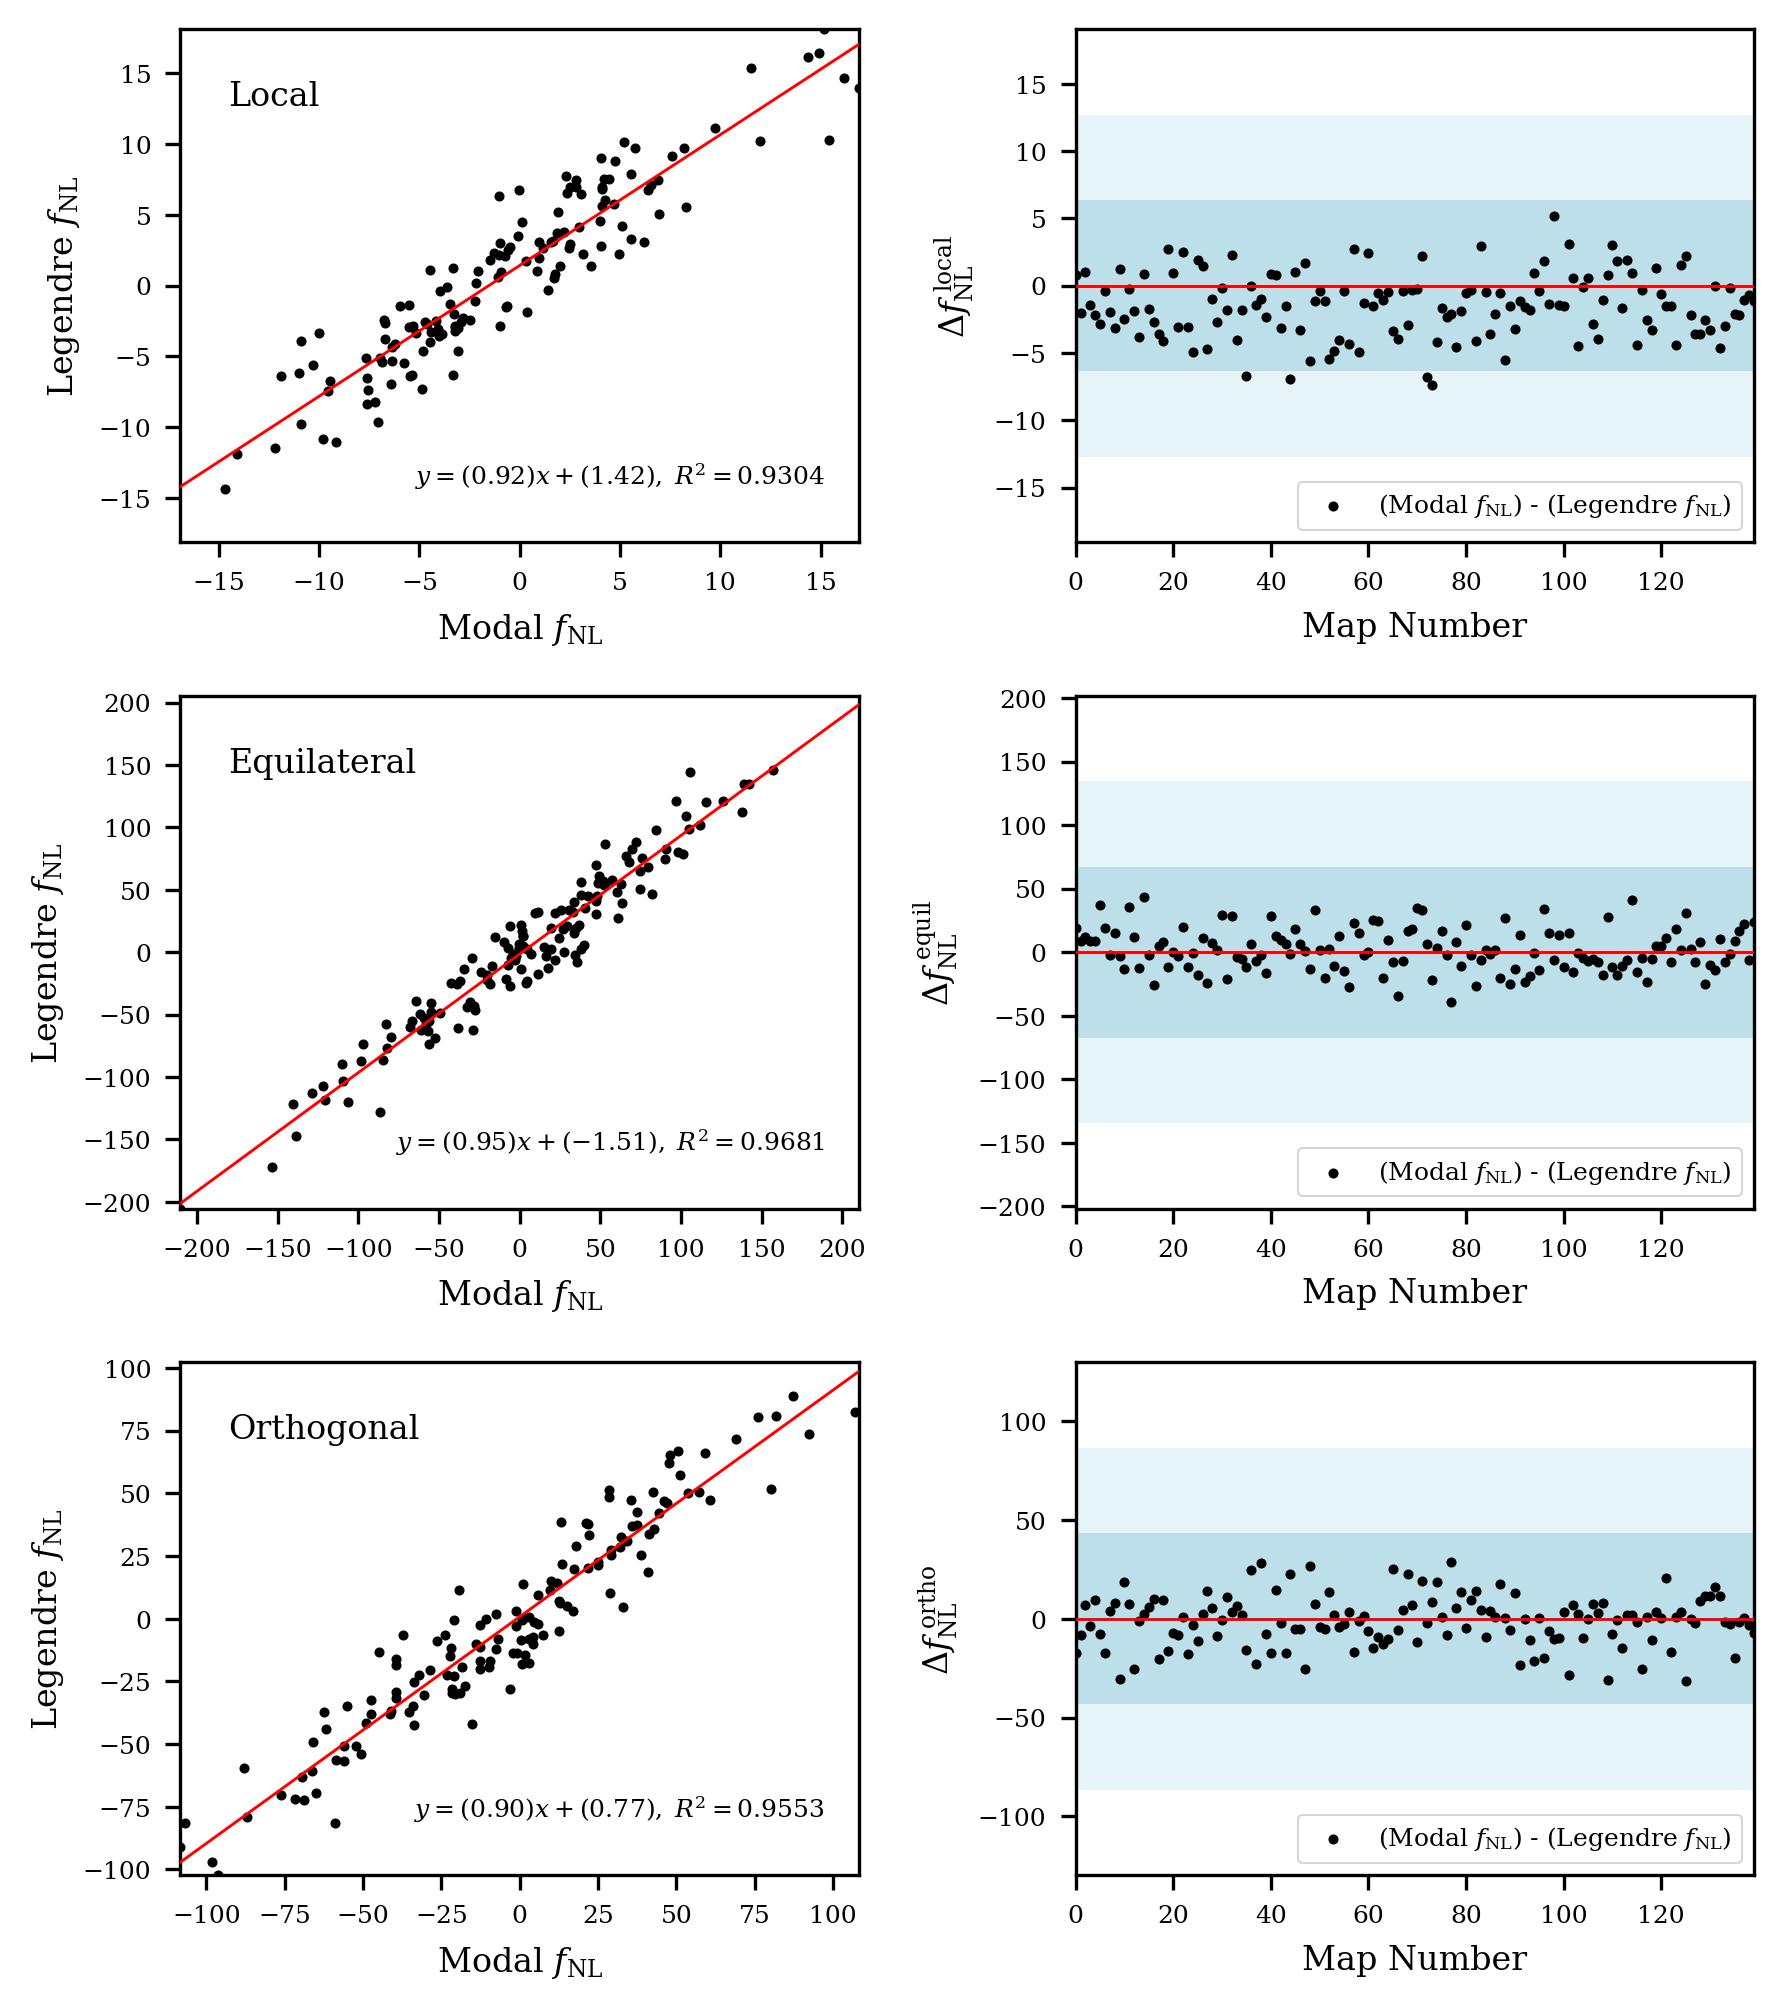

In [19]:
df_KSW = df[df["pipeline"] == "Modal"]
df_Leg = df[df["pipeline"] == "Legendre2018"]
#fig = map_by_map_plot(df_KSW, df_Leg, name1="KSW", name2="Legendre")
fig = map_by_map_plot_residual(df_KSW, df_Leg, name1="Modal", name2="Legendre", polarisation_on=False)
#fig.savefig("paper_plots/map_by_map_Modal_Legendre_T.pdf")

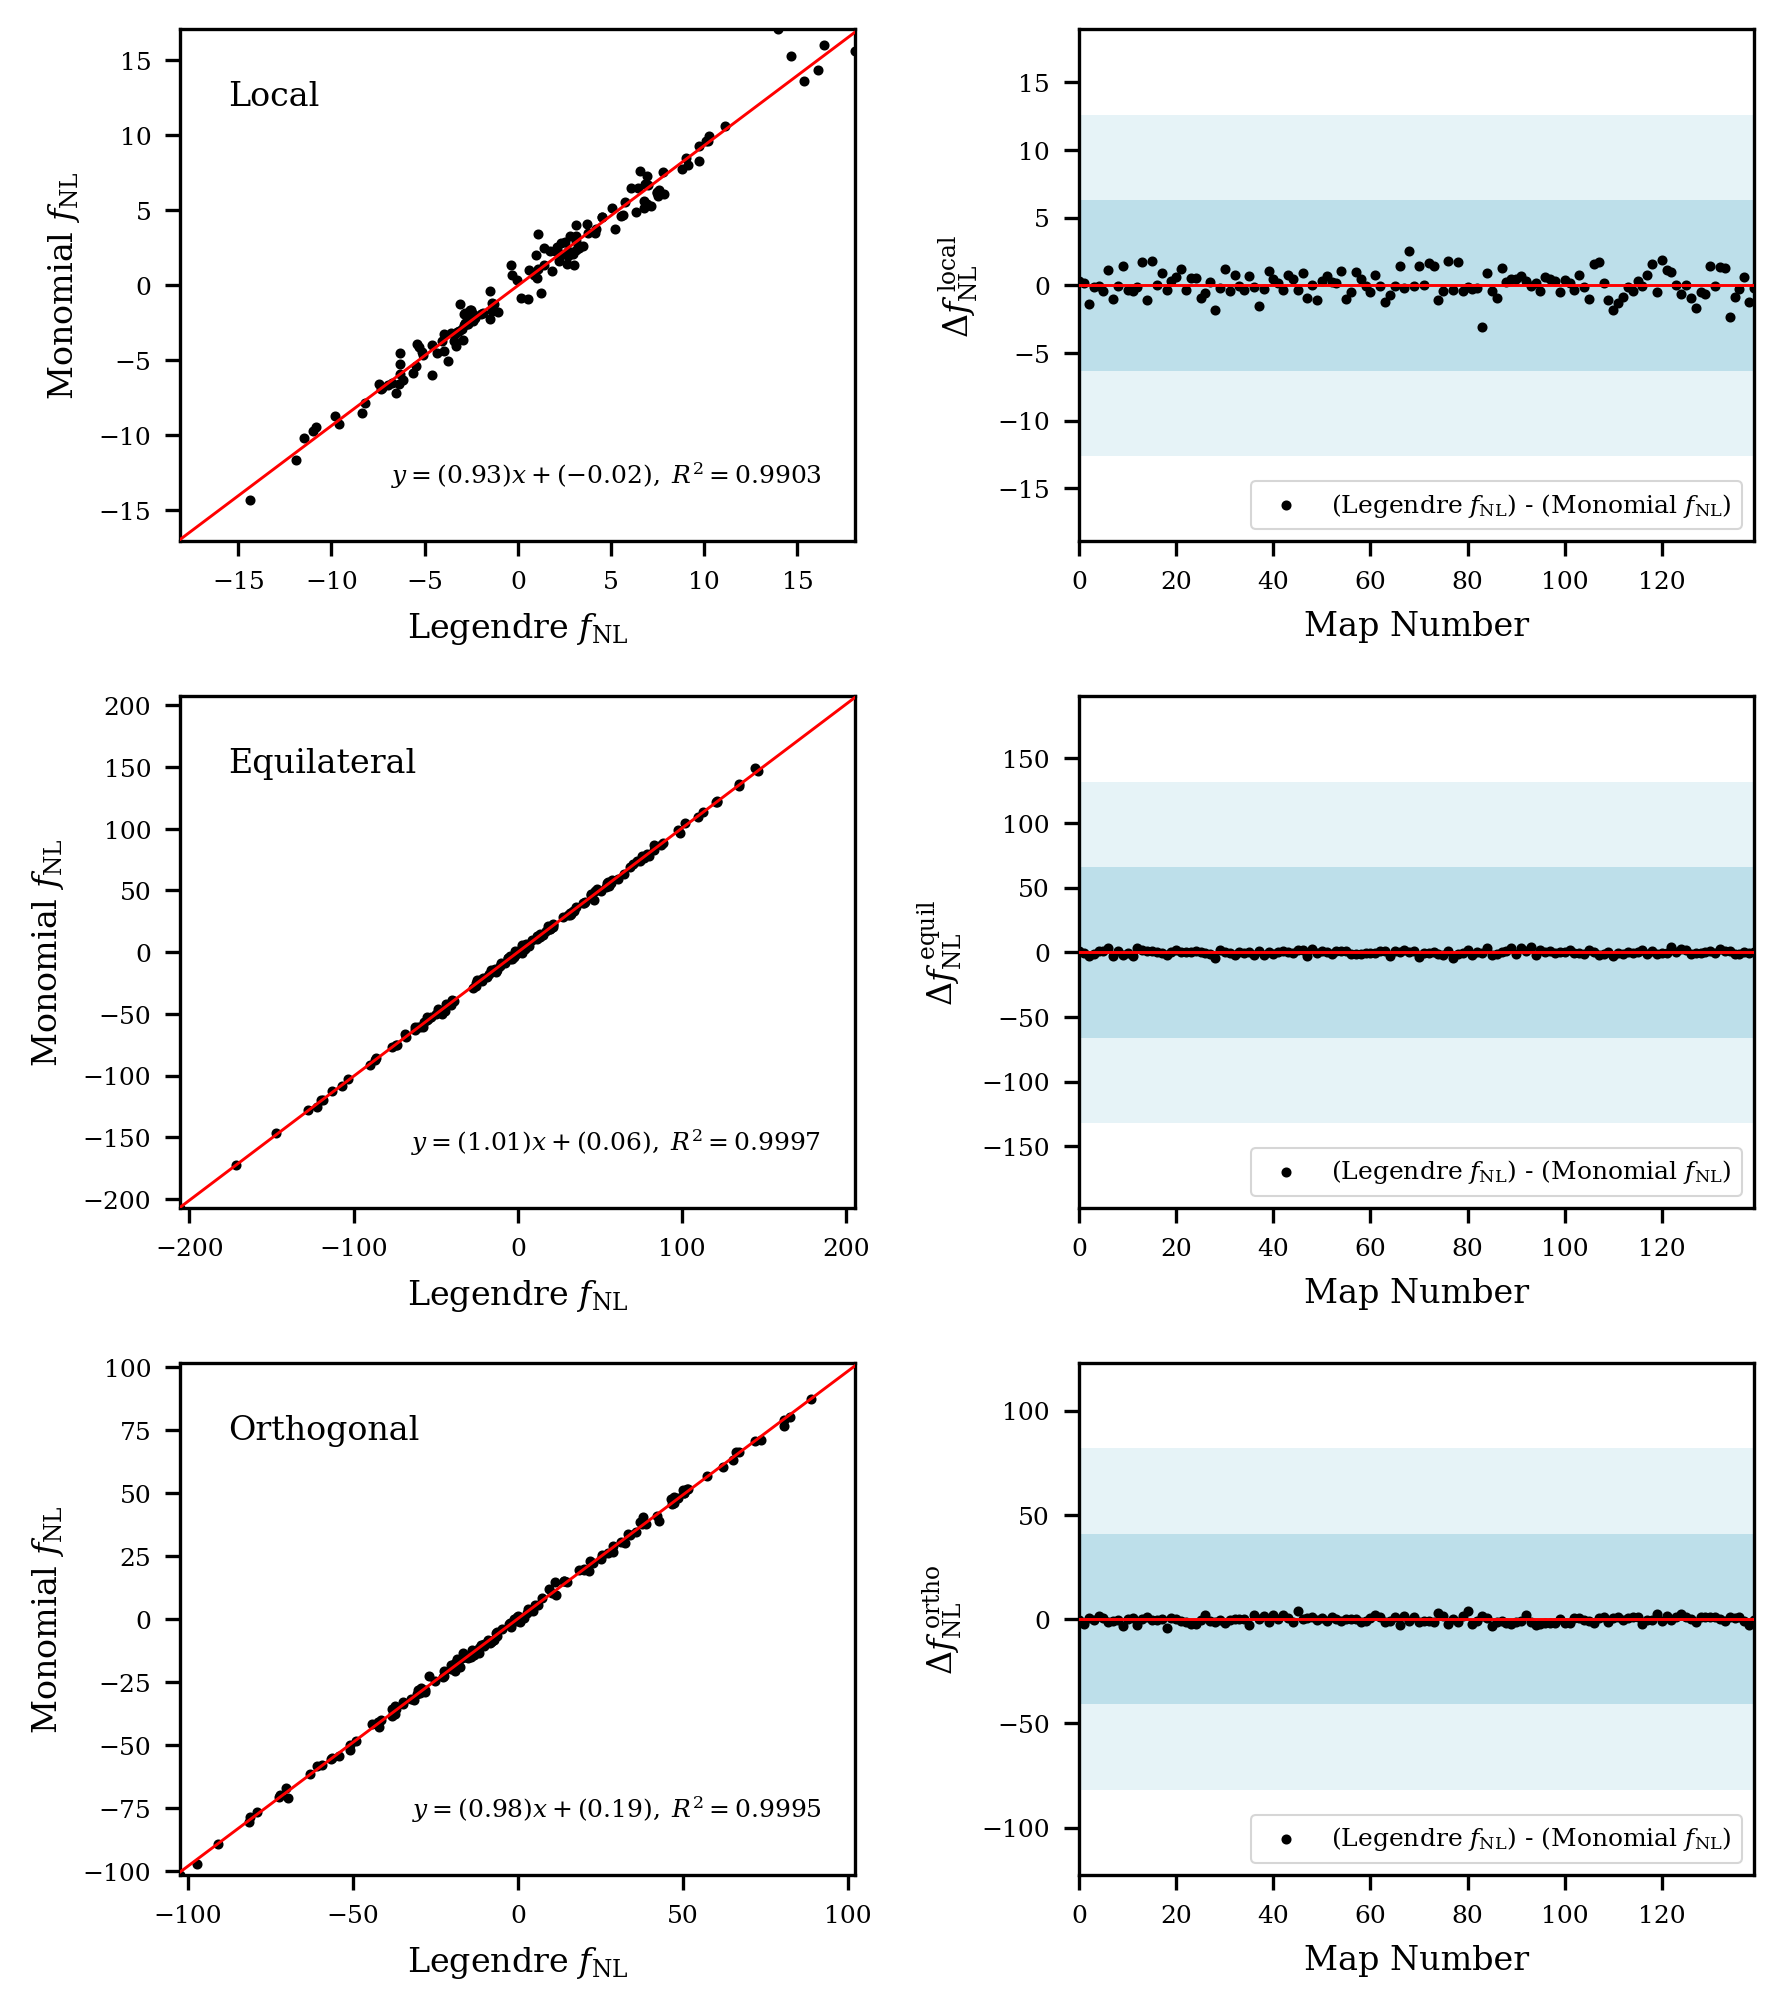

In [21]:
df_Leg = df[df["pipeline"] == "Legendre2018"]
df_Mod = df[df["pipeline"] == "KSW2018"]
#fig = map_by_map_plot(df_Leg, df_Mod, name1="Legendre", name2="Modal")

fig = map_by_map_plot_residual(df_Leg, df_Mod, name1="Legendre", name2="Monomial", polarisation_on=False)
#fig.savefig("paper_plots/map_by_map_Legendre_Monomial_T.pdf")

#fig = map_by_map_plot_residual(df_Leg, df_Mod, name1="Legendre", name2="Monomial", polarisation_on=True)
#fig.savefig("paper_plots/map_by_map_Legendre_Monomial_TP.pdf")

0.3185643723570227
68.95795856628837 48.86679739951792


(array([ 2.,  0.,  3.,  0.,  3.,  1.,  3.,  2.,  5.,  3.,  6., 10.,  7.,
        10., 11., 13.,  9., 15., 10., 12.,  7., 10.,  8.,  2.,  2.,  0.,
         4.,  1.,  1.,  1.]),
 array([-134.36016076, -125.65836746, -116.95657417, -108.25478087,
         -99.55298758,  -90.85119428,  -82.14940099,  -73.44760769,
         -64.7458144 ,  -56.0440211 ,  -47.34222781,  -38.64043451,
         -29.93864122,  -21.23684792,  -12.53505463,   -3.83326133,
           4.86853197,   13.57032526,   22.27211856,   30.97391185,
          39.67570515,   48.37749844,   57.07929174,   65.78108503,
          74.48287833,   83.18467162,   91.88646492,  100.58825821,
         109.29005151,  117.9918448 ,  126.6936381 ]),
 <BarContainer object of 30 artists>)

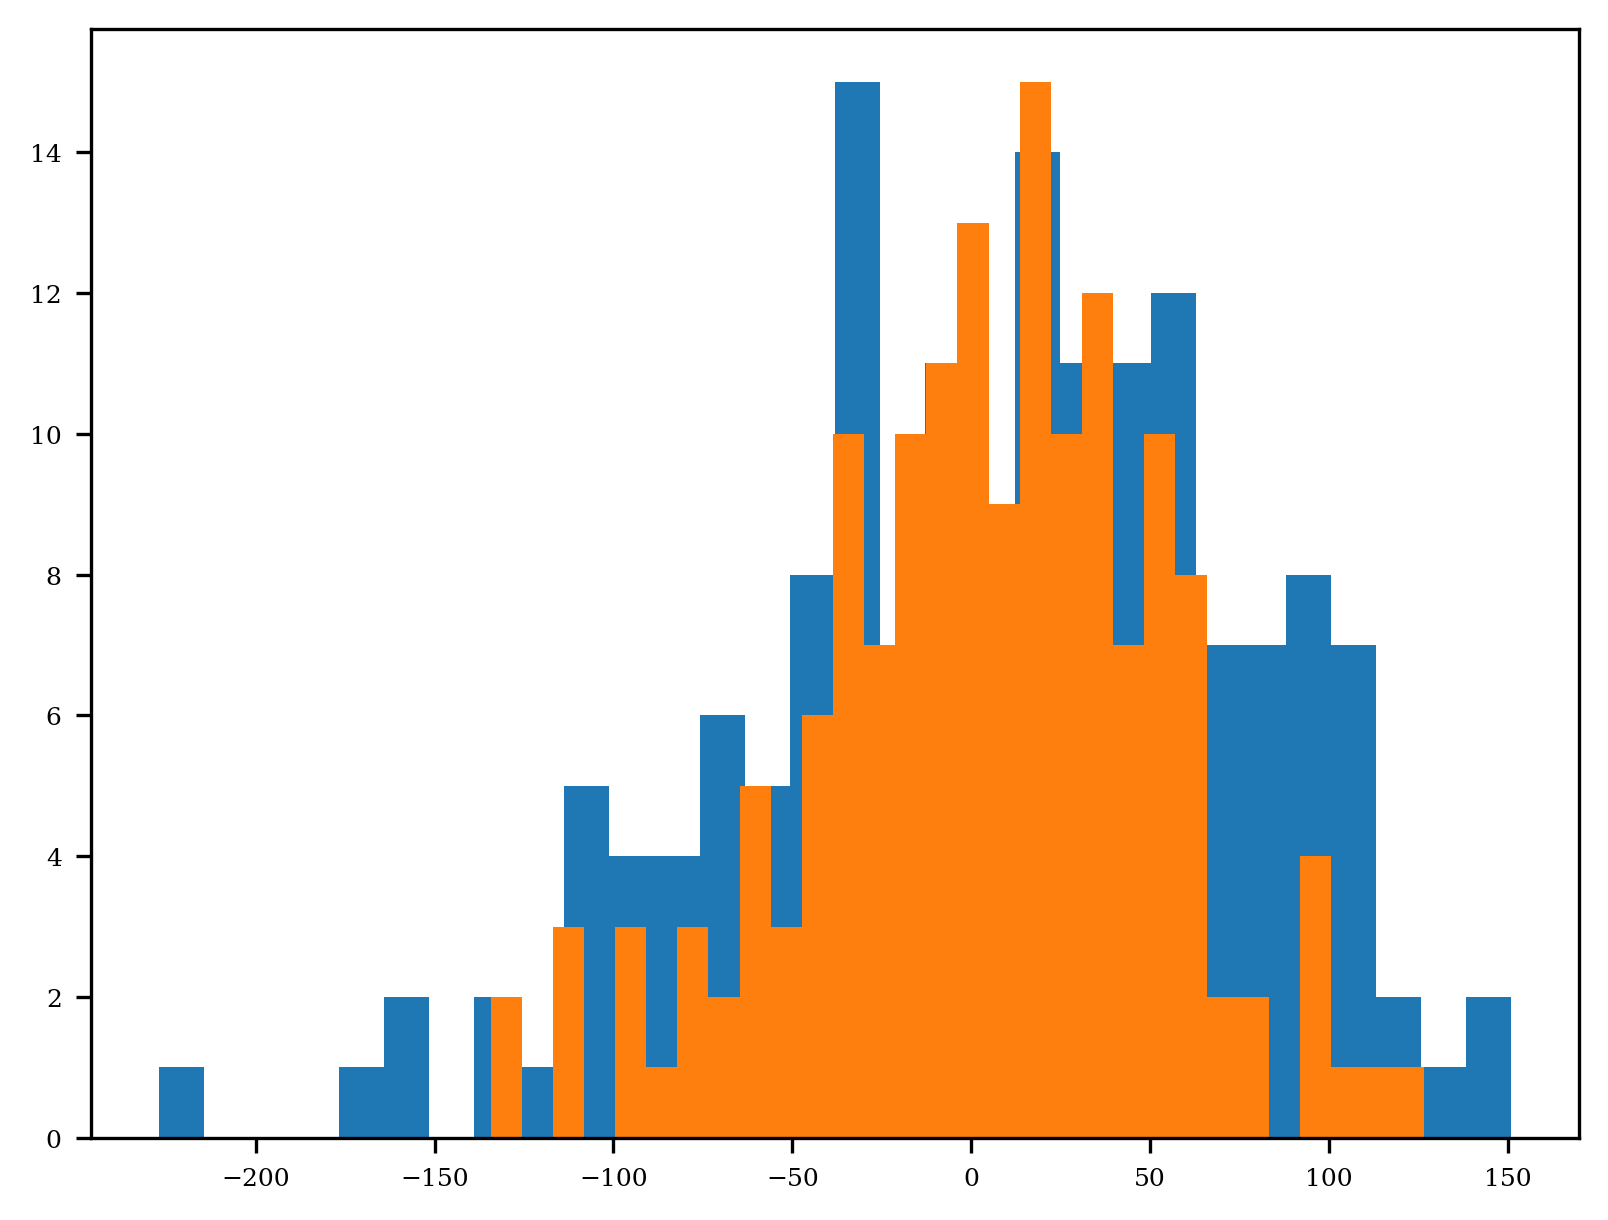

In [212]:
s = 'Equilateral'
df_a = df.query("(pipeline == 'Modal') and (template == @s)")
df_b = df.query("(pipeline == 'Legendre2018') and (template == @s)")

data_a = df_a["fNL_T+E"].values
data_b = df_b["fNL_T+E"].values
#print(data_a)

offset = 0
if offset > 0:
    data_a = data_a[:-offset]
    data_b = data_b[offset:]
elif offset < 0:
    data_a = data_a[-offset:]
    data_b = data_b[:offset]


print(np.dot(data_a, data_b) / np.sqrt(np.dot(data_a, data_a) * np.dot(data_b, data_b)))
print(np.std(data_a), np.std(data_b))

#plt.plot(data_a)
#plt.plot(data_b[2:])
#plt.scatter(data_a[:-1], data_b[1:])
plt.hist(data_a, bins=30)
plt.hist(data_b, bins=30)


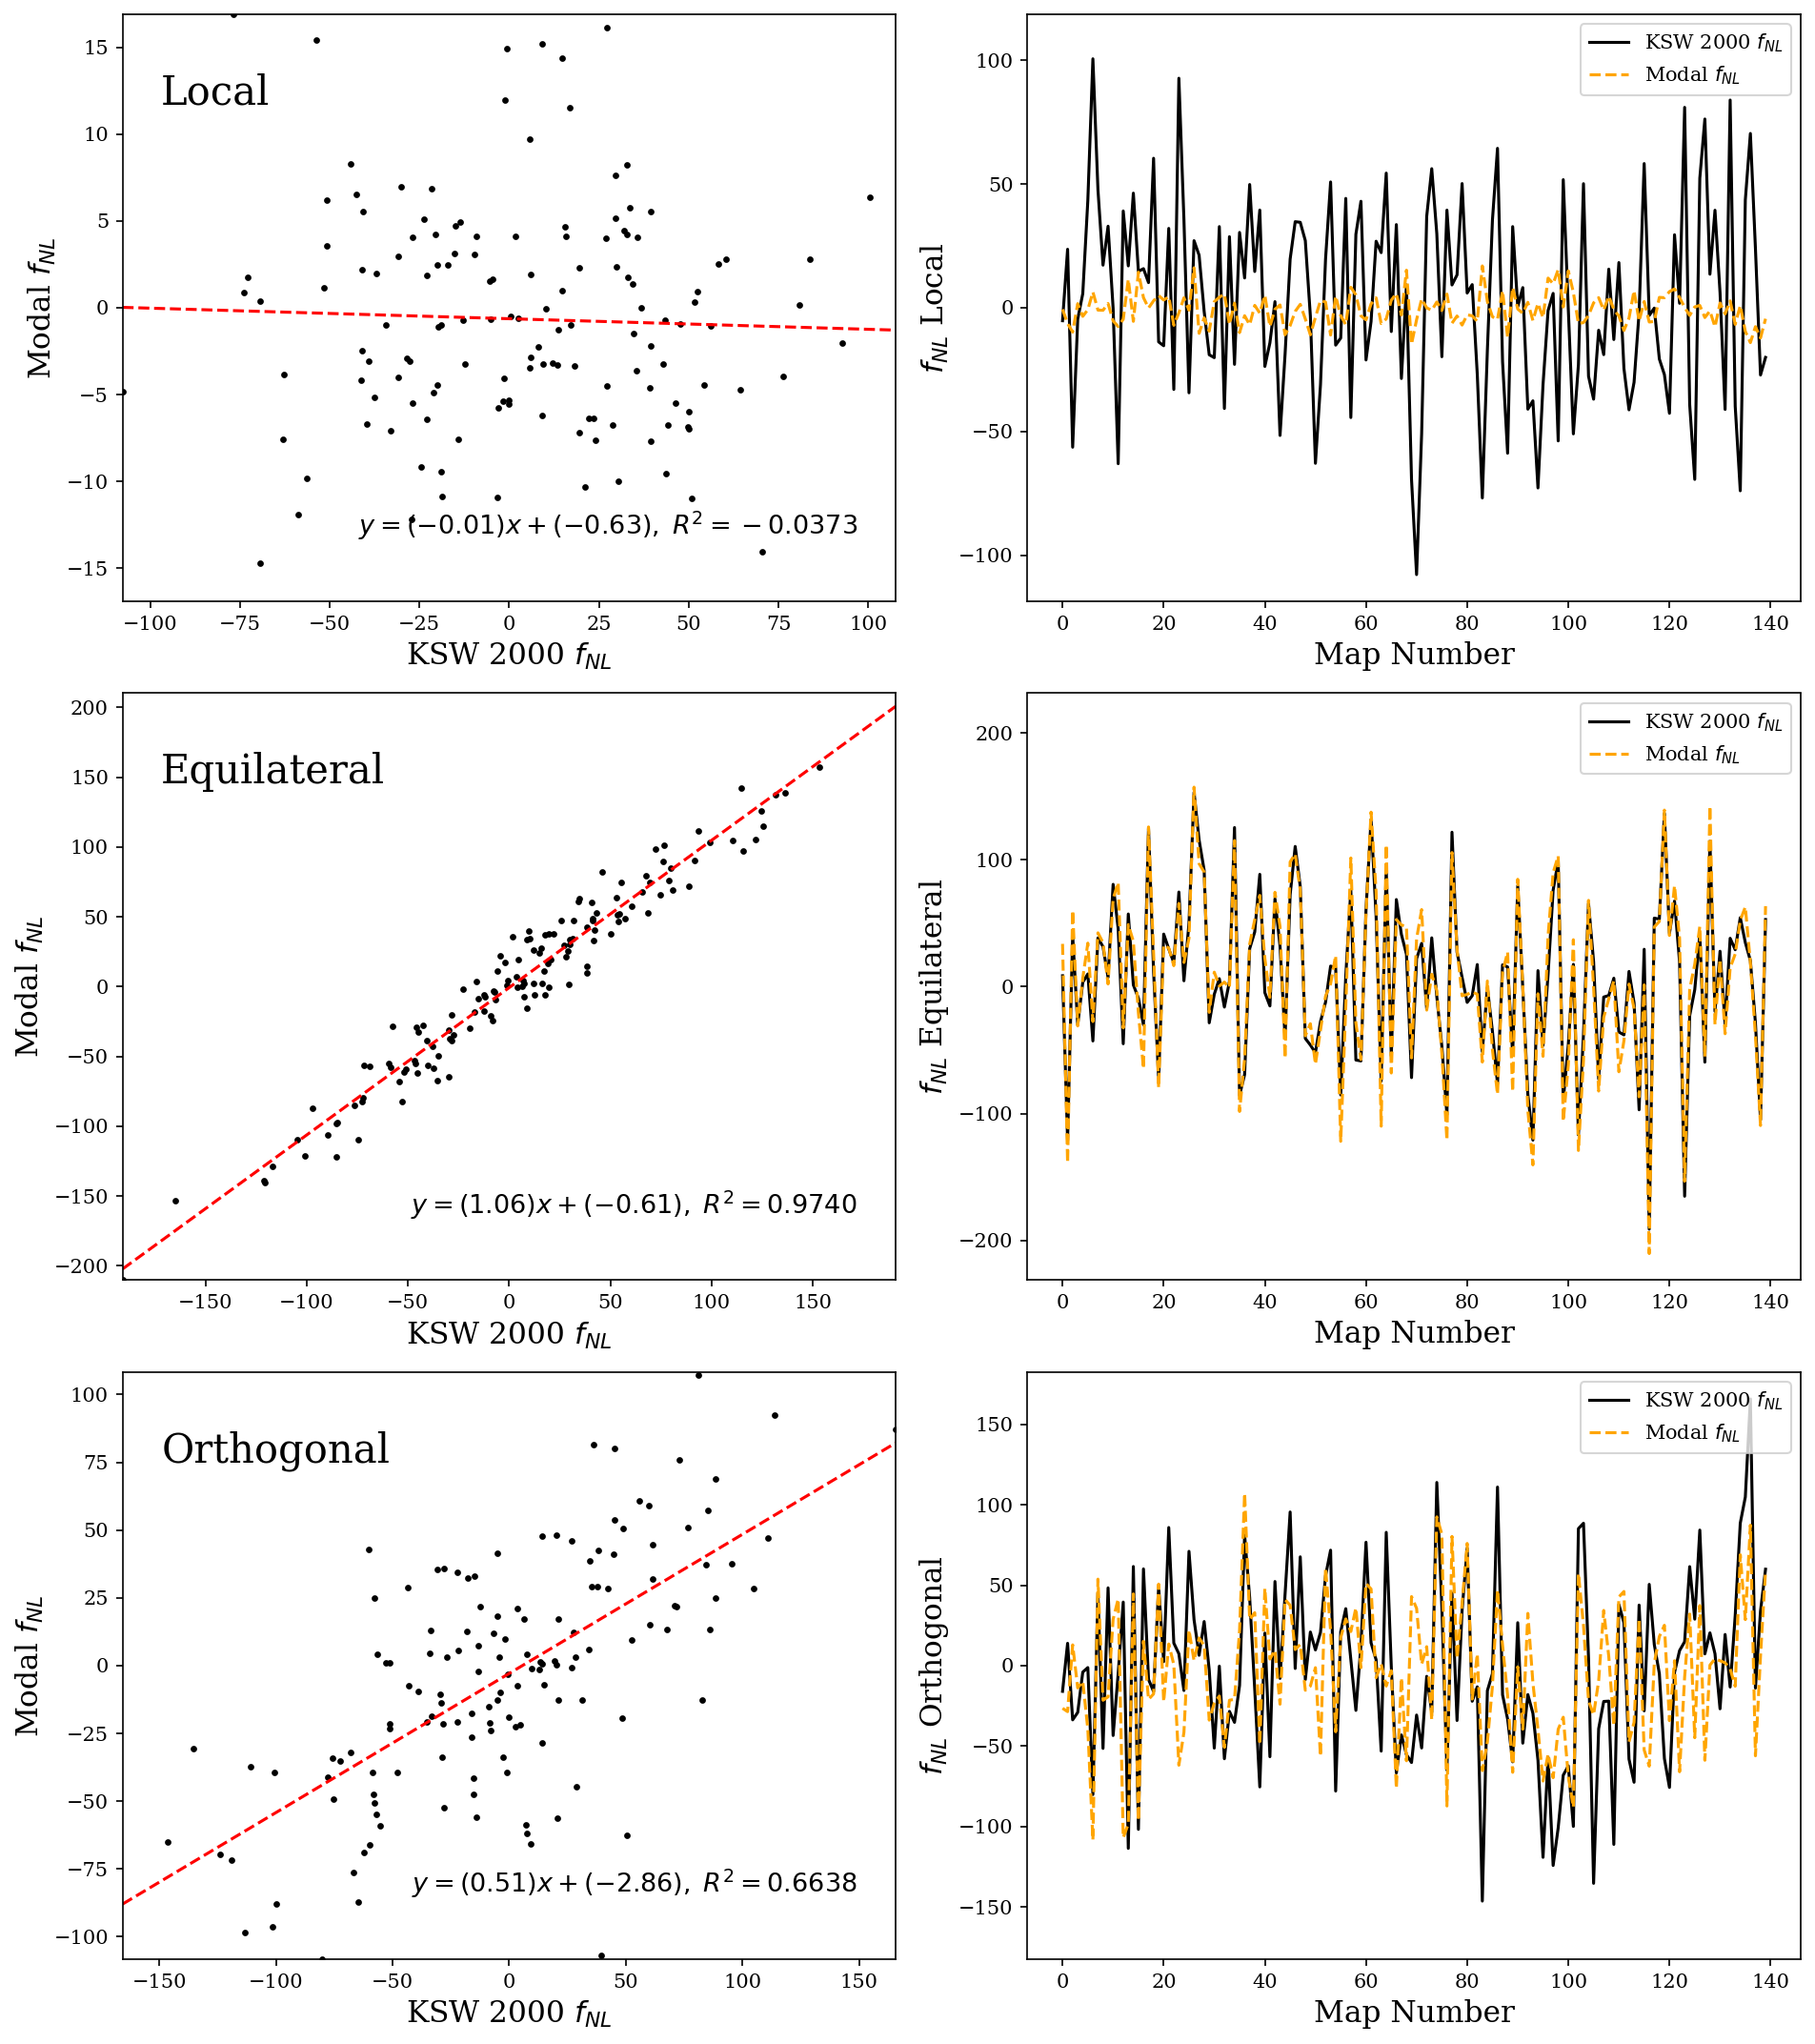

In [7]:
df_Mod = df[df["pipeline"] == "Modal"]
fig = map_by_map_plot(df_mono_2000, df_Mod, name1="KSW 2000", name2="Modal")

#fig.savefig("thesis_plots/map_by_map_Legendre_Modal.pdf")

Oops, probably forgot to use inpainted maps....

In [8]:
df_2000[df_2000["pipeline"]=="Legendre"]

template  template_p1  template_p2  map_number       fNL_T   stdev_T  \
0         Local          NaN          NaN           0  286.456145  5.489903   
1         Local          NaN          NaN           1   -0.448631       NaN   
2         Local          NaN          NaN           2   -5.741065       NaN   
3         Local          NaN          NaN           3    2.111002       NaN   
4         Local          NaN          NaN           4   -1.054206       NaN   
..          ...          ...          ...         ...         ...       ...   
750  Orthogonal          NaN          NaN         146  -19.967447       NaN   
751  Orthogonal          NaN          NaN         147  -17.827186       NaN   
752  Orthogonal          NaN          NaN         148   10.781482       NaN   
753  Orthogonal          NaN          NaN         149   43.815828       NaN   
754  Orthogonal          NaN          NaN         150   26.643091       NaN   

       sigma_T  ISW_bias_T  pipeline  
0     5.389962         NaN  Legendre  
1     5.389962         NaN  Legendre  
2     5.389962         NaN  Legendre  
3     5.389962         NaN  Legendre  
4     5.389962         NaN  Legendre  
..         ...         ...       ...  
750  32.459813         NaN  Legendre  
751  32.459813         NaN  Legendre  
752  32.459813         NaN  Legendre  
753  32.459813         NaN  Legendre  
754  32.459813         NaN  Legendre  

[453 rows x 9 columns]

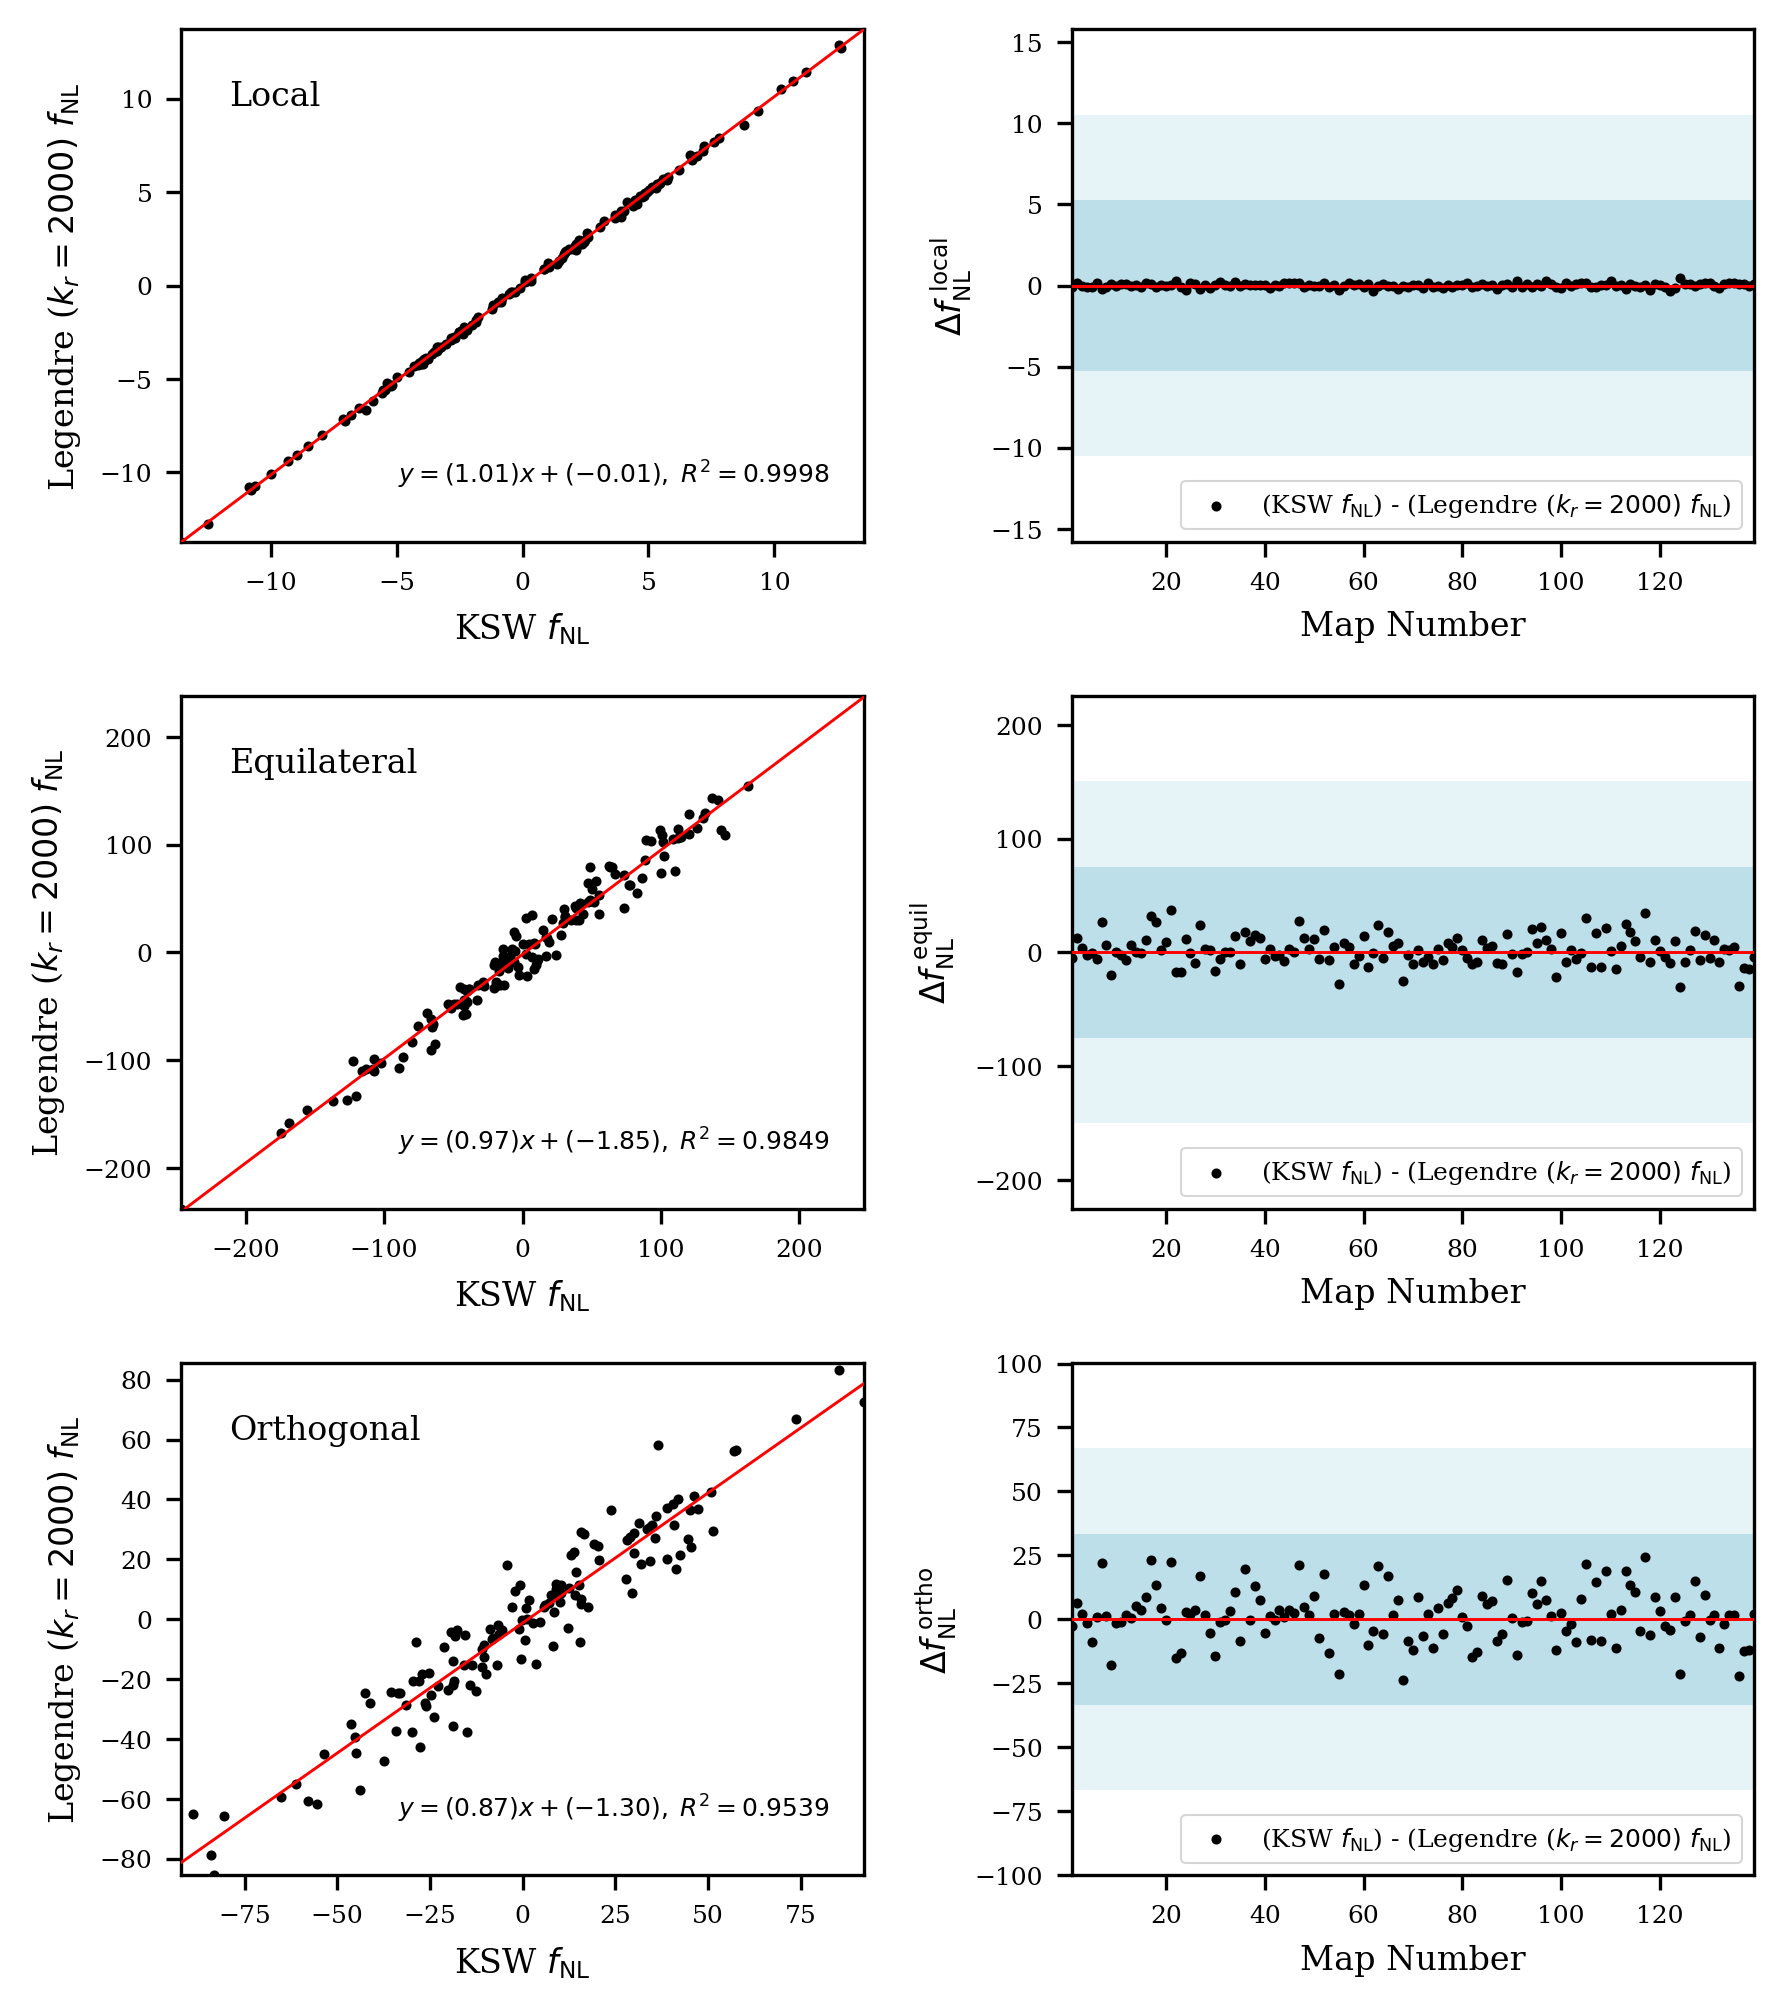

In [132]:
df_2000_Leg = df_2000[df_2000["pipeline"] == "Legendre"]
df_2000_KSW = df_2000[df_2000["pipeline"] == "KSW"]
#fig = map_by_map_plot(df_2000_KSW, df_2000_Leg, name1="KSW", name2=r"Legendre ($k_{r}=2000)$", ignore_first_map=True)
fig = map_by_map_plot_residual(df_2000_KSW, df_2000_Leg, name1="KSW", name2=r"Legendre ($k_{r}=2000)$", ignore_first_map=True)
fig.savefig("thesis_plots/map_by_map_Legendre_KSW_k_ratio_2000.pdf")

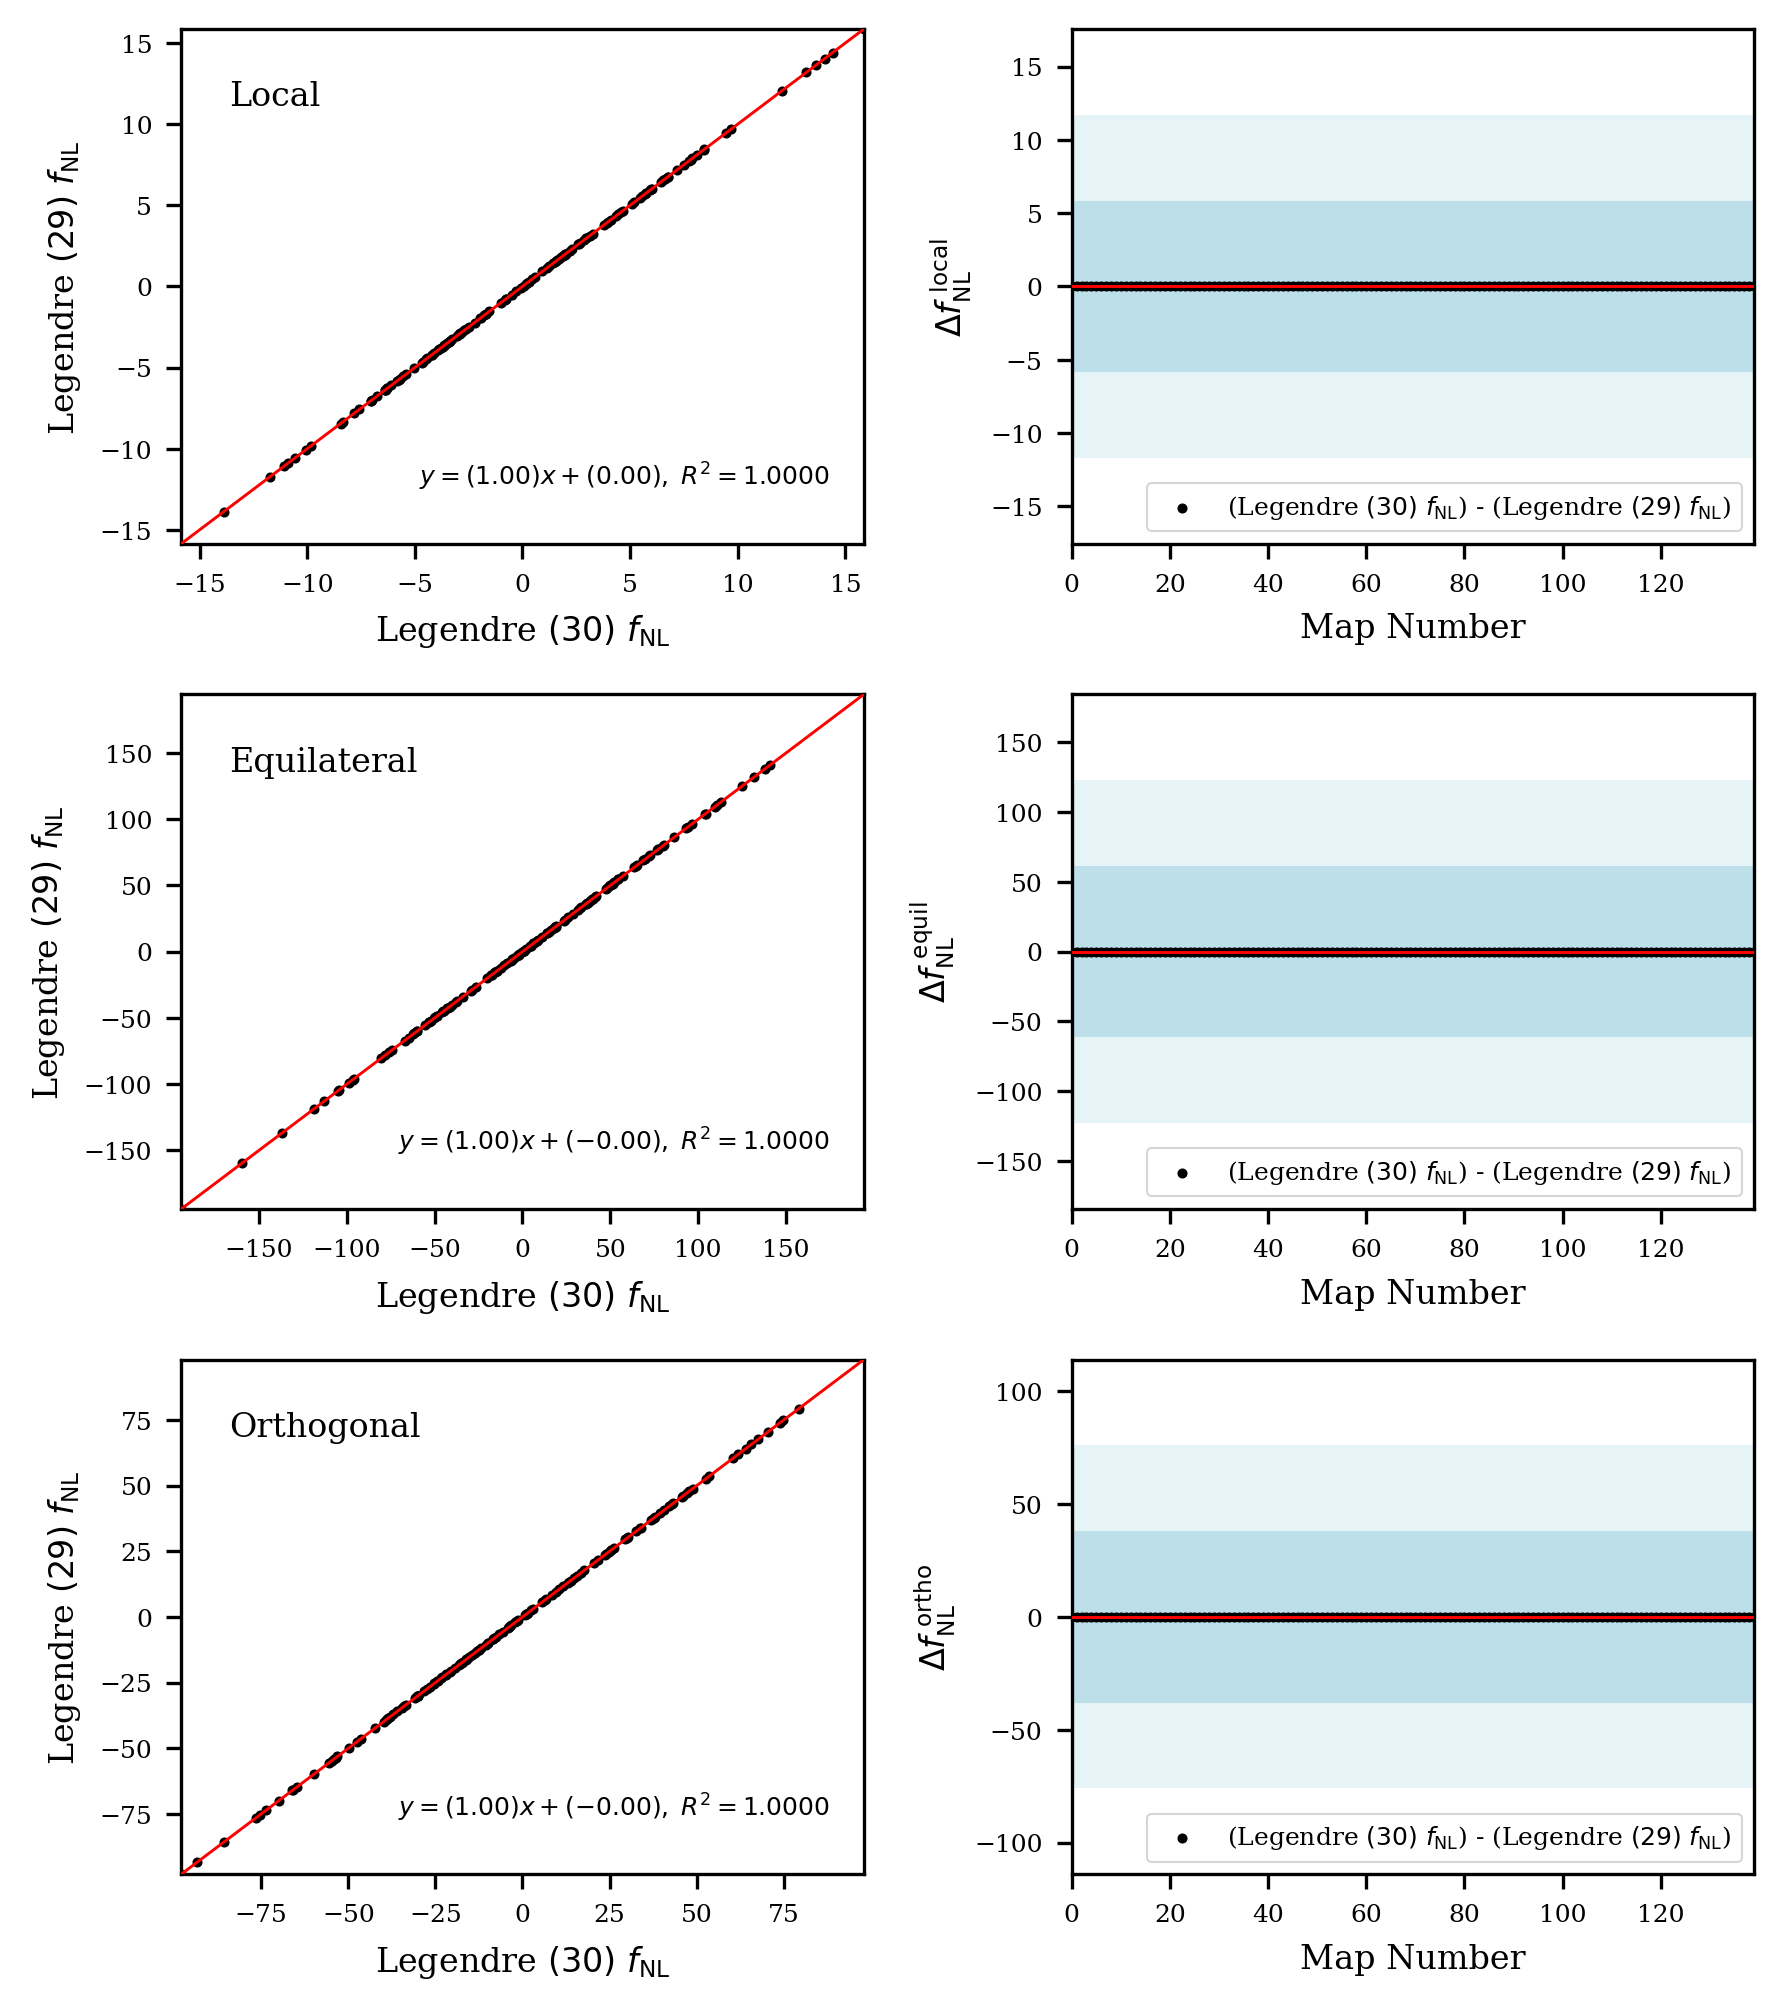

In [133]:
df_Leg = df[df["pipeline"] == "Legendre"]
df_29 = df_29
#fig = map_by_map_plot(df_Leg, df_29, name1=r"Legendre $p_{max}=30$", name2=r"Legendre $p_{max}=29$")
fig = map_by_map_plot_residual(df_Leg, df_29, name1=r"Legendre $(30)$", name2=r"Legendre $(29)$")
fig.savefig("thesis_plots/map_by_map_Legendre_30_29.pdf")

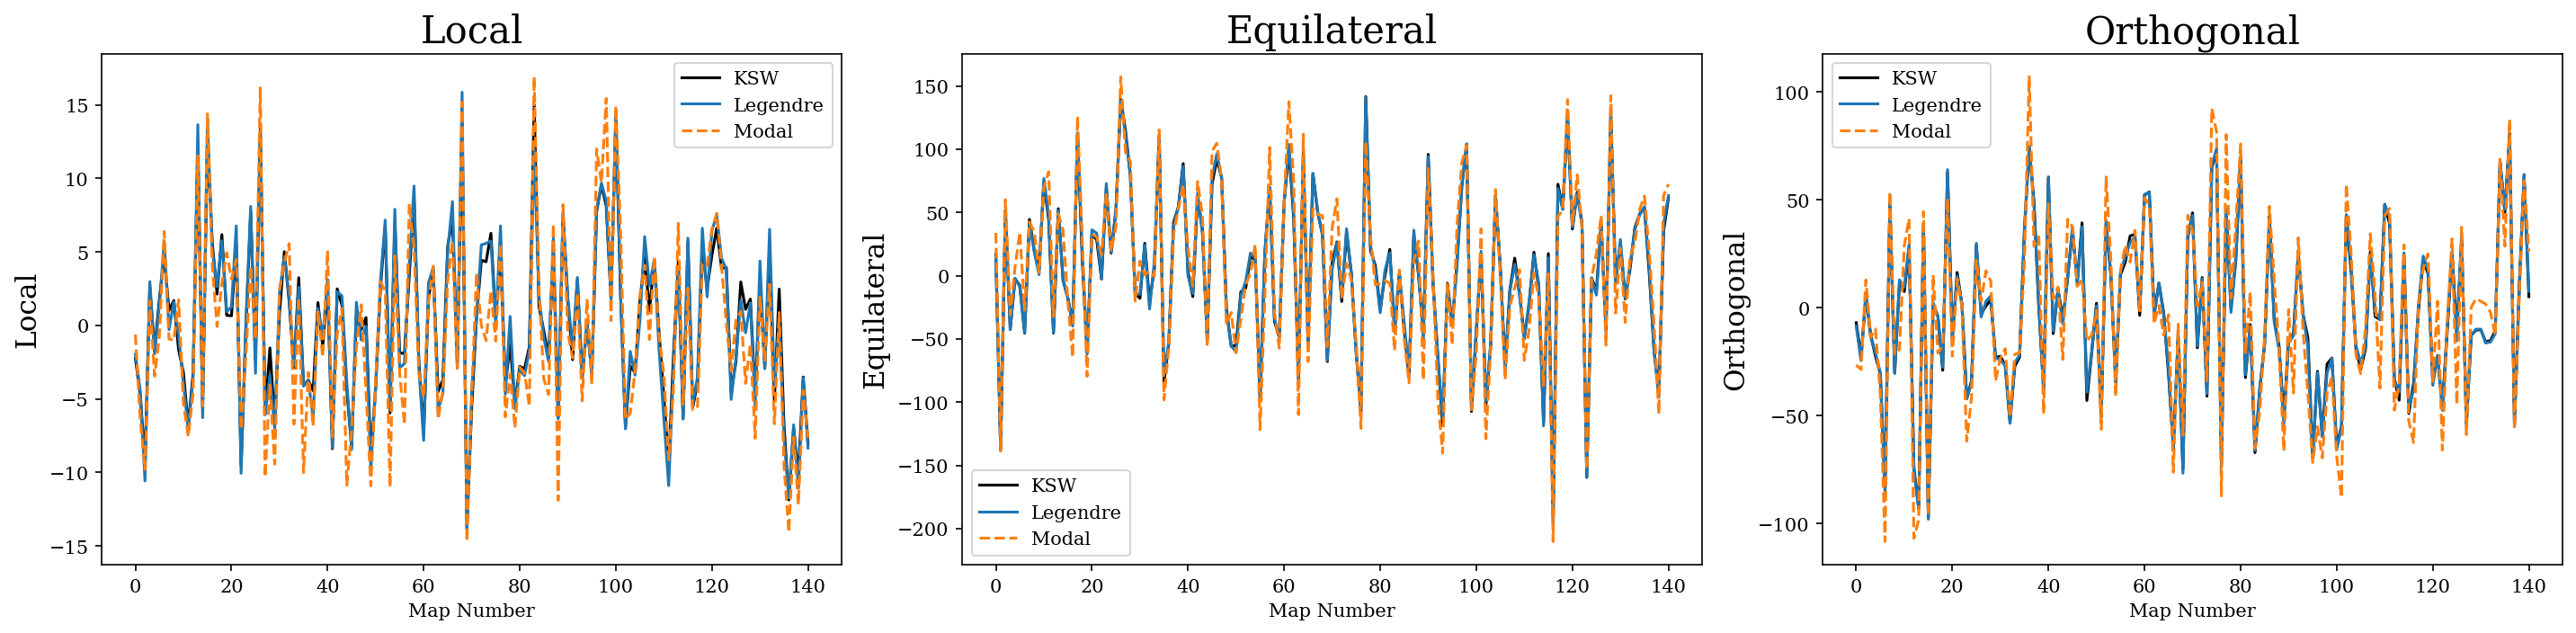

In [30]:
# Correlation plots
from scipy.stats import linregress

n_maps = 140
map_range = np.arange(n_maps + 1)
shapes = ['Local', 'Equilateral', 'Orthogonal']
fig, axs = plt.subplots(1,len(shapes), figsize=[6.4*len(shapes),4.8], dpi=150)

for i, shape in enumerate(shapes):
    sub_df = df.loc[(df["template"] == shape) & (df["map_number"].isin(map_range))]
    sub_df.sort_values(["pipeline", "map_number"])
    K = sub_df.loc[sub_df["pipeline"] == "KSW", "fNL_T"]
    L = sub_df.loc[sub_df["pipeline"] == "Legendre", "fNL_T"]
    M = sub_df.loc[sub_df["pipeline"] == "Modal", "fNL_T"]
    K = K.reset_index()['fNL_T']
    L = L.reset_index()['fNL_T']
    M = M.reset_index()['fNL_T']
    
    axs[i].plot(K, '-k', label='KSW')
    axs[i].plot(L, '-', label='Legendre')
    axs[i].plot(M, '--', label='Modal')
    axs[i].set_ylabel(shape, fontsize=15)
    axs[i].set_xlabel("Map Number", fontsize=10)
    axs[i].set_title(shape, fontsize=20)
    axs[i].legend()
    
plt.tight_layout()
#plt.savefig("plots/full_trio_map_by_map.png")

Now compare oscilatory models. Since the KSW estimator cannot cover non-separable shapes, the results are for Legendre and Modal only.

In [31]:
# Checking parameter ranges
feat = df[df["template"] == "Feature"]
feat = feat.sort_values(["pipeline", "template_p1", "template_p2"])
feat = feat.set_index(["pipeline", "template_p1"])
feat[["template", "template_p2", "map_number", "sigma_T"]]

template  template_p2  map_number     sigma_T
pipeline template_p1                                              
Legendre 10.0         Feature          0.0           0   50.650601
         10.0         Feature          0.0           1   50.650601
         10.0         Feature          0.0           2   50.650601
         10.0         Feature          0.0           3   50.650601
         10.0         Feature          0.0           4   50.650601
...                       ...          ...         ...         ...
Modal    350.0        Feature          5.0           0  235.110000
         350.0        Feature          6.0           0  218.520000
         350.0        Feature          7.0           0  202.030000
         350.0        Feature          8.0           0  191.000000
         350.0        Feature          9.0           0  187.120000

[17270 rows x 4 columns]

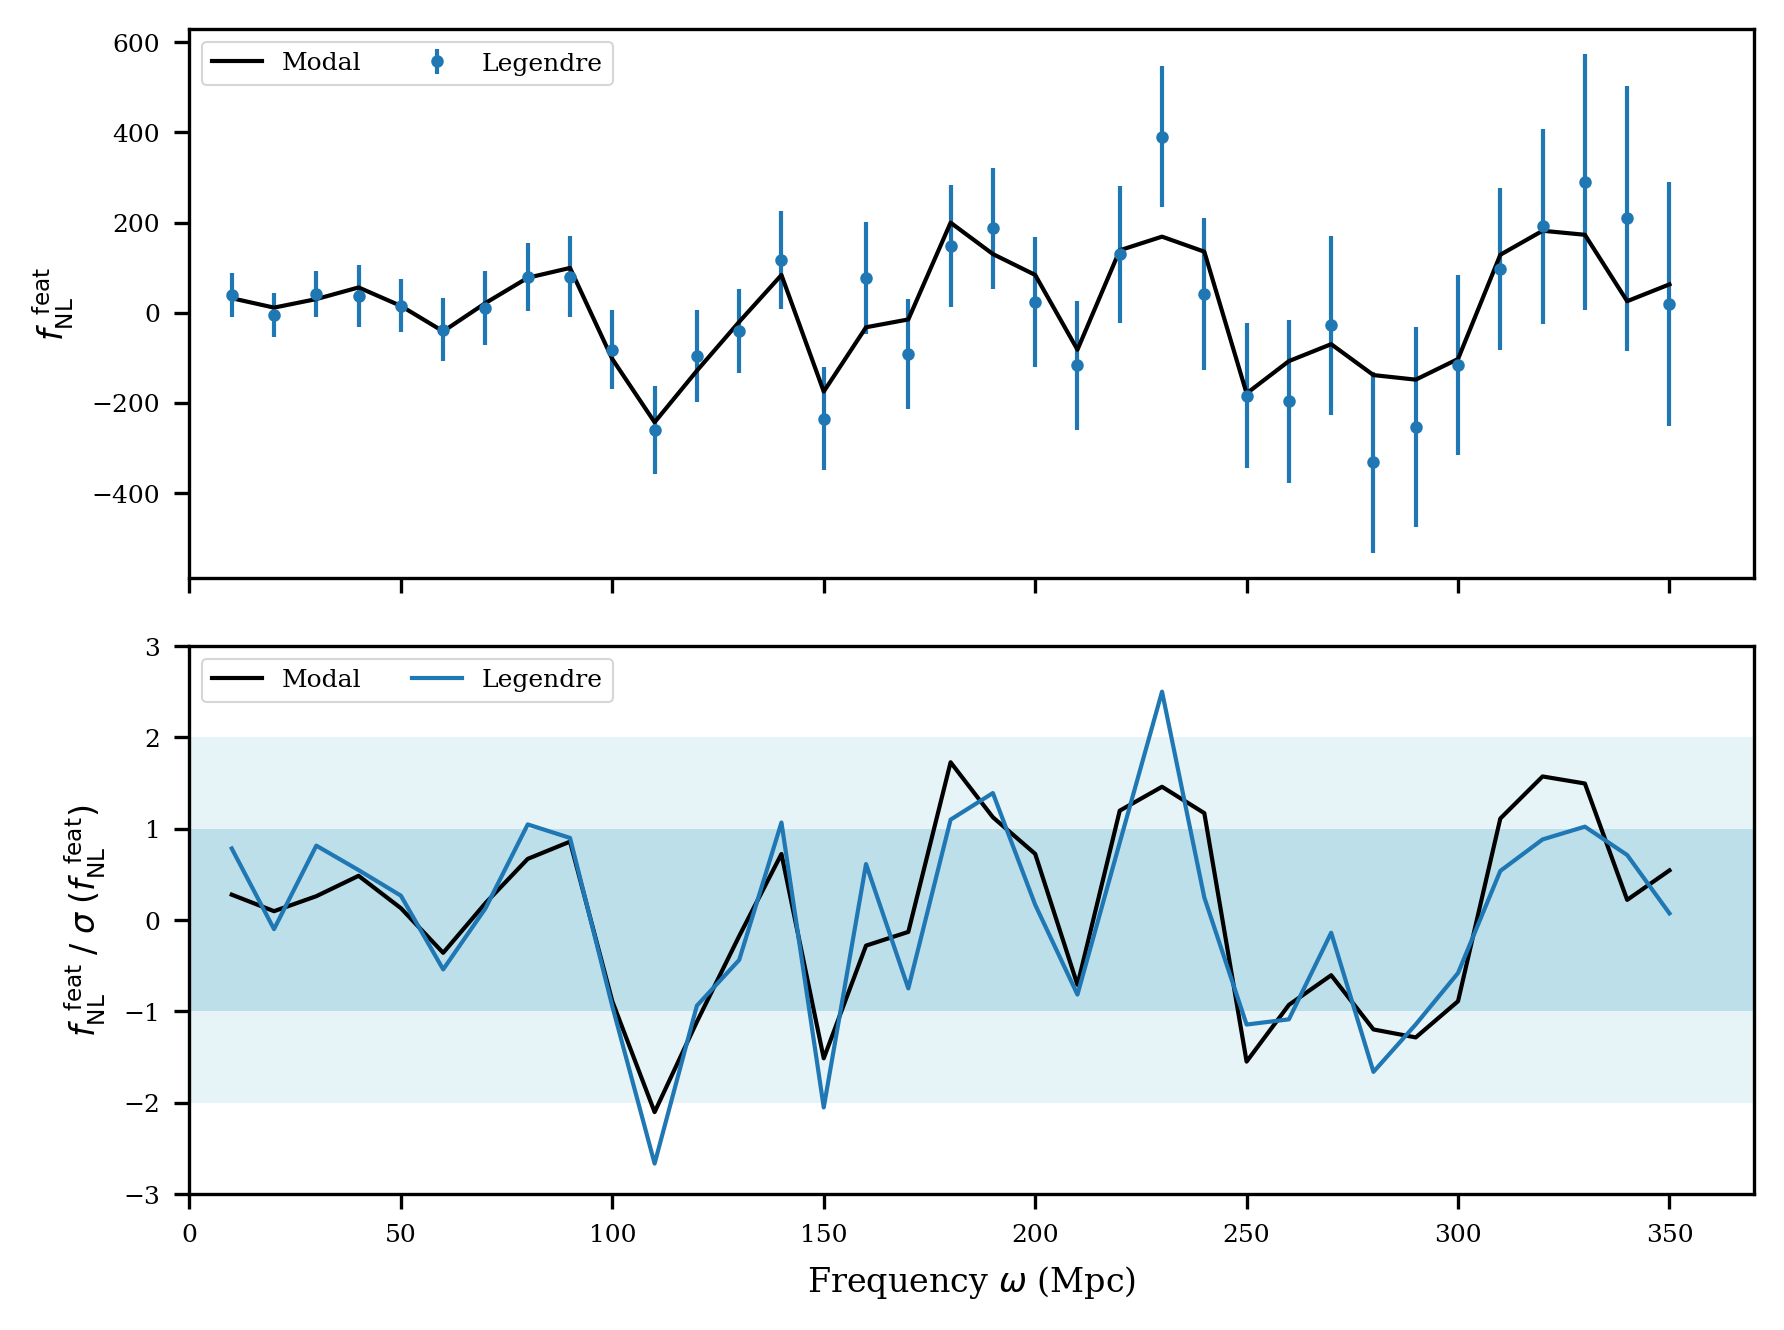

In [155]:
# fNL vs frequency plots

freq_range = np.arange(10, 360, 10)
shape = 'Feature'

full_range = np.concatenate([[0], freq_range, [freq_range[-1]+20]])
ones = np.ones_like(full_range)
#fig, axs = plt.subplots(1, 2, figsize=[6.4*2, 4.8], dpi=150)
#fig, axs = plt.subplots(1, 2, figsize=(fig_width_in,fig_width_in*0.75*0.5), dpi=300)
fig, axs = plt.subplots(2, 1, figsize=(fig_width_in,fig_width_in*0.75), sharex=True, dpi=300)

sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                    & (df["template_p1"].isin(freq_range)) & (df["template_p2"] == 0)]
sub_df.sort_values(["pipeline", "template_p1"])
L = sub_df.loc[sub_df["pipeline"] == "Legendre", "fNL_T"]
M = sub_df.loc[sub_df["pipeline"] == "Modal", "fNL_T"]
M_stdev = np.std(M)
L_stdev = sub_df.loc[sub_df["pipeline"] == "Legendre", "stdev_T"]

sub_df_tetra = df_tetra.loc[(df_tetra["template"] == shape) & (df_tetra["map_number"] == 0)
                    & (df_tetra["template_p1"].isin(freq_range)) & (df_tetra["template_p2"] == 0)]
sub_df_tetra.sort_values(["template_p1"])
T = sub_df_tetra["fNL_T"]
T_stdev = sub_df_tetra["stdev_T"]

axs[0].errorbar(freq_range, L, c='tab:blue', yerr=L_stdev, fmt='o', ms=2, lw=1, label="Legendre")
axs[0].plot(freq_range, M, '-', c='k', lw=1, label="Modal")
axs[0].set_ylabel(r'$f_\mathrm{NL}^{\;\;\mathrm{feat}}$')
#axs[0].set_xlabel(r'Frequency $\omega$ (Mpc)')
axs[0].set_xlim([full_range[0], full_range[-1]])
axs[0].legend()
#axs[0].set_title(shape + r' $f_{NL}^{Feature}$', fontsize=20)
legend = axs[0].legend(loc="upper left", frameon=True, ncol=2)
legend.get_frame().set_linewidth(0.5)
#axs[0].errorbar(freq_range, T, yerr=T_stdev, fmt='o', label="Tetrapyd")

#'''
L_sigma = sub_df.loc[sub_df["pipeline"] == "Legendre", "sigma_T"]
M_sigma = sub_df.loc[sub_df["pipeline"] == "Modal", "sigma_T"]

sub_df.sort_values(["template_p1"])

#axs[1].plot(freq_range, M_sigma, '-k', label="Modal")
#axs[1].plot(freq_range, L_sigma, '--', label="Legendre")
axs[1].plot(freq_range, M/M_stdev, '-', c='k', lw=1, label="Modal")
axs[1].plot(freq_range, L/L_stdev, '-', c='tab:blue', lw=1, label="Legendre")
axs[1].fill_between(full_range, -ones, ones, alpha=0.7, lw=0, color='lightblue')
axs[1].fill_between(full_range, -2 * ones, 2 * ones, alpha=0.3, lw=0, color='lightblue')
axs[1].set_ylabel(r'$f_\mathrm{NL}^{\;\;\mathrm{feat}} \;/\; \sigma \; (f_\mathrm{NL}^{\;\;\mathrm{feat}})$')
axs[1].set_xlabel(r'Frequency $\omega$ (Mpc)')
axs[1].set_xlim([full_range[0], full_range[-1]])
axs[1].set_ylim([-3,3])
legend = axs[1].legend(loc="upper left", frameon=True, ncol=2)
legend.get_frame().set_linewidth(0.5)
#axs[1].set_title(shape + r' $\sigma^T$', fontsize=20)
#'''

fig.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")
plt.savefig("thesis_plots/sine_template_frequency_Legendre_Modal.pdf")

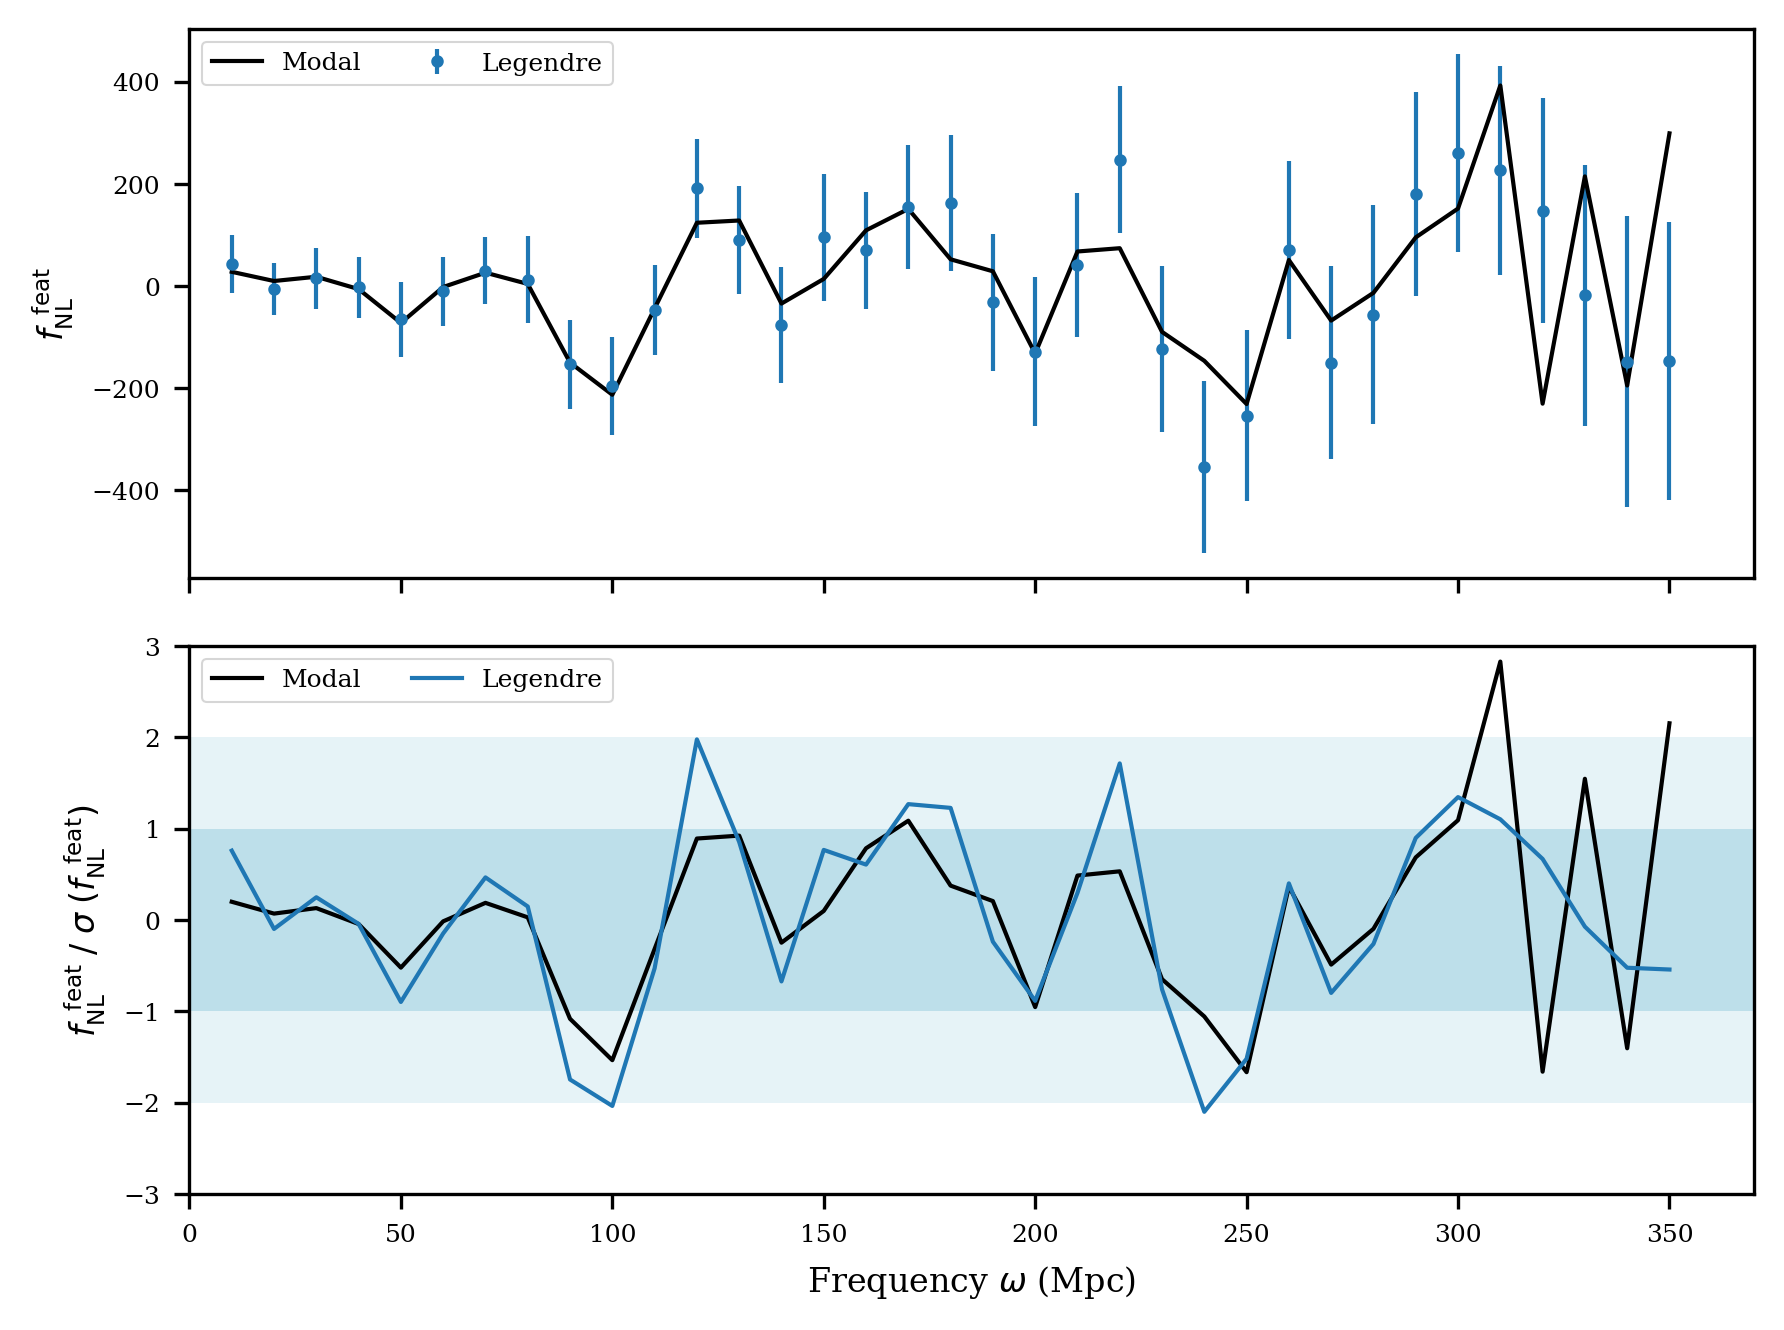

In [154]:
# fNL vs frequency plots: cosine

freq_range = np.arange(10, 360, 10)
shape = 'Feature'

full_range = np.concatenate([[0], freq_range, [freq_range[-1]+20]])
ones = np.ones_like(full_range)
#fig, axs = plt.subplots(1, 2, figsize=[6.4*2, 4.8], dpi=150)
#fig, axs = plt.subplots(1, 2, figsize=(fig_width_in,fig_width_in*0.75*0.5), dpi=300)
fig, axs = plt.subplots(2, 1, figsize=(fig_width_in,fig_width_in*0.75), sharex=True, dpi=300)

sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                    & (df["template_p1"].isin(freq_range)) & (df["template_p2"].isin([5,90]))]
sub_df.sort_values(["pipeline", "template_p1"])
L = sub_df.loc[sub_df["pipeline"] == "Legendre", "fNL_T"]
M = sub_df.loc[sub_df["pipeline"] == "Modal", "fNL_T"]
M_stdev = np.std(M)
L_stdev = sub_df.loc[sub_df["pipeline"] == "Legendre", "stdev_T"]

sub_df_tetra = df_tetra.loc[(df_tetra["template"] == shape) & (df_tetra["map_number"] == 0)
                    & (df_tetra["template_p1"].isin(freq_range)) & (df_tetra["template_p2"] == 0)]
sub_df_tetra.sort_values(["template_p1"])
T = sub_df_tetra["fNL_T"]
T_stdev = sub_df_tetra["stdev_T"]

axs[0].errorbar(freq_range, L, c='tab:blue', yerr=L_stdev, fmt='o', ms=2, lw=1, label="Legendre")
axs[0].plot(freq_range, M, '-', c='k', lw=1, label="Modal")
axs[0].set_ylabel(r'$f_\mathrm{NL}^{\;\;\mathrm{feat}}$')
#axs[0].set_xlabel(r'Frequency $\omega$ (Mpc)')
axs[0].set_xlim([full_range[0], full_range[-1]])
axs[0].legend()
#axs[0].set_title(shape + r' $f_{NL}^{Feature}$', fontsize=20)
legend = axs[0].legend(loc="upper left", frameon=True, ncol=2)
legend.get_frame().set_linewidth(0.5)
#axs[0].errorbar(freq_range, T, yerr=T_stdev, fmt='o', label="Tetrapyd")

#'''
L_sigma = sub_df.loc[sub_df["pipeline"] == "Legendre", "sigma_T"]
M_sigma = sub_df.loc[sub_df["pipeline"] == "Modal", "sigma_T"]

sub_df.sort_values(["template_p1"])

#axs[1].plot(freq_range, M_sigma, '-k', label="Modal")
#axs[1].plot(freq_range, L_sigma, '--', label="Legendre")
axs[1].plot(freq_range, M/M_stdev, '-', c='k', lw=1, label="Modal")
axs[1].plot(freq_range, L/L_stdev, '-', c='tab:blue', lw=1, label="Legendre")
axs[1].fill_between(full_range, -ones, ones, alpha=0.7, lw=0, color='lightblue')
axs[1].fill_between(full_range, -2 * ones, 2 * ones, alpha=0.3, lw=0, color='lightblue')
axs[1].set_ylabel(r'$f_\mathrm{NL}^{\;\;\mathrm{feat}} \;/\; \sigma \; (f_\mathrm{NL}^{\;\;\mathrm{feat}})$')
axs[1].set_xlabel(r'Frequency $\omega$ (Mpc)')
axs[1].set_xlim([full_range[0], full_range[-1]])
axs[1].set_ylim([-3,3])
legend = axs[1].legend(loc="upper left", frameon=True, ncol=2)
legend.get_frame().set_linewidth(0.5)
#axs[1].set_title(shape + r' $\sigma^T$', fontsize=20)
#'''

fig.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")
plt.savefig("thesis_plots/cosine_template_frequency_Legendre_Modal.pdf")

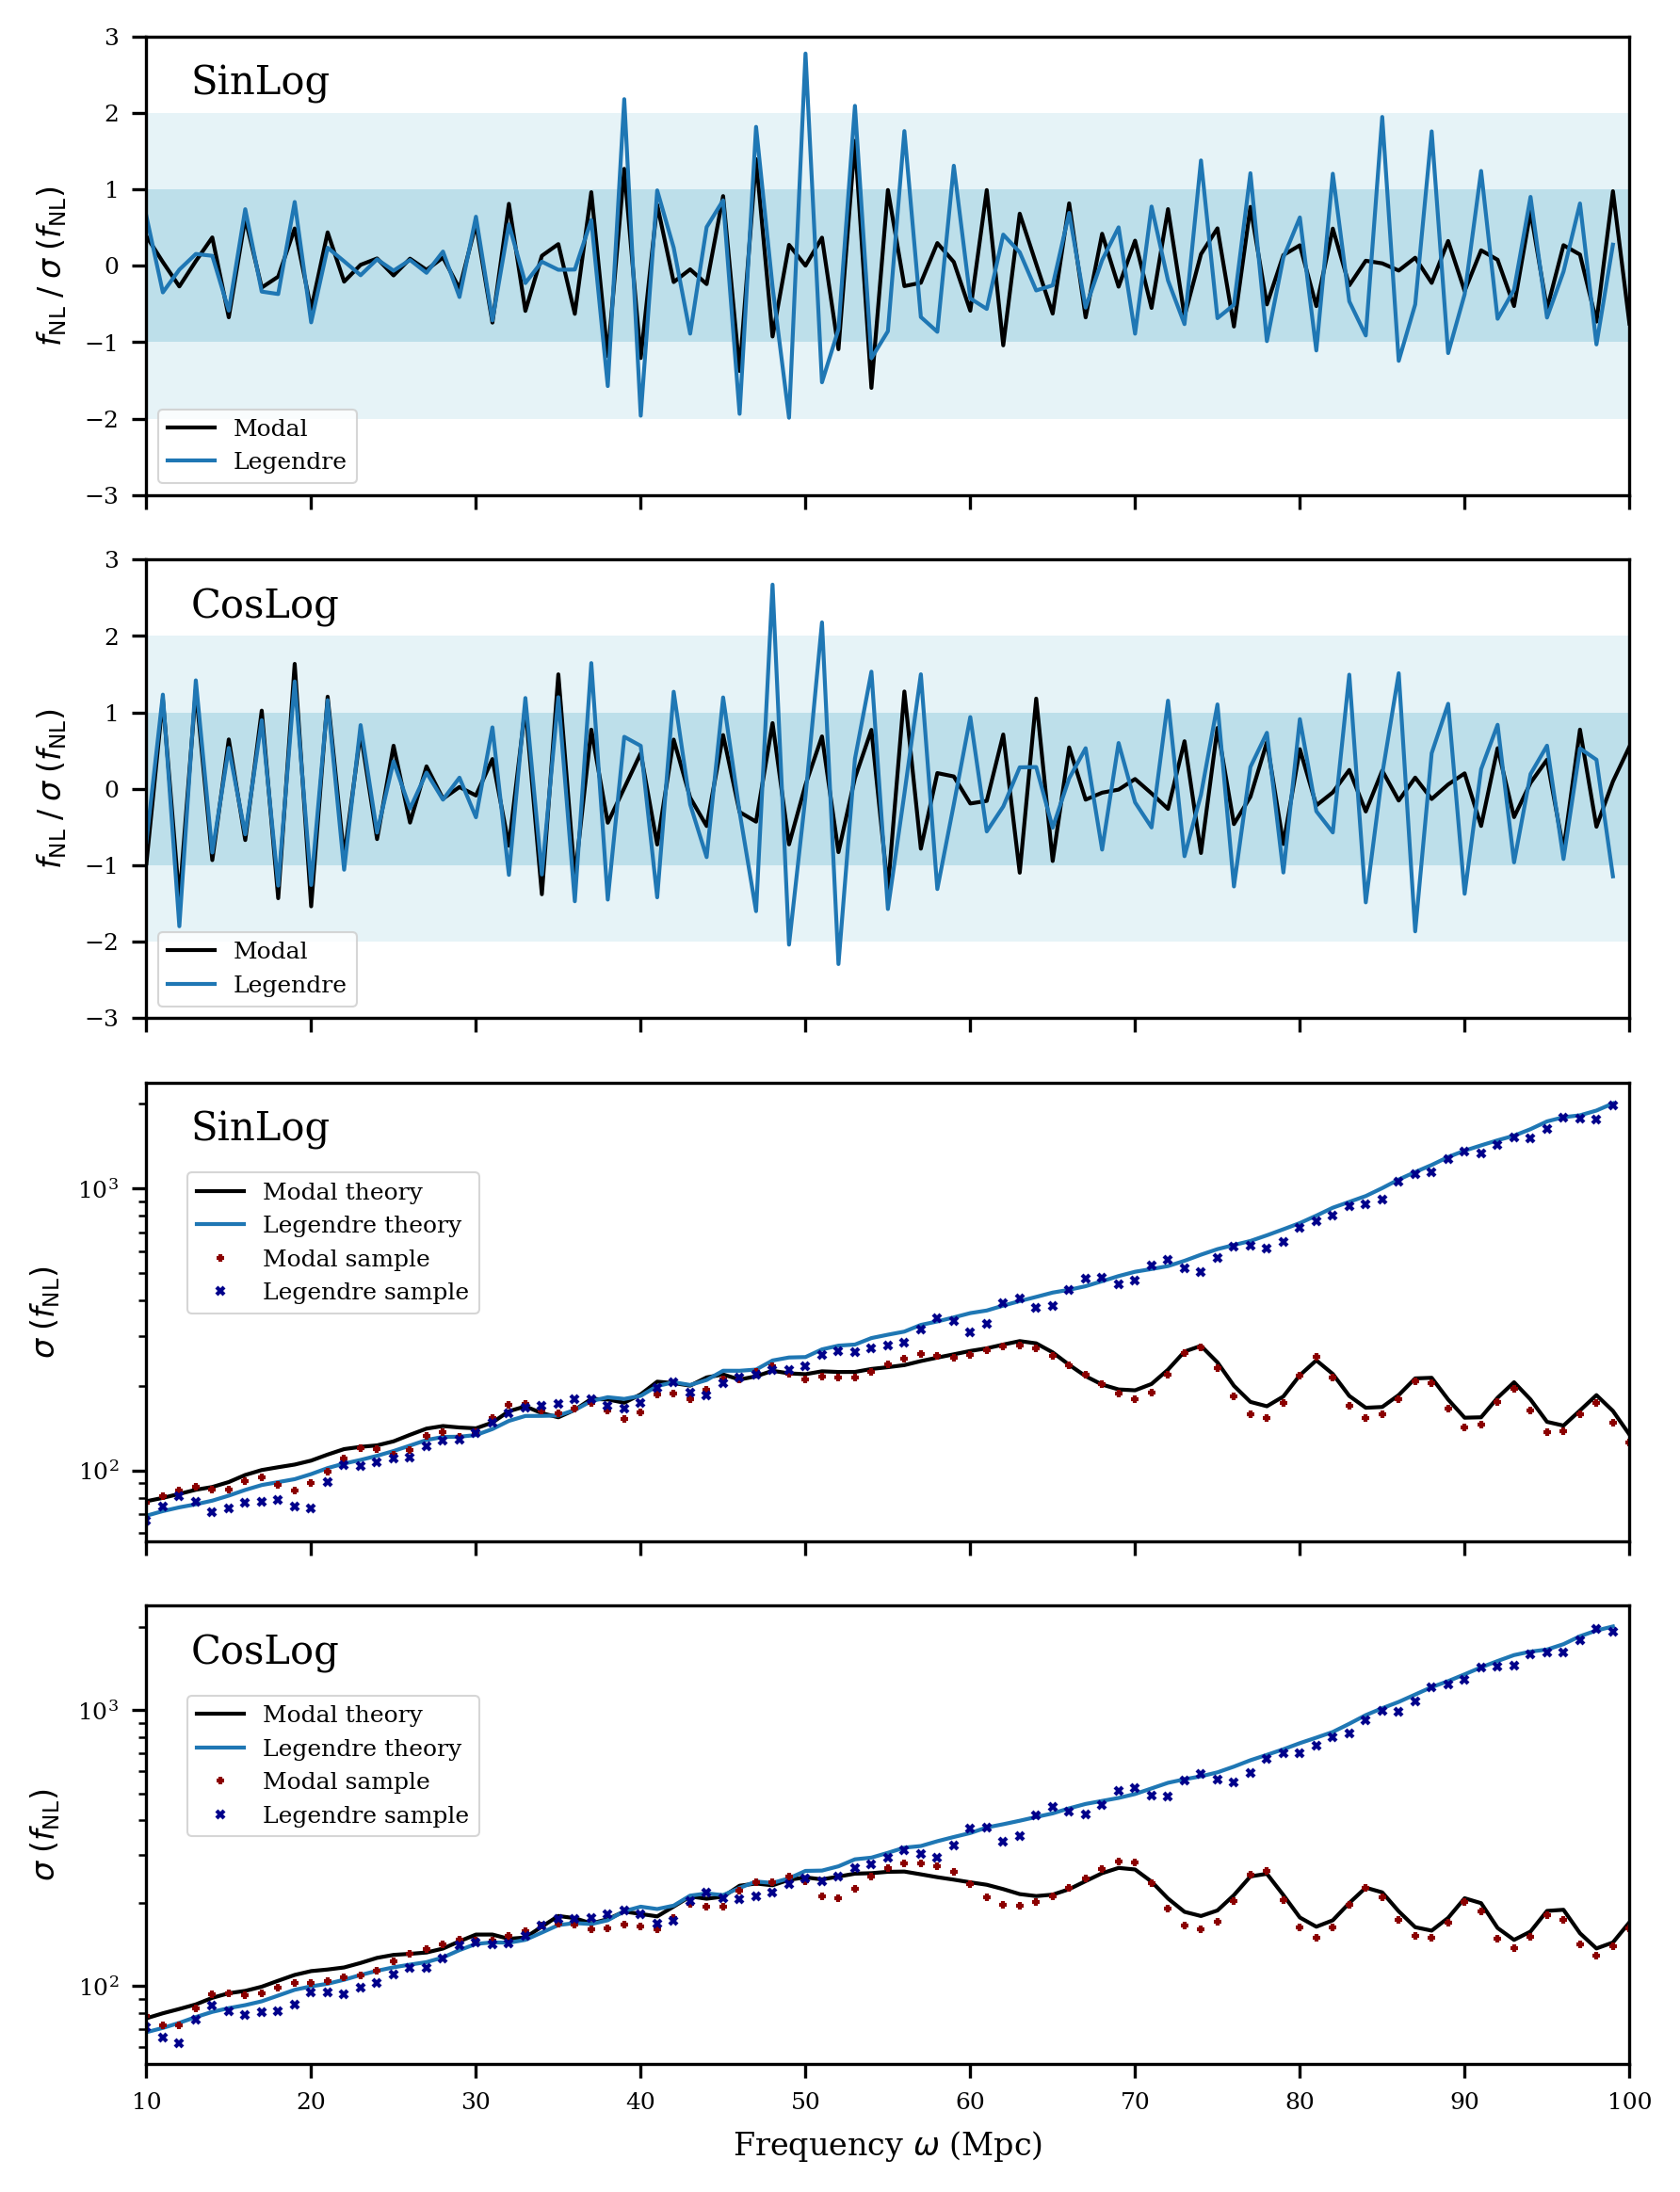

In [153]:
# NEW: fNL vs frequency plots for resonance-type templates

shapes = ['Sin_log', 'Cos_log']
fig, axs = plt.subplots(4, 1, figsize=(fig_width_in,fig_width_in*0.65*2), sharex=True, dpi=300)


for i, shape in enumerate(shapes):
    if shape[:3] == 'Sin':
        sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                            & (df["template_p2"] == 0)]
        ax1, ax2 = axs[0], axs[2]
    elif shape[:3] == 'Cos':
        tmpl = 'Sin' + shape[3:]
        sub_df = df.loc[(df["template"] == tmpl) & (df["map_number"] == 0)
                            & (df["template_p2"].isin([5,90]))]
        ax1, ax2 = axs[1], axs[3]
        
    sub_df = sub_df.sort_values(["pipeline", "template_p1"])
    L_freq_range = sub_df[sub_df["pipeline"] == "Legendre"].template_p1.unique()
    M_freq_range = sub_df[sub_df["pipeline"] == "Modal"].template_p1.unique()
    L_fNL = sub_df.loc[sub_df["pipeline"] == "Legendre", "fNL_T"]
    M_fNL = sub_df.loc[sub_df["pipeline"] == "Modal", "fNL_T"]
    L_sig = sub_df.loc[sub_df["pipeline"] == "Legendre", "sigma_T"]
    M_sig = sub_df.loc[sub_df["pipeline"] == "Modal", "sigma_T"]
    L_std = sub_df.loc[sub_df["pipeline"] == "Legendre", "stdev_T"]
    M_std = sub_df.loc[sub_df["pipeline"] == "Modal", "stdev_T"]

    full_range=np.array([10,100])
    ones = np.ones_like(full_range)

    ax1.fill_between(full_range, -ones, ones, alpha=0.7, lw=0, color='lightblue')
    ax1.fill_between(full_range, -2 * ones, 2 * ones, alpha=0.3, lw=0, color='lightblue')
    ax1.plot(M_freq_range, M_fNL/M_std, '-k', lw=1, label="Modal")
    ax1.plot(L_freq_range, L_fNL/L_std, '-', lw=1, label="Legendre")
    ax1.set_ylabel(r'$f_\mathrm{NL} \;/\; \sigma \; (f_\mathrm{NL})$')
    if shape[:3] == 'Sin':
        ax1.annotate("SinLog", xy=(0.03,0.94), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    else:
        ax1.annotate("CosLog", xy=(0.03,0.94), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    #ax1.set_xlabel(r'Frequency $\omega$ (Mpc)')
    ax1.set
    ax1.set_xlim([full_range[0], full_range[-1]])
    ax1.set_ylim([-3,3])
    leg = ax1.legend(loc="lower left")
    leg.get_frame().set_linewidth(0.5)

    #'''
    ax2.plot(M_freq_range, M_sig, '-k', lw=1, label="Modal theory")
    ax2.plot(L_freq_range, L_sig, '-', lw=1, c='tab:blue', label="Legendre theory")
    ax2.plot(M_freq_range, M_std, '+', ms=2, c='darkred', label="Modal sample")
    ax2.plot(L_freq_range, L_std, 'x', ms=2, c='darkblue', label="Legendre sample")
    #'''
    '''
    axs[1,i].plot(M_freq_range, M_std, '-k', label="Modal")
    axs[1,i].plot(L_freq_range, L_std, '-', c='tab:blue', label="Legendre")
    '''
    ax2.set_ylabel(r'$\sigma \; (f_\mathrm{NL})$')
    if shape[:3] == 'Sin':
        ax2.annotate("SinLog", xy=(0.03,0.94), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    else:
        ax2.annotate("CosLog", xy=(0.03,0.94), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')

    #ax2.set_xlabel(r'Frequency $\omega$ (Mpc)')
    ax2.set_yscale('log')
    ax2.set_xlim([full_range[0], full_range[-1]])
    #ax2.set_ylim([50,2100])
    leg = ax2.legend(loc='center left', bbox_to_anchor=(0.02, 0.65), frameon=True)
    leg.get_frame().set_linewidth(0.5)
    
axs[-1].set_xlabel(r'Frequency $\omega$ (Mpc)')

plt.tight_layout()
plt.savefig("thesis_plots/sinlog_template_frequency_Legendre_Modal.pdf")


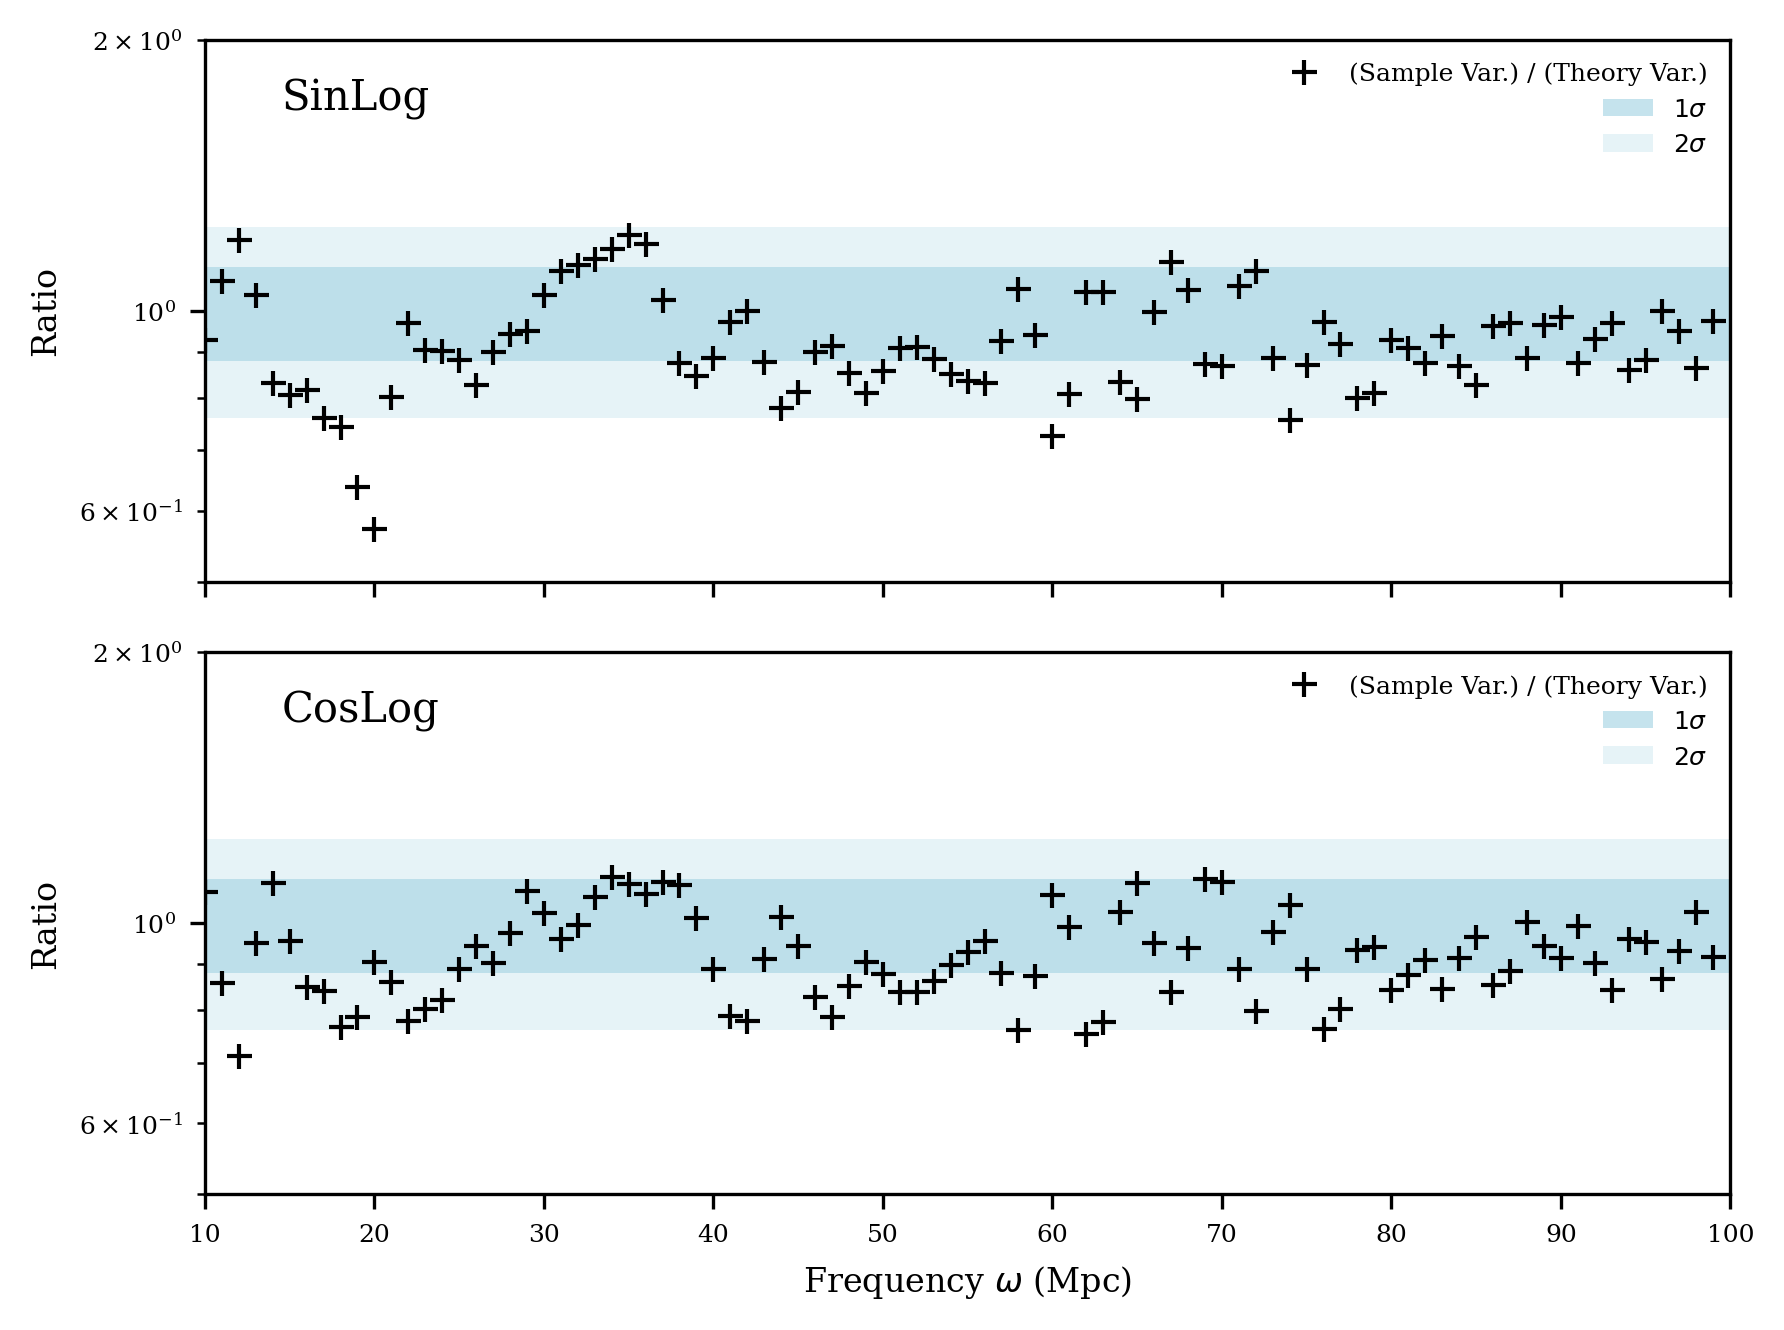

In [162]:
# fNL vs frequency plots for resonance-type templates

shapes = ['Sin_log', 'Cos_log']
fig, axs = plt.subplots(2, 1, figsize=(fig_width_in,fig_width_in*0.75), sharex=True, dpi=300)
N_MAPS = 140

for i, shape in enumerate(shapes):
    if shape[:3] == 'Sin':
        sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                            & (df["template_p2"] == 0)]
        ax = axs[0]
    elif shape[:3] == 'Cos':
        tmpl = 'Sin' + shape[3:]
        sub_df = df.loc[(df["template"] == tmpl) & (df["map_number"] == 0)
                            & (df["template_p2"].isin([5,90]))]
        ax = axs[1]
    sub_df = sub_df.sort_values(["pipeline", "template_p1"])
    L_freq_range = sub_df[sub_df["pipeline"] == "Legendre"].template_p1.unique()
    full_range = np.array([10,100])
    L_sig = sub_df.loc[sub_df["pipeline"] == "Legendre", "sigma_T"].to_numpy()
    L_std = sub_df.loc[sub_df["pipeline"] == "Legendre", "stdev_T"].to_numpy()
    
    th_var = L_sig ** 2
    spl_var = L_std ** 2
    std_var = np.sqrt(2 / N_MAPS) * th_var    # Standard deviation of the sample variance estimator
    sigma = np.sqrt(2 / N_MAPS)
    ones = np.ones_like(full_range)
    
#    axs[i].fill_between(L_freq_range, th_var - std_var, th_var + std_var, alpha=0.7, color='lightblue')
#    axs[i].fill_between(L_freq_range, th_var - 2*std_var, th_var + 2*std_var, alpha=0.3, color='lightblue')
#    axs[i].plot(L_freq_range, th_var, '-', c='darkblue', label="Theory")
#    axs[i].plot(L_freq_range, spl_var, '+', c='k', label="Sample")

    #ax.fill_between(L_freq_range, 1 - std_var/th_var, 1 + std_var/th_var, alpha=0.7, lw=0, color='lightblue')
    #ax.fill_between(L_freq_range, 1 - 2*std_var/th_var, 1 + 2*std_var/th_var, alpha=0.3, lw=0, color='lightblue')
    ax.fill_between(full_range, (1 - sigma)*ones, (1 + sigma)*ones, alpha=0.7, lw=0, color='lightblue', label=r"$1\sigma$")
    ax.fill_between(full_range, (1 - 2*sigma)*ones, (1 + 2*sigma)*ones, alpha=0.3, lw=0, color='lightblue', label=r"$2\sigma$")
    ax.plot(L_freq_range, spl_var/th_var, '+', c='k', label="(Sample Var.) / (Theory Var.)")
    
    if shape[:3] == 'Sin':
#        axs[i].set_ylabel(r'$(\sigma^{\;SinLog})^2$', fontsize=15)
        ax.set_ylabel(r'Ratio')
        ax.annotate("SinLog", xy=(0.05,0.93), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    else:
#        axs[i].set_ylabel(r'$(\sigma^{\;CosLog})^2$', fontsize=15)
        ax.set_ylabel(r'Ratio')
        ax.annotate("CosLog", xy=(0.05,0.93), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    ax.set_xlim([10,100])
    ax.set_ylim([0.5,2.0])
    ax.set_yscale('log')
    leg = axs[i].legend(loc='upper right', frameon=False)
    
    # hack to right-align the legend entries
    vp = leg._legend_box._children[-1]._children[0]
    #for c in vp._children:
    #    c._children.reverse()
    vp.align="right"    

axs[-1].set_xlabel(r'Frequency $\omega$ (Mpc)')  
plt.tight_layout()
plt.savefig("thesis_plots/sinlog_template_frequency_variances_Legendre.pdf")

Some consistency checks for oscillatory models: sample standard deviation versus theoretical (Fisher).

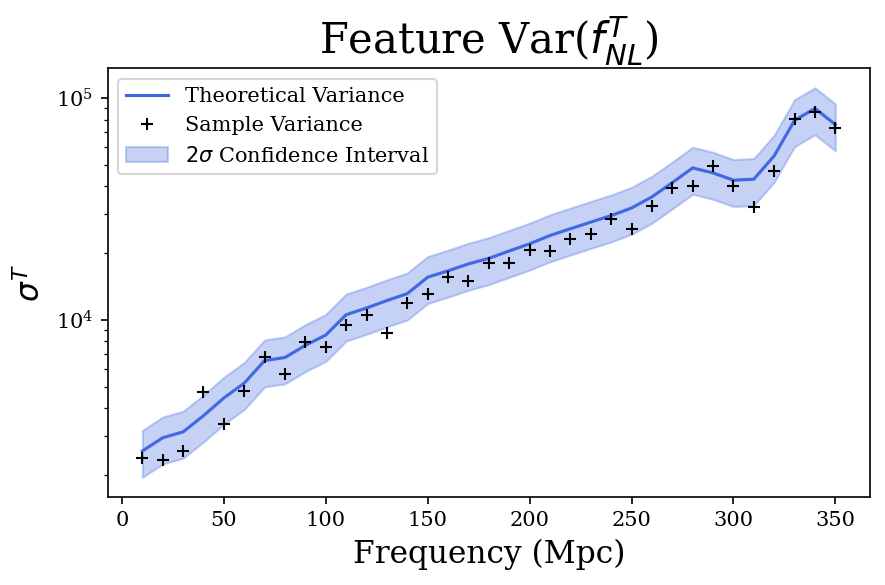

In [15]:
# fNL variance vs frequency plots
freq_range = np.arange(10, 360, 10)
shape = 'Feature'
N_MAPS = 140

sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                    & (df["template_p1"].isin(freq_range)) & (df["template_p2"] == 0)
                    & (df["pipeline"] == "Legendre")]
sub_df.sort_values(["template_p1"])

th_var = sub_df["sigma_T"] ** 2
spl_var = sub_df["stdev_T"] ** 2
std_var = np.sqrt(2 / N_MAPS) * th_var    # Standard deviation of the sample variance estimator
upper = th_var + 2 * std_var
lower = th_var - 2 * std_var

fig, axs = plt.subplots(dpi=150)
axs.plot(freq_range, th_var, 'royalblue', label=r"Theoretical Variance")
axs.fill_between(freq_range, lower, upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
axs.plot(freq_range, spl_var, '+k', label=r"Sample Variance")
#axs.errorbar(freq_range, spl_var, yerr=std_var, fmt='o', label=r"Sample Variance")
axs.set_yscale("log")
axs.set_ylabel(r'$\sigma^T$', fontsize=15)
axs.set_xlabel('Frequency (Mpc)', fontsize=15)
axs.legend()
axs.set_title(shape + r' Var($f_{NL}^T$)', fontsize=20)


plt.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")

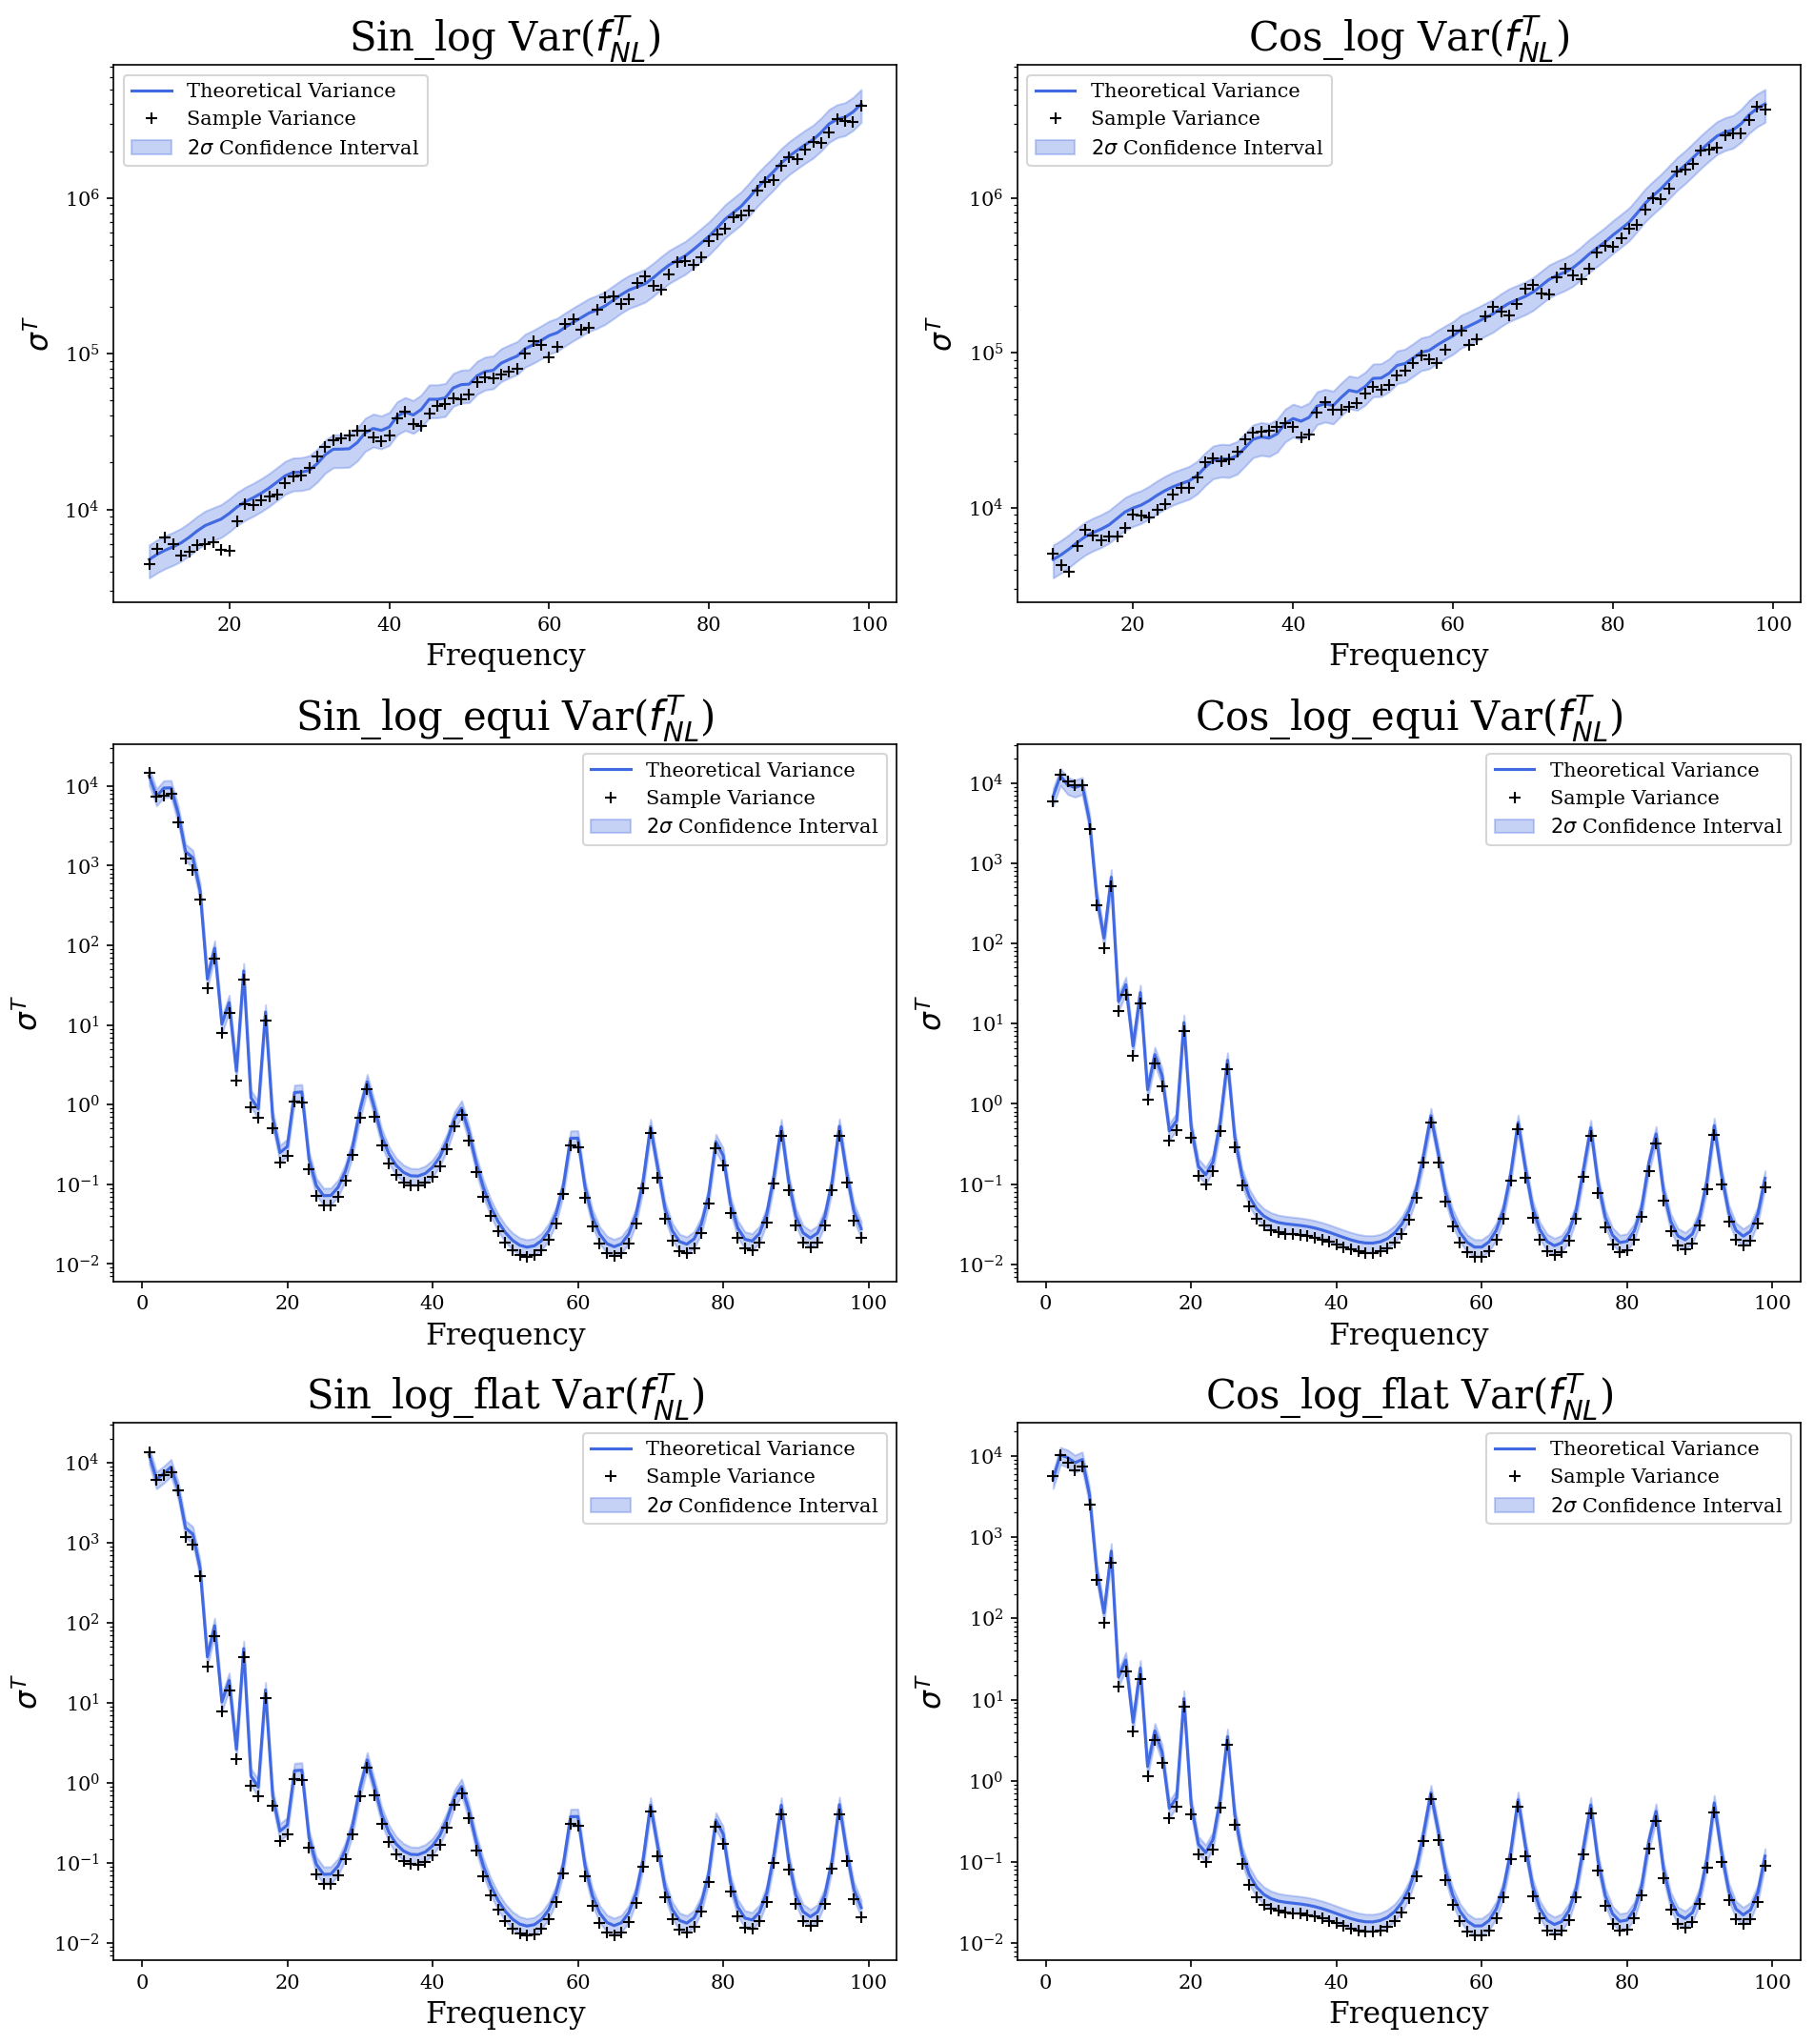

In [16]:
# fNL varinace vs frequency plots for resonance-type models
shapes = ['Sin_log', 'Sin_log_equi', 'Sin_log_flat']
N_MAPS = 140

fig, axs = plt.subplots(len(shapes), 2, figsize=(6.4*2, 4.8*len(shapes)), dpi=150)

for i, shape in enumerate(shapes):
    sub_df = df.loc[(df["template"] == shape) & (df["map_number"] == 0)
                        & (df["template_p2"].isin([0,90]))
                        & (df["pipeline"] == "Legendre")]
    sub_df = sub_df.sort_values(["template_p1"])
    freq_range = sub_df.template_p1.unique()
    sin_df = sub_df[sub_df["template_p2"] == 0]
    cos_df = sub_df[sub_df["template_p2"] == 90]

    sin_th_var = sin_df["sigma_T"] ** 2
    sin_spl_var = sin_df["stdev_T"] ** 2
    sin_std_var = np.sqrt(2 / N_MAPS) * sin_th_var    # Standard deviation of the sample variance estimator
    sin_upper = sin_th_var + 2 * sin_std_var
    sin_lower = sin_th_var - 2 * sin_std_var
    
    cos_th_var = cos_df["sigma_T"] ** 2
    cos_spl_var = cos_df["stdev_T"] ** 2
    cos_std_var = np.sqrt(2 / N_MAPS) * cos_th_var    # Standard deviation of the sample variance estimator
    cos_upper = cos_th_var + 2 * cos_std_var
    cos_lower = cos_th_var - 2 * cos_std_var

    axs[i,0].plot(freq_range, sin_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,0].fill_between(freq_range, sin_lower, sin_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,0].plot(freq_range, sin_spl_var, '+k', label=r"Sample Variance")
    axs[i,0].set_yscale("log")
    axs[i,0].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,0].set_xlabel('Frequency', fontsize=15)
    axs[i,0].legend()
    axs[i,0].set_title(shape + r' Var($f_{NL}^T$)', fontsize=20)
    
    axs[i,1].plot(freq_range, cos_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,1].fill_between(freq_range, cos_lower, cos_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,1].plot(freq_range, cos_spl_var, '+k', label=r"Sample Variance")
    axs[i,1].set_yscale("log")
    axs[i,1].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,1].set_xlabel('Frequency', fontsize=15)
    axs[i,1].legend()
    axs[i,1].set_title('Cos' + shape[3:] + r' Var($f_{NL}^T$)', fontsize=20)


plt.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")

In BEst it's straightforward to compute the fNL contribution coming from each point $r$ of the line of sight integral $f_{NL}= \int f_{NL}(r) \ dr$. Here we plot $f_{NL}(r)$ for the standard templates. 

-6.285785818698454
-14.2105386180566
30.75078057060503


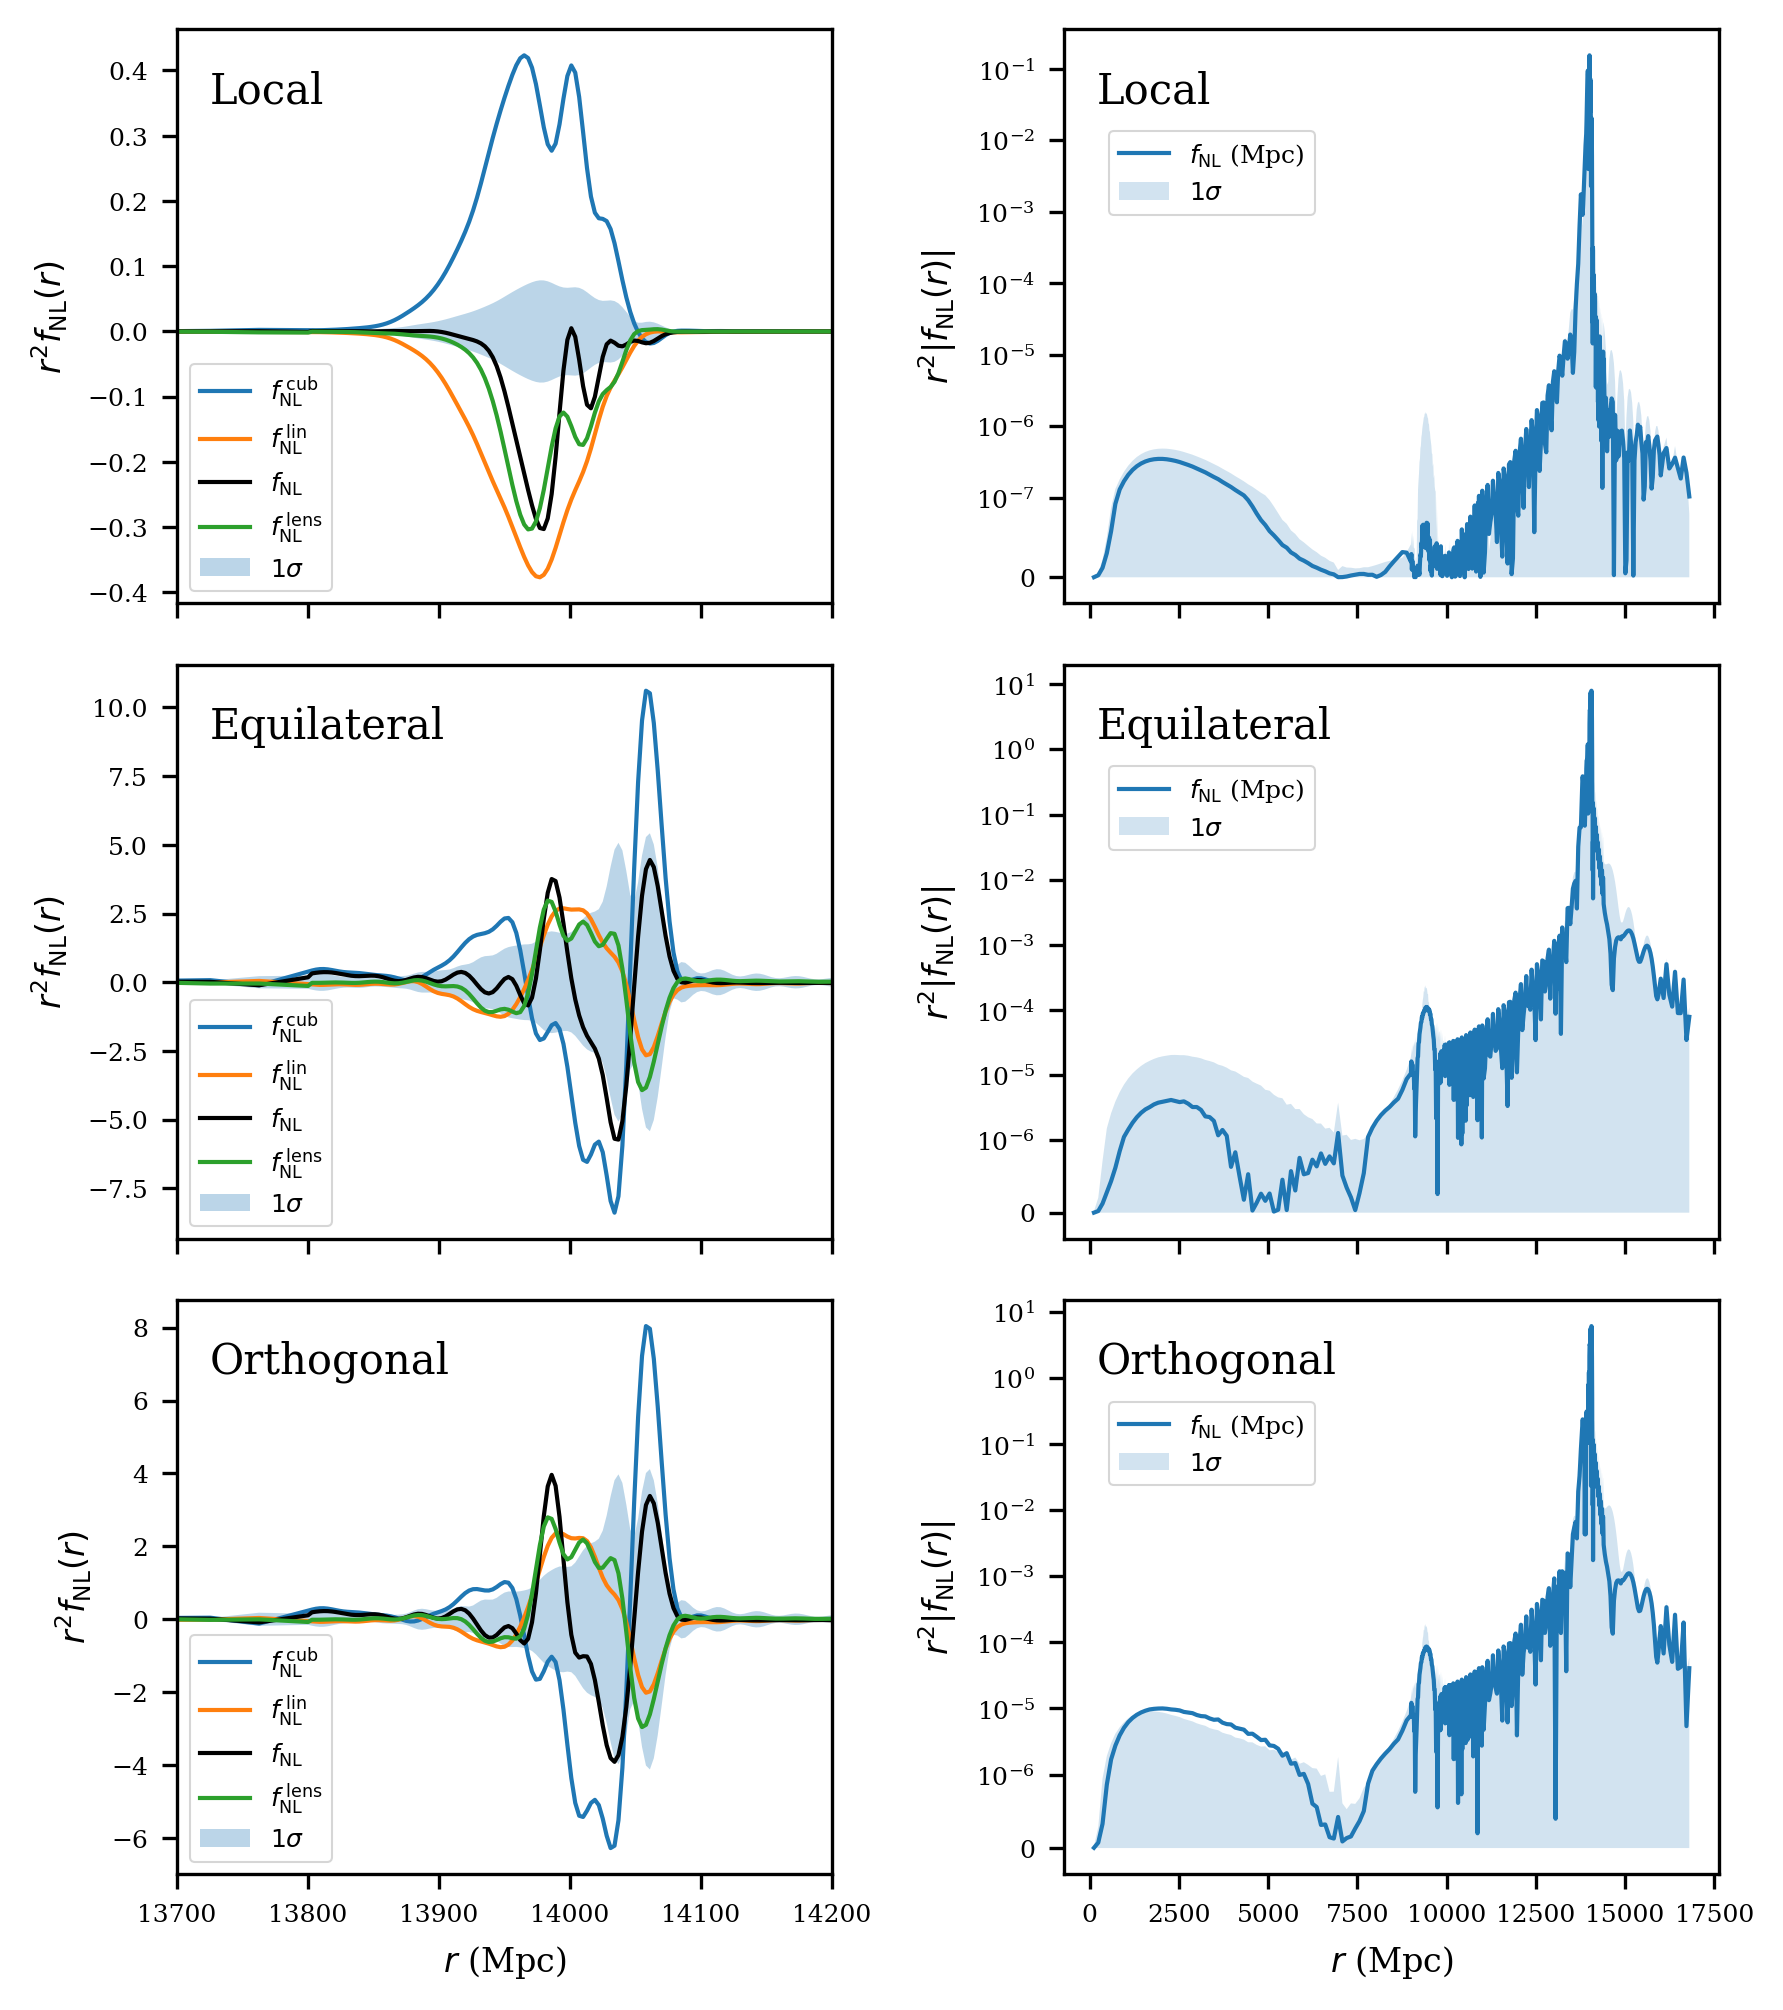

In [203]:
# fNL versus r plots.
from scipy import integrate

df_r = pd.read_csv("data/trio_r_dependence.txt", delimiter="\t")
df_ISW_r = pd.read_csv("data/trio_r_dependence_ISW.txt", delimiter="\t")
shapes = ["Local", "Equilateral", "Orthogonal"]
symlog_threshs = [1e-7, 1e-6, 1e-6]
f_sky = 0.77942    # Planck f_sky_T
fig, axs = plt.subplots(3, 2, figsize=(fig_width_in,fig_width_in*0.75*1.5), sharex='col', dpi=300)

for i, shape in enumerate(shapes):
    sub_df_r = df_r[df_r["template"] == shape]
    sub_df_ISW_r = df_ISW_r[df_ISW_r["template"] == shape]
    sub_df_r.sort_values(["r_grid_pt"])
    sub_df_ISW_r.sort_values(["r_grid_pt"])

    R = sub_df_r["r_grid_pt"]
    C = sub_df_r["fNL_cub_T"]
    L = sub_df_r["fNL_lin_T"]
    F = sub_df_r["fNL_T"].to_numpy()
    S = sub_df_r["stdev_T"]
    I = sub_df_ISW_r["ISW_bias_T"].mul(f_sky).to_numpy()
    
    print(integrate.trapz(R, F))
    
    axs[i,0].plot(R, C, "-", lw=1, label=r"$f_\mathrm{NL}^{\;\mathrm{cub}}$")
    axs[i,0].plot(R, -3*L, "-", lw=1, label=r"$f_\mathrm{NL}^{\;\mathrm{lin}}$")
    axs[i,0].plot(R, F-I, "-k", lw=1, label=r"$f_\mathrm{NL}$")
    axs[i,0].plot(R, -I, "-", lw=1, label=r"$f_\mathrm{NL}^{\;\mathrm{lens}}$")
    #axs[i,0].fill_between(R, F-S, F+S, alpha=0.3, label=r"$1\sigma$")
    axs[i,0].fill_between(R, -S, S, alpha=0.3, label=r"$1\sigma$")
    
    axs[i,0].set_ylabel(r"$r^2 f_\mathrm{NL}(r)$")
    #axs[i,0].set_xlabel(r"$r$")
    axs[i,0].set_xlim([13700,14200])
    leg = axs[i,0].legend(loc="lower left", ncol=1)
    leg.get_frame().set_linewidth(0.5)
    axs[i,0].annotate(shape, xy=(0.05,0.93), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    
    # Log plot
    lower = np.minimum(np.abs(F-S), np.abs(F+S))
    upper = np.maximum(np.abs(F-S), np.abs(F+S))
    lower[(F-S < 0) & (F+S > 0)] = 0
    
    axs[i,1].plot(R, np.abs(F), "-", lw=1, label=r"$f_\mathrm{NL}$ (Mpc)")
    #axs[i,1].fill_between(R, lower, upper, alpha=0.2, label=r"$1\sigma$")
    #axs[i,1].fill_between(R, 0, upper, alpha=0.2, lw=0, label=r"$1\sigma$")
    axs[i,1].fill_between(R, 0, S, alpha=0.2, label=r"$1\sigma$")
    
    axs[i,1].set_ylabel(r"$r^2 |f_\mathrm{NL}(r)|$")
    axs[i,1].set_yscale('symlog', linthreshy=symlog_threshs[i])
    #axs[i,1].set_yscale('log')
    #axs[i,1].set_xlabel(r"$r$")
    leg = axs[i,1].legend(loc="center left", bbox_to_anchor=(0.05, 0.75), frameon=True)
    leg.get_frame().set_linewidth(0.5)
    axs[i,1].annotate(shape, xy=(0.05,0.93), xycoords="axes fraction", fontsize=10,
                          horizontalalignment='left', verticalalignment='top')
    
axs[-1,0].set_xlabel(r"$r$ (Mpc)")
axs[-1,1].set_xlabel(r"$r$ (Mpc)")
plt.tight_layout()
plt.savefig("thesis_plots/trio_r_dependence.pdf")
#plt.show()


In [18]:
df_r.sort_values(["r_grid_pt", "template"]).head(30)

template  template_p1  template_p2  r_grid_pt         fNL_T  \
1120  Equilateral          NaN          NaN      120.0 -5.481547e-10   
0           Local          NaN          NaN      120.0 -1.270883e-10   
560    Orthogonal          NaN          NaN      120.0  3.981480e-09   
1121  Equilateral          NaN          NaN      240.0 -2.288967e-08   
1           Local          NaN          NaN      240.0 -2.593344e-09   
561    Orthogonal          NaN          NaN      240.0  7.450590e-08   
1122  Equilateral          NaN          NaN      360.0 -1.260825e-07   
2           Local          NaN          NaN      360.0 -1.193002e-08   
562    Orthogonal          NaN          NaN      360.0  3.303982e-07   
1123  Equilateral          NaN          NaN      480.0 -2.792004e-07   
3           Local          NaN          NaN      480.0 -3.037171e-08   
563    Orthogonal          NaN          NaN      480.0  8.631643e-07   
1124  Equilateral          NaN          NaN      600.0 -4.361966e-07   
4           Local          NaN          NaN      600.0 -5.804201e-08   
564    Orthogonal          NaN          NaN      600.0  1.695836e-06   
1125  Equilateral          NaN          NaN      720.0 -6.216777e-07   
5           Local          NaN          NaN      720.0 -9.253606e-08   
565    Orthogonal          NaN          NaN      720.0  2.747152e-06   
1126  Equilateral          NaN          NaN      840.0 -8.493531e-07   
6           Local          NaN          NaN      840.0 -1.307047e-07   
566    Orthogonal          NaN          NaN      840.0  3.911209e-06   
1127  Equilateral          NaN          NaN      960.0 -1.125233e-06   
7           Local          NaN          NaN      960.0 -1.704509e-07   
567    Orthogonal          NaN          NaN      960.0  5.093620e-06   
1128  Equilateral          NaN          NaN     1080.0 -1.459923e-06   
8           Local          NaN          NaN     1080.0 -2.093603e-07   
568    Orthogonal          NaN          NaN     1080.0  6.206252e-06   
1129  Equilateral          NaN          NaN     1200.0 -1.855018e-06   
9           Local          NaN          NaN     1200.0 -2.450739e-07   
569    Orthogonal          NaN          NaN     1200.0  7.180718e-06   

         fNL_cub_T     fNL_lin_T       stdev_T  
1120 -1.620153e-09 -3.573326e-10  2.078254e-08  
0    -8.221668e-11  1.495721e-11  4.251500e-10  
560   1.941404e-09 -6.800254e-10  2.642718e-08  
1121 -2.714531e-08 -1.418546e-09  2.061454e-07  
1    -2.053027e-09  1.801058e-10  5.935368e-09  
561   5.866820e-08 -5.279235e-09  2.882576e-07  
1122 -1.294240e-07 -1.113821e-09  7.152597e-07  
2    -1.017078e-08  5.864148e-10  2.215693e-08  
562   2.993312e-07 -1.035569e-08  9.471990e-07  
1123 -2.681398e-07  3.686878e-09  1.525232e-06  
3    -2.669288e-08  1.226276e-09  5.011586e-08  
563   8.362678e-07 -8.965497e-09  1.906526e-06  
1124 -3.884422e-07  1.591812e-08  2.600311e-06  
4    -5.177482e-08  2.089063e-09  8.770574e-08  
564   1.700847e-06  1.670255e-09  2.990447e-06  
1125 -5.298958e-07  3.059397e-08  3.937610e-06  
5    -8.232895e-08  3.402372e-09  1.330510e-07  
565   2.788601e-06  1.381642e-08  4.155535e-06  
1126 -6.790290e-07  5.677472e-08  5.472306e-06  
6    -1.160066e-07  4.899361e-09  1.810859e-07  
566   4.016896e-06  3.522890e-08  5.188322e-06  
1127 -8.719146e-07  8.443944e-08  7.157397e-06  
7    -1.502368e-07  6.738032e-09  2.311558e-07  
567   5.261822e-06  5.606749e-08  6.171740e-06  
1128 -1.125996e-06  1.113087e-07  8.892439e-06  
8    -1.825603e-07  8.933334e-09  2.815135e-07  
568   6.428484e-06  7.407751e-08  7.097362e-06  
1129 -1.441548e-06  1.378233e-07  1.063085e-05  
9    -2.112521e-07  1.127394e-08  3.291257e-07  
569   7.453247e-06  9.084289e-08  7.857372e-06

In [19]:
df[df["pipeline"] == "Modal"].template.unique()

array(['Local', 'Equilateral', 'Orthogonal', 'DBI', 'Ghost', 'Single',
       'Constant', 'EFT1', 'Nicola', 'Nicola_sum', 'NBD', 'Flat', 'Neil1',
       'Neil2', 'Xingang', 'Warm', 'Warm_smooth', 'NBD_cos2', 'NBD_cos1',
       'NBD_sin', 'NBD_sin1', 'NBD_sin2', 'NBD_DBI', 'Feature',
       'Feature_equil', 'Feature_flat', 'Adshead', 'K*sin', 'Sin_log',
       'Sin_log_equi', 'Sin_log_flat', 'Sin_log_local', 'Exp_sin',
       'Exp_cos', 'Exp_cos_equi', 'Exp_cos_flat'], dtype=object)

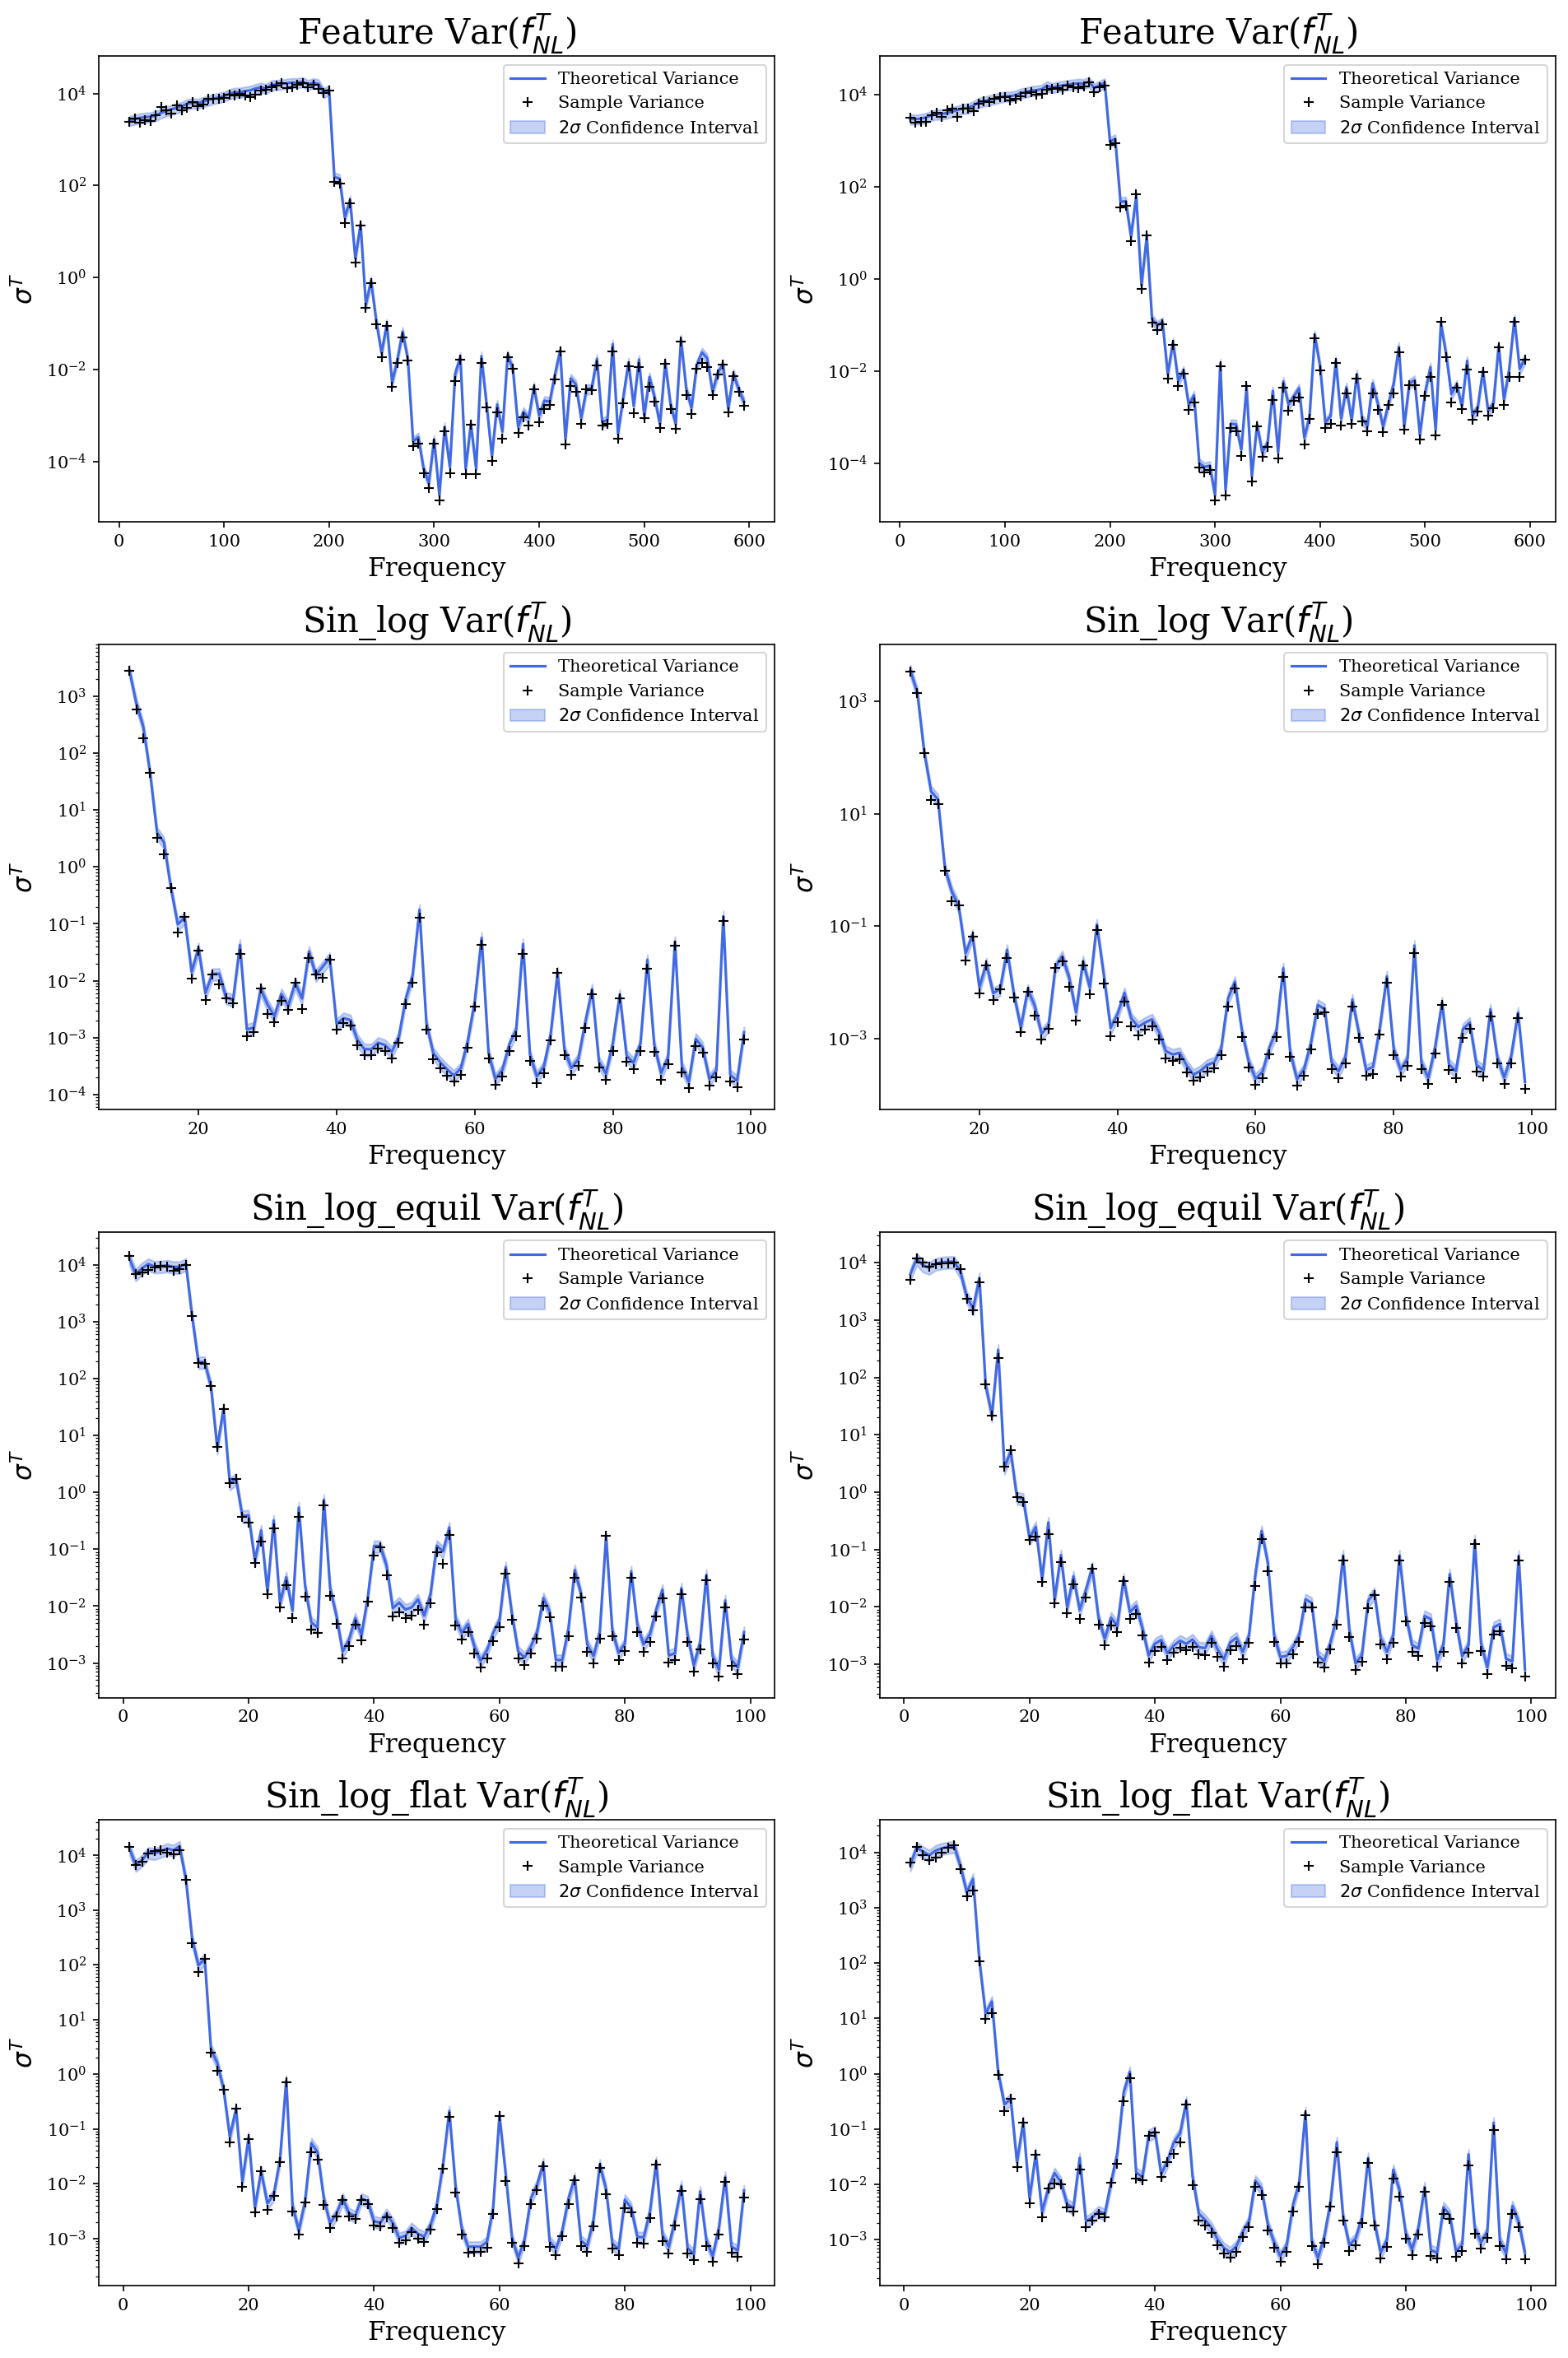

In [20]:
# fNL varinace vs frequency plots for resonance-type models
shapes = ['Feature', 'Sin_log','Sin_log_equil', 'Sin_log_flat']
N_MAPS = 140

fig, axs = plt.subplots(len(shapes), 2, figsize=(6.4*2, 4.8*len(shapes)), dpi=150)

for i, shape in enumerate(shapes):
    sub_df = df_tetra.loc[(df_tetra["template"] == shape) & (df_tetra["map_number"] == 0)
                        & (df_tetra["template_p2"].isin([0,90]))]
    sub_df = sub_df.sort_values(["template_p1"])
    freq_range = sub_df.template_p1.unique()
    sin_df = sub_df[sub_df["template_p2"] == 0]
    cos_df = sub_df[sub_df["template_p2"] == 90]

    sin_th_var = sin_df["sigma_T"] ** 2
    sin_spl_var = sin_df["stdev_T"] ** 2
    sin_std_var = np.sqrt(2 / N_MAPS) * sin_th_var    # Standard deviation of the sample variance estimator
    sin_upper = sin_th_var + 2 * sin_std_var
    sin_lower = sin_th_var - 2 * sin_std_var
    
    cos_th_var = cos_df["sigma_T"] ** 2
    cos_spl_var = cos_df["stdev_T"] ** 2
    cos_std_var = np.sqrt(2 / N_MAPS) * cos_th_var    # Standard deviation of the sample variance estimator
    cos_upper = cos_th_var + 2 * cos_std_var
    cos_lower = cos_th_var - 2 * cos_std_var

    axs[i,0].plot(freq_range, sin_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,0].fill_between(freq_range, sin_lower, sin_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,0].plot(freq_range, sin_spl_var, '+k', label=r"Sample Variance")
    axs[i,0].set_yscale("log")
    axs[i,0].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,0].set_xlabel('Frequency', fontsize=15)
    axs[i,0].legend()
    axs[i,0].set_title(shape + r' Var($f_{NL}^T$)', fontsize=20)
    
    axs[i,1].plot(freq_range, cos_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,1].fill_between(freq_range, cos_lower, cos_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,1].plot(freq_range, cos_spl_var, '+k', label=r"Sample Variance")
    axs[i,1].set_yscale("log")
    axs[i,1].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,1].set_xlabel('Frequency', fontsize=15)
    axs[i,1].legend()
    if shape[3:] == "Sin":
        shape2 = "Cos" + shape[3:]
    else:
        shape2 = shape
    axs[i,1].set_title(shape2 + r' Var($f_{NL}^T$)', fontsize=20)


plt.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")

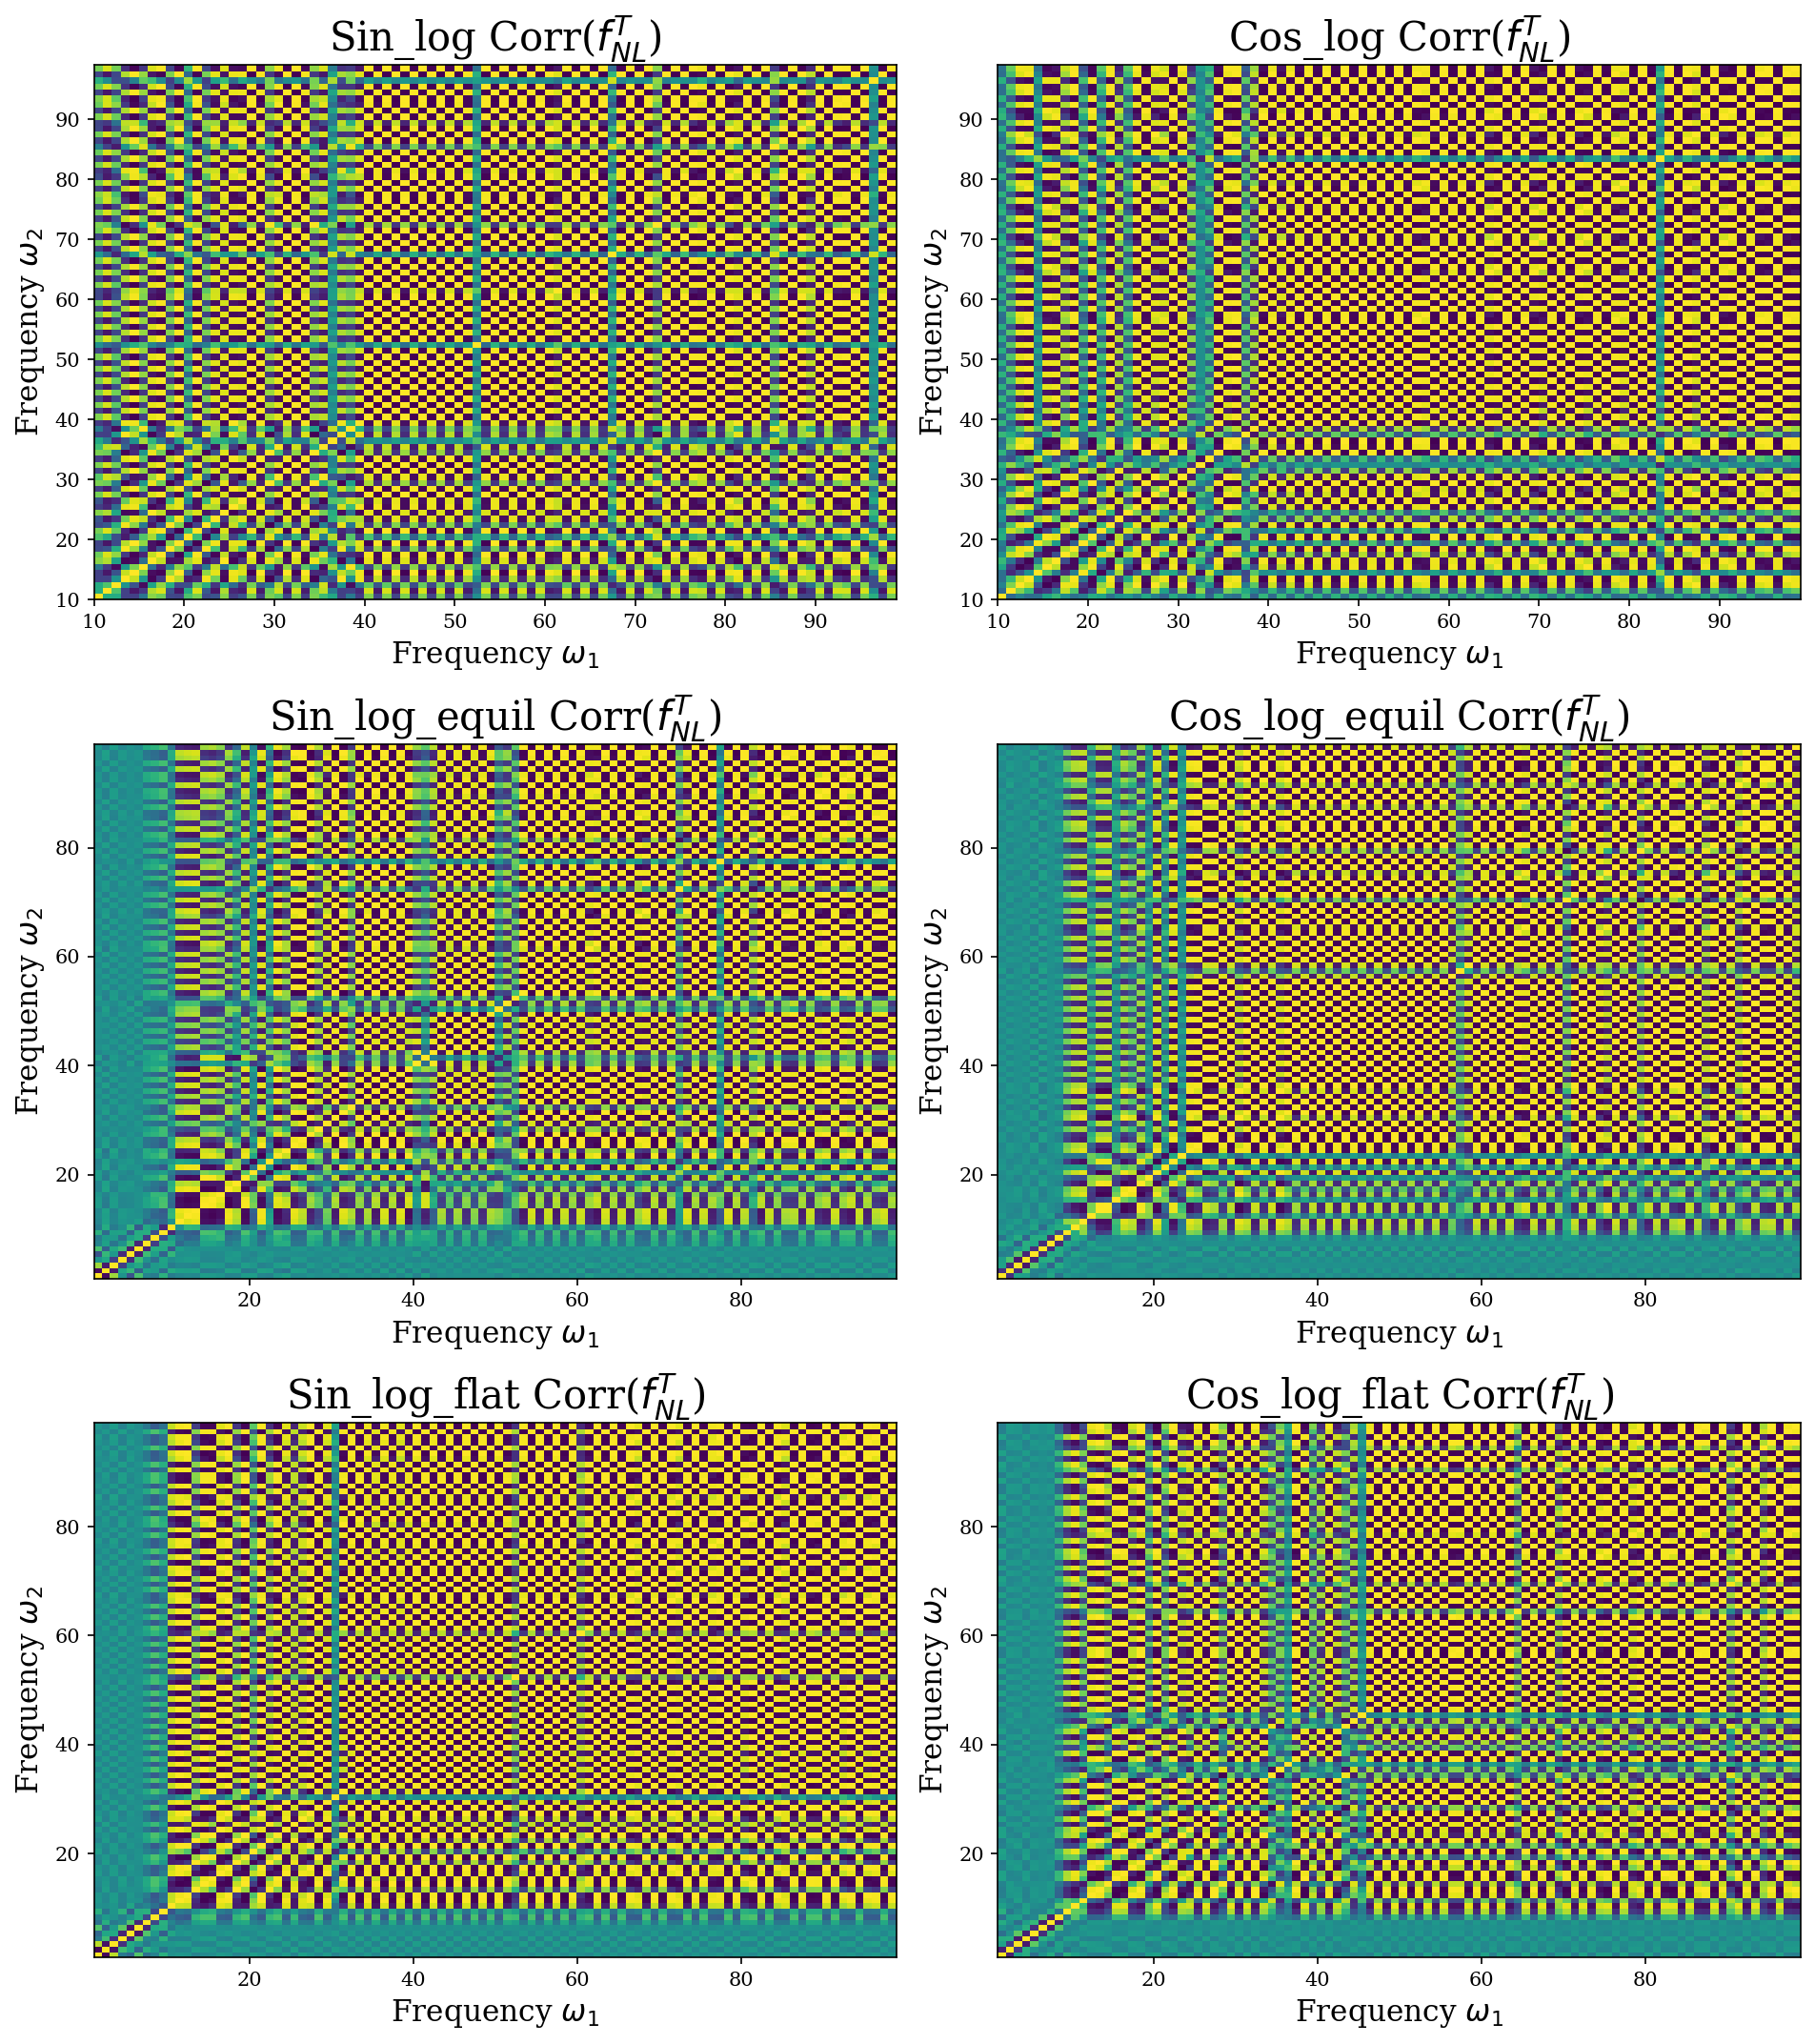

In [21]:
# fNL covariances for different frequencies in same templates
shapes = ['Sin_log','Sin_log_equil', 'Sin_log_flat']
N_MAPS = 140

def cov_to_corr(cov):
    # Covariance matrix to correlation matrix
    norms = np.sqrt(np.diag(cov))
    return cov / (norms[:,np.newaxis] * norms[np.newaxis,:])

fig, axs = plt.subplots(len(shapes), 2, figsize=(6.4*2, 4.8*len(shapes)), dpi=150)

for i, shape in enumerate(shapes):
    sub_df = df_tetra.loc[(df_tetra["template"] == shape) & (df_tetra["template_p2"].isin([0,90]))]
    sub_df = sub_df.sort_values(["template_p1", "map_number"])
    freq_range = sub_df.template_p1.unique()
    sin_df = sub_df[sub_df["template_p2"] == 0]
    cos_df = sub_df[sub_df["template_p2"] == 90]
    
    N = len(freq_range)
    sin_cov = np.zeros((N, N))
    cos_cov = np.zeros((N, N))
    
    for i1, f1 in enumerate(freq_range):
        sin_fNLs1 = sin_df.query("template_p1 == @f1")["fNL_T"].to_numpy()
        cos_fNLs1 = cos_df.query("template_p1 == @f1")["fNL_T"].to_numpy()
        for i2, f2 in enumerate(freq_range):
            sin_fNLs2 = sin_df.query("template_p1 == @f2")["fNL_T"].to_numpy()
            cos_fNLs2 = cos_df.query("template_p1 == @f2")["fNL_T"].to_numpy()
            sin_cov[i1,i2] = np.dot(sin_fNLs1, sin_fNLs2)
            cos_cov[i1,i2] = np.dot(cos_fNLs1, cos_fNLs2)
    sin_corr = cov_to_corr(sin_cov)
    cos_corr = cov_to_corr(cos_cov)
    
    axs[i,0].pcolor(freq_range, freq_range, sin_corr, vmin=-1, vmax=1)
    axs[i,0].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
    axs[i,0].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
    axs[i,0].set_title(shape + r' Corr($f_{NL}^T$)', fontsize=20)
    
    axs[i,1].pcolor(freq_range, freq_range, cos_corr, vmin=-1, vmax=1)
    axs[i,1].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
    axs[i,1].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
    axs[i,1].set_title('Cos' + shape[3:] + r' Corr($f_{NL}^T$)', fontsize=20)

plt.tight_layout()


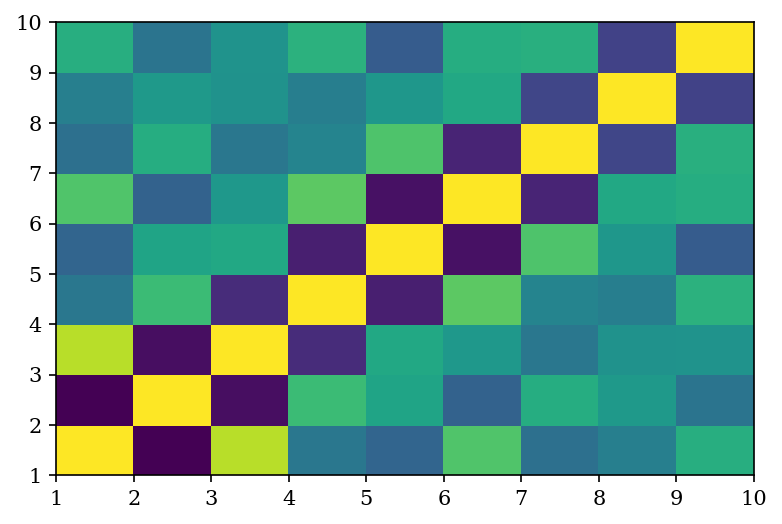

In [22]:
plt.pcolor(freq_range[:10], freq_range[:10], sin_corr[:10,:10])

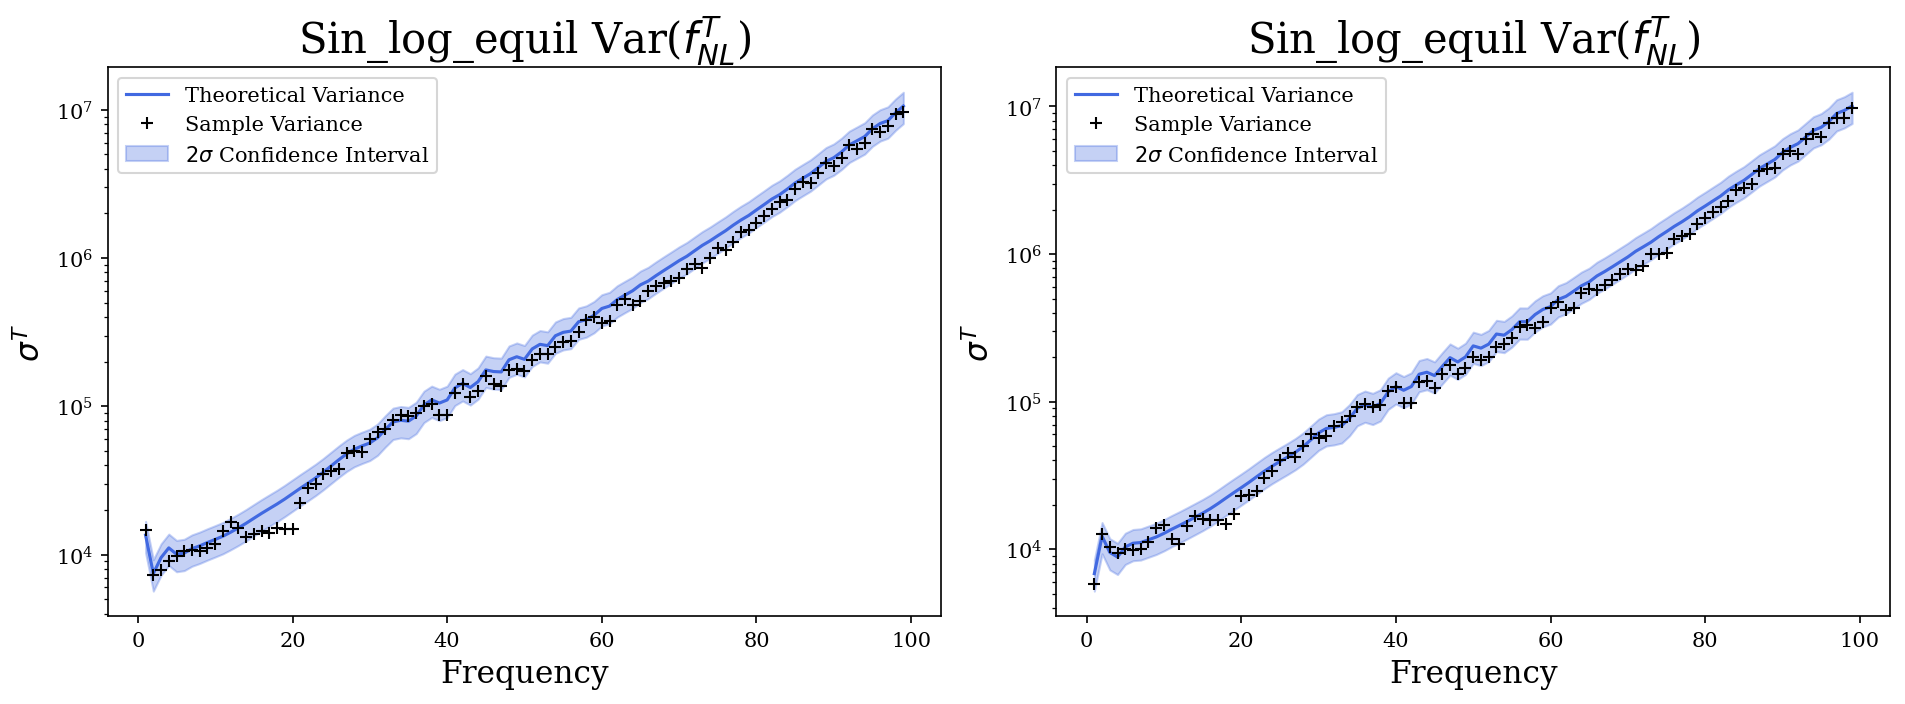

In [23]:
# fNL variance vs frequency plots for resonance-type models
# 'test_tetra' data: shape function outside the tetrapyd has been manually set to zero.
# Only works well for equilateral type templates
shapes = ['Sin_log_equil']
N_MAPS = 140

fig, axs = plt.subplots(len(shapes), 2, figsize=(6.4*2, 4.8*len(shapes)), dpi=150)
if axs.ndim == 1:
    axs = axs[np.newaxis,:]

for i, shape in enumerate(shapes):
    sub_df = df_test_tetra.loc[(df_test_tetra["template"] == shape) & (df_test_tetra["map_number"] == 0)
                        & (df_test_tetra["template_p2"].isin([0,90]))]
    sub_df = sub_df.sort_values(["template_p1"])
    freq_range = sub_df.template_p1.unique()
    sin_df = sub_df[sub_df["template_p2"] == 0]
    cos_df = sub_df[sub_df["template_p2"] == 90]

    sin_th_var = sin_df["sigma_T"] ** 2
    sin_spl_var = sin_df["stdev_T"] ** 2
    sin_std_var = np.sqrt(2 / N_MAPS) * sin_th_var    # Standard deviation of the sample variance estimator
    sin_upper = sin_th_var + 2 * sin_std_var
    sin_lower = sin_th_var - 2 * sin_std_var
    
    cos_th_var = cos_df["sigma_T"] ** 2
    cos_spl_var = cos_df["stdev_T"] ** 2
    cos_std_var = np.sqrt(2 / N_MAPS) * cos_th_var    # Standard deviation of the sample variance estimator
    cos_upper = cos_th_var + 2 * cos_std_var
    cos_lower = cos_th_var - 2 * cos_std_var

    axs[i,0].plot(freq_range, sin_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,0].fill_between(freq_range, sin_lower, sin_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,0].plot(freq_range, sin_spl_var, '+k', label=r"Sample Variance")
    axs[i,0].set_yscale("log")
    axs[i,0].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,0].set_xlabel('Frequency', fontsize=15)
    axs[i,0].legend()
    axs[i,0].set_title(shape + r' Var($f_{NL}^T$)', fontsize=20)
    
    axs[i,1].plot(freq_range, cos_th_var, 'royalblue', label=r"Theoretical Variance")
    axs[i,1].fill_between(freq_range, cos_lower, cos_upper, color='royalblue', alpha=0.3, label=r"$2\sigma$ Confidence Interval")
    axs[i,1].plot(freq_range, cos_spl_var, '+k', label=r"Sample Variance")
    axs[i,1].set_yscale("log")
    axs[i,1].set_ylabel(r'$\sigma^T$', fontsize=15)
    axs[i,1].set_xlabel('Frequency', fontsize=15)
    axs[i,1].legend()
    if shape[3:] == "Sin":
        shape2 = "Cos" + shape[3:]
    else:
        shape2 = shape
    axs[i,1].set_title(shape2 + r' Var($f_{NL}^T$)', fontsize=20)


plt.tight_layout()
#plt.savefig("plots/full_trio_correlations.png")

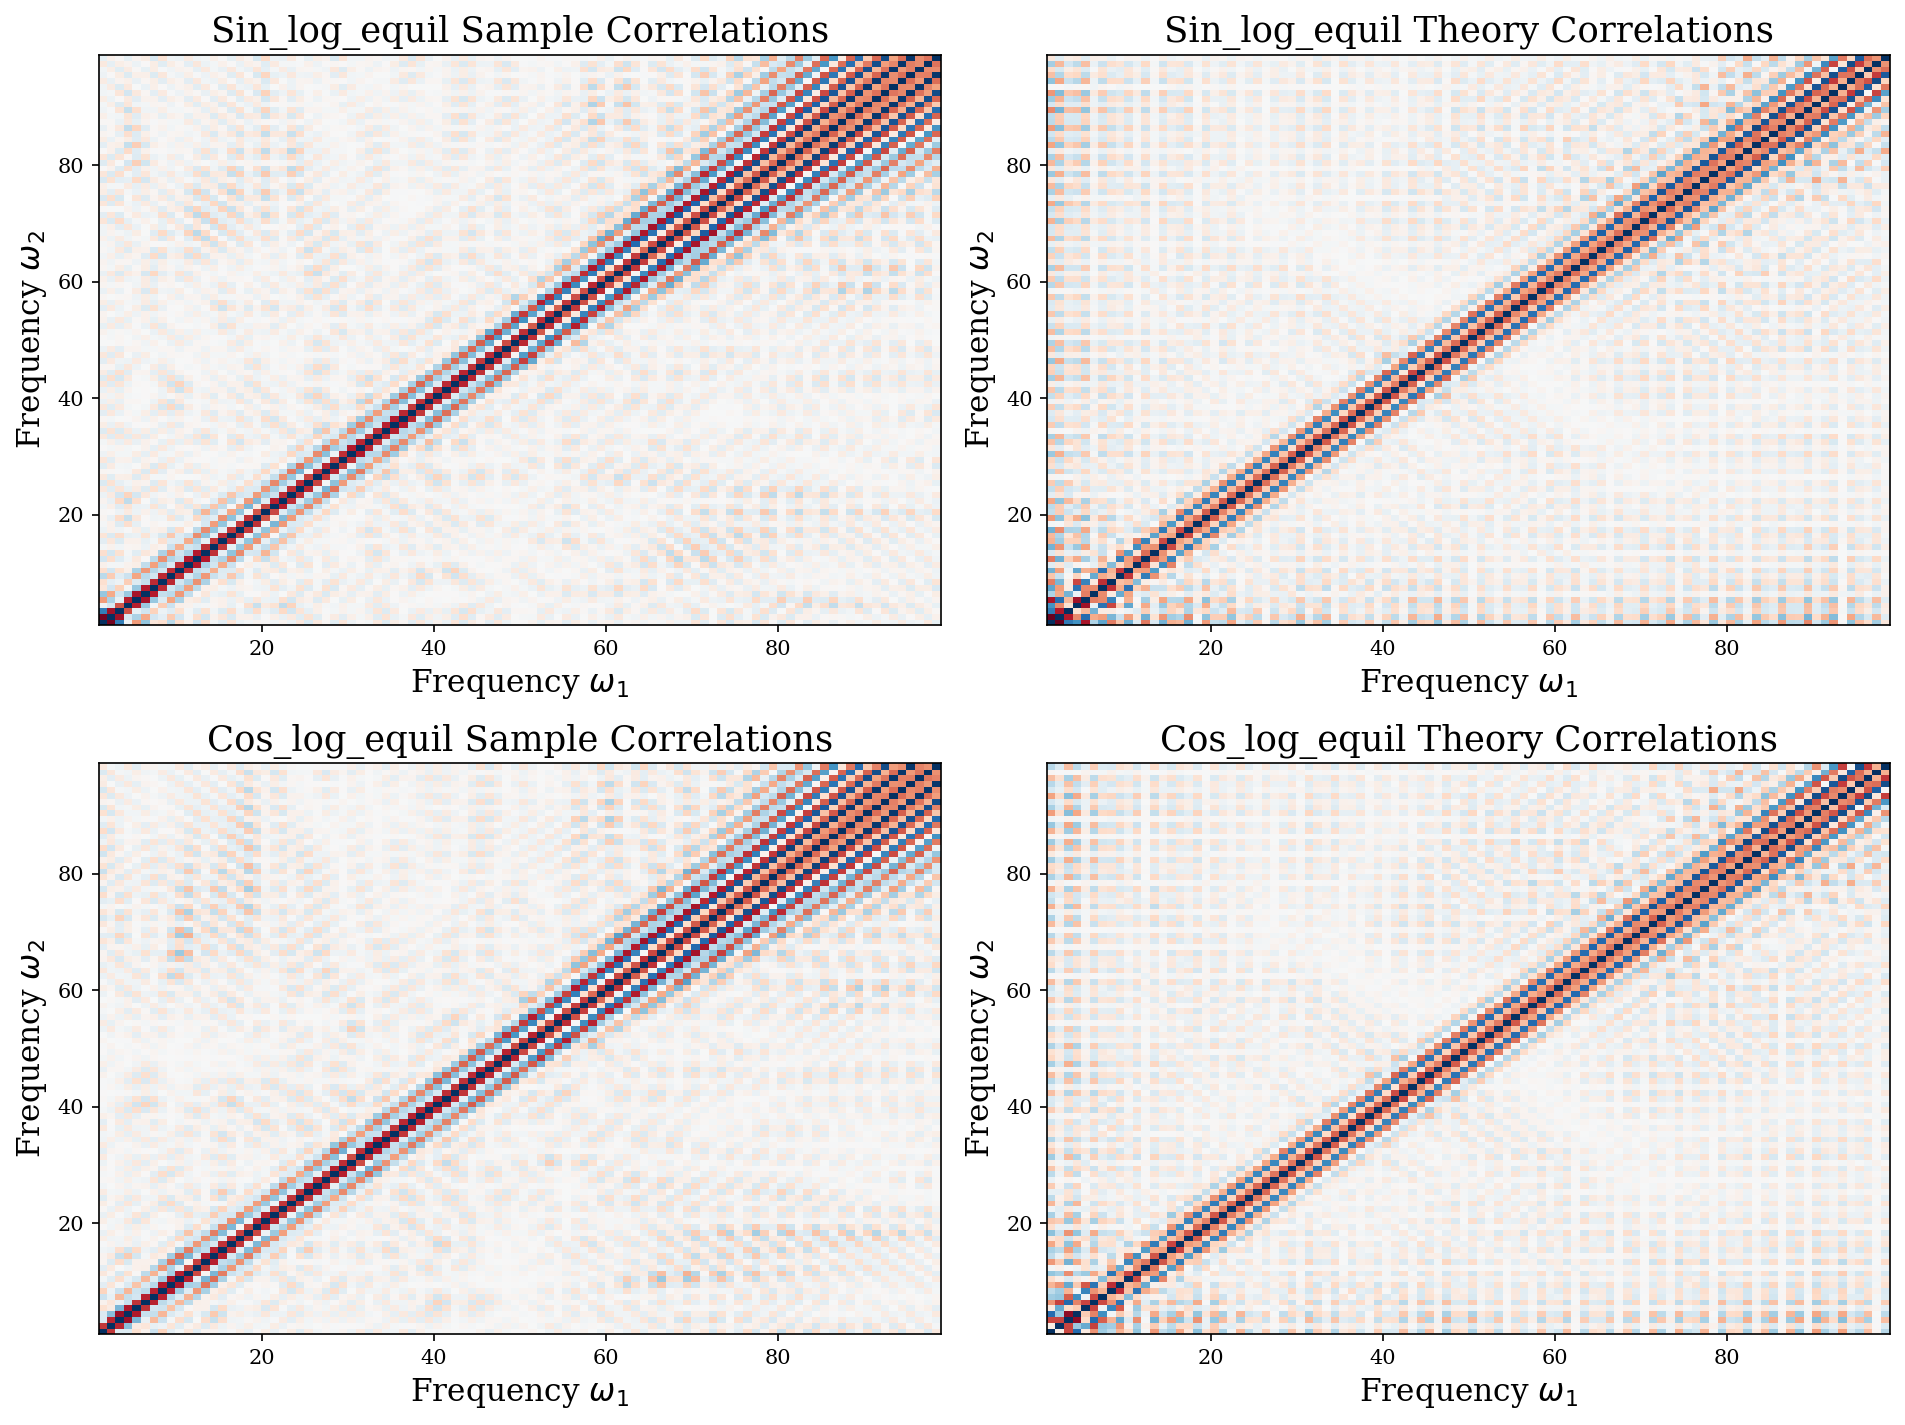

In [28]:
# fNL covariances for different frequencies in same templates
# For 'test_tetra' results. 
shape = 'Sin_log_equil'
N_MAPS = 140
th_corr = {}
th_corr[0] = np.loadtxt("data/sinlog_equil_template_correlations")
th_corr[1] = np.loadtxt("data/coslog_equil_template_correlations")

def cov_to_corr(cov):
    # Covariance matrix to correlation matrix
    norms = np.sqrt(np.diag(cov))
    return cov / (norms[:,np.newaxis] * norms[np.newaxis,:])

fig, axs = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2), dpi=150)

sub_df = df_test_tetra.loc[(df_test_tetra["template"] == shape) & (df_test_tetra["template_p2"].isin([0,90]))]
sub_df = sub_df.sort_values(["template_p1", "map_number"])
freq_range = sub_df.template_p1.unique()
sin_df = sub_df[sub_df["template_p2"] == 0]
cos_df = sub_df[sub_df["template_p2"] == 90]

N = len(freq_range)
sin_cov = np.zeros((N, N))
cos_cov = np.zeros((N, N))

for i1, f1 in enumerate(freq_range):
    sin_fNLs1 = sin_df.query("template_p1 == @f1")["fNL_T"].to_numpy()
    cos_fNLs1 = cos_df.query("template_p1 == @f1")["fNL_T"].to_numpy()
    for i2, f2 in enumerate(freq_range):
        sin_fNLs2 = sin_df.query("template_p1 == @f2")["fNL_T"].to_numpy()
        cos_fNLs2 = cos_df.query("template_p1 == @f2")["fNL_T"].to_numpy()
        sin_cov[i1,i2] = np.dot(sin_fNLs1, sin_fNLs2)
        cos_cov[i1,i2] = np.dot(cos_fNLs1, cos_fNLs2)
sin_corr = cov_to_corr(sin_cov)
cos_corr = cov_to_corr(cos_cov)

axs[0,0].pcolor(freq_range, freq_range, sin_corr, vmin=-1, vmax=1, cmap="RdBu")
axs[0,0].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
axs[0,0].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
axs[0,0].set_title(shape + r' Sample Correlations', fontsize=17)

axs[0,1].pcolor(freq_range, freq_range, th_corr[0], vmin=-1, vmax=1, cmap="RdBu")
axs[0,1].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
axs[0,1].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
axs[0,1].set_title(shape + r' Theory Correlations', fontsize=17)

axs[1,0].pcolor(freq_range, freq_range, cos_corr, vmin=-1, vmax=1, cmap="RdBu")
axs[1,0].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
axs[1,0].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
axs[1,0].set_title('Cos' + shape[3:] + r' Sample Correlations', fontsize=17)

axs[1,1].pcolor(freq_range, freq_range, th_corr[1], vmin=-1, vmax=1, cmap="RdBu")
axs[1,1].set_xlabel(r'Frequency $\omega_1$', fontsize=15)
axs[1,1].set_ylabel(r'Frequency $\omega_2$', fontsize=15)
axs[1,1].set_title('Cos' + shape[3:] + r' Theory Correlations', fontsize=17)

plt.tight_layout()

0        1
1        1
2        2
3        2
4        3
      ... 
195     98
196     99
197     99
198    100
199    100
Name: template_p1, Length: 200, dtype: int64


Text(0.5, 1.0, 'Cos_log_equil Convergence')

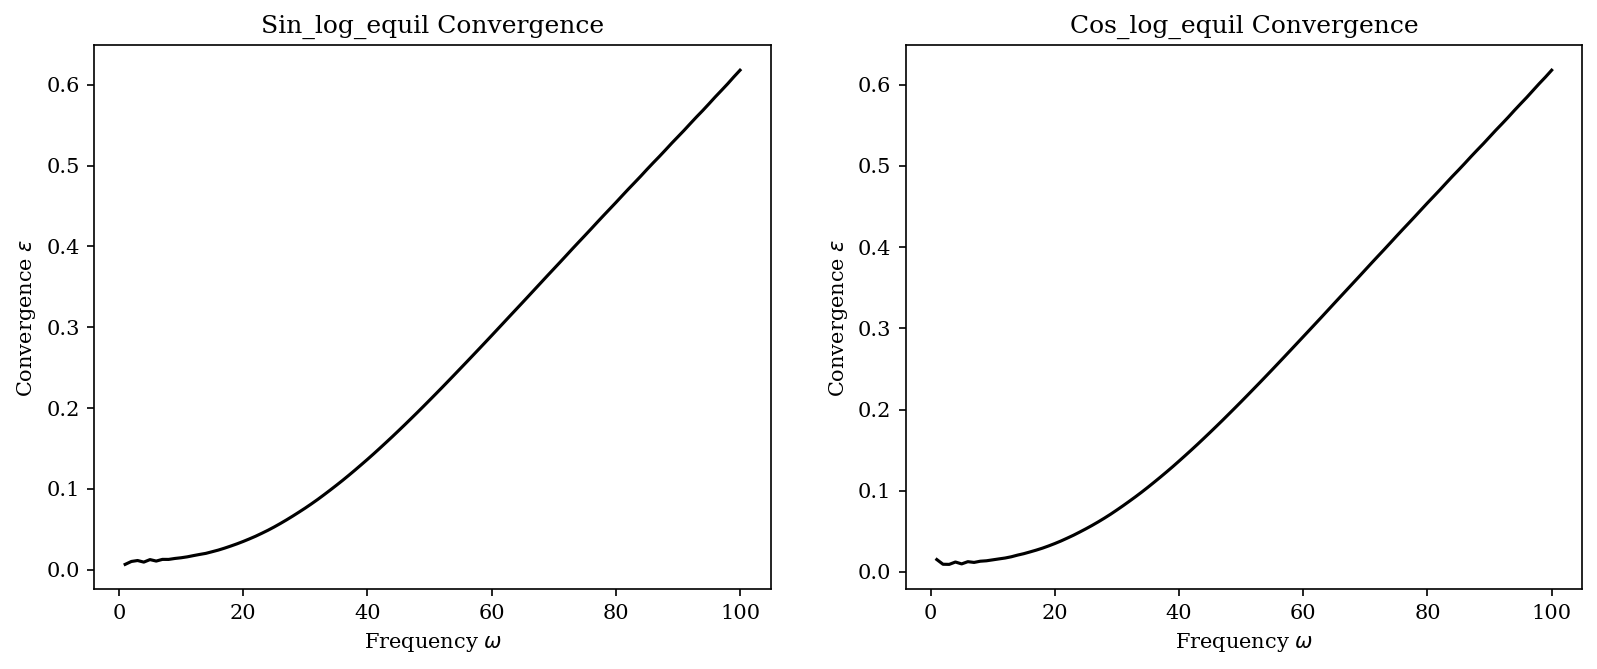

In [25]:
# Convergence plots
df_conv = pd.read_csv("data/convergence_sinlog_equil.txt", delimiter="\t")
freq_range = df_conv.template_p1.unique()
freq_range.sort()
sinlog_conv = df_conv.query("template_p2 == 0")["epsilon"]
coslog_conv = df_conv.query("template_p2 == 90")["epsilon"]
print(df_conv["template_p1"])

fig, axs = plt.subplots(1, 2, figsize=(6.4*2, 4.8*1), dpi=150)
axs[0].plot(freq_range, sinlog_conv, 'k')
axs[0].set_xlabel(r"Frequency $\omega$")
axs[0].set_ylabel(r"Convergence $\epsilon$")
axs[0].set_title("Sin_log_equil Convergence")

axs[1].plot(freq_range, coslog_conv, 'k')
axs[1].set_xlabel(r"Frequency $\omega$")
axs[1].set_ylabel(r"Convergence $\epsilon$")
axs[1].set_title("Cos_log_equil Convergence")



    n_patches  walltime
0         512   98.2926
1         256   62.7721
2         192   50.0851
3         128   48.1083
4          96   58.1008
5          64   61.3282
6          32  134.0790
7          16  131.2480
8           8  120.5080
9           4  115.7500
10          2  129.1880
11          1  136.2620


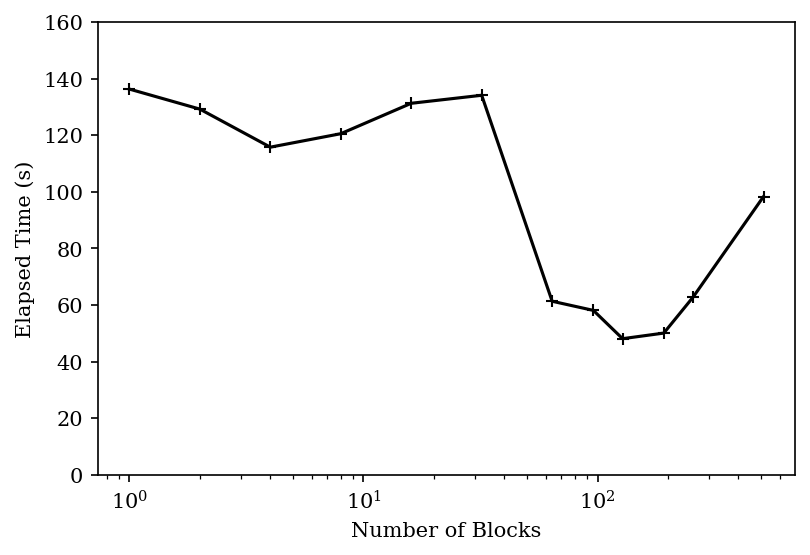

In [27]:
# Cache optimisation plot
df_cache = pd.read_csv("data/cache_block_opt", delimiter=" ")
print(df_cache)
plt.figure(dpi=150)
plt.plot(df_cache["n_patches"], df_cache["walltime"], '+-k')
plt.xlabel("Number of Blocks")
plt.ylabel("Elapsed Time (s)")
#plt.xlim([0,512])
plt.ylim([0,160])
plt.xscale("log")
plt.savefig("thesis_plots/cache_block_optimisation.svg")